In [748]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [749]:
df = pd.read_csv("Lead_weekly transaction.csv")

In [750]:
df.head(10)

Unnamed: 0  Id     week  Revenue  Operating Costs  Operating Profit  \
0           0   0  2019023    97700           177000            -79100   
1           1   0  2019024   174500           187000            -12500   
2           2   0  2019025   439000           336100            102900   
3           3   0  2019026   155000           190900            -36000   
4           4   1  2019022    24800            22900              1900   
5           5   1  2019023    22900            24300             -1500   
6           6   1  2019024    22600            21000              1400   
7           7   1  2019025    20800            15500              4700   
8           8   1  2019026    16700            24800             10500   
9           9   2  2019022     4900             4000               900   

   Debt Repayment  Credit Card Payments  
0               0                   500  
1               0                     0  
2               0                     0  
3               0                  1000  
4            1700                     0  
5             200                     0  
6               0                     0  
7               0                     0  
8               0                     0  
9            1200                   100

In [751]:
df.drop("Unnamed: 0", axis=1,inplace=True)

In [752]:
df2 = pd.read_csv("lead id mapping.csv")

In [753]:
df2

Id  Lead Id
0          0    87464
1          1   118714
2          2   170771
3          3   160869
4          4   552812
...      ...      ...
72744  72744   741891
72745  72745  1129250
72746  72746   833882
72747  72747   910099
72748  72748   881770

[72749 rows x 2 columns]

In [754]:
#Join two tables with Id
lead_id =pd.merge(df,df2,on="Id")

In [755]:
lead_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3071932 entries, 0 to 3071931
Data columns (total 8 columns):
 #   Column                Dtype
---  ------                -----
 0   Id                    int64
 1   week                  int64
 2   Revenue               int64
 3   Operating Costs       int64
 4   Operating Profit      int64
 5   Debt Repayment        int64
 6   Credit Card Payments  int64
 7   Lead Id               int64
dtypes: int64(8)
memory usage: 210.9 MB


In [756]:
lead_id.head(100)

Id     week  Revenue  Operating Costs  Operating Profit  Debt Repayment  \
0    0  2019023    97700           177000            -79100               0   
1    0  2019024   174500           187000            -12500               0   
2    0  2019025   439000           336100            102900               0   
3    0  2019026   155000           190900            -36000               0   
4    0  2019027   503900           431200             72800           10900   
..  ..      ...      ...              ...               ...             ...   
95   1  2019043    11100            10700               400               0   
96   1  2019044    10900             9900              1100               0   
97   1  2019045    14600            16800             -2100            1700   
98   2  2019022     4900             4000               900            1200   
99   2  2019023     3100             4100              -900               0   

    Credit Card Payments  Lead Id  
0                    500    87464  
1                      0    87464  
2                      0    87464  
3                   1000    87464  
4                   4900    87464  
..                   ...      ...  
95                     0   118714  
96                     0   118714  
97                     0   118714  
98                   100   170771  
99                     0   170771  

[100 rows x 8 columns]

In [757]:
#Creating Date to be calculated
lead_year = lead_id.groupby('Lead Id').agg({'week':['min', 'max']})
lead_year.columns = lead_year.columns.droplevel()
lead_year = lead_year.reset_index()
lead_year["difference"] = lead_year["max"] - lead_year["min"]
lead_year

Lead Id      min      max  difference
0         2492  2019001  2019028          27
1         8331  2019001  2019015          14
2        14277  2019001  2020047        1046
3        17861  2019001  2020014        1013
4        21045  2019036  2020022         986
...        ...      ...      ...         ...
72744  1347531  2021026  2022008         982
72745  1347552  2021039  2021052          13
72746  1347586  2021013  2021052          39
72747  1347636  2021035  2021052          17
72748  1347637  2021035  2021052          17

[72749 rows x 4 columns]

In [758]:
#Since max-mix will create some incorrect data when the year is different and they are "integer" rather than date format, 
# we need to use 52(weeks-year) to minus min + max to obtain the correct weeks.
count = 0
number=0
for i in lead_year["difference"]:
    if i > 52:
        number+=1
        x = 52 - (lead_year["min"].loc[count]%1000) + (lead_year["max"].loc[count]%1000)
        lead_year.loc[count,"difference"] =x
    count+=1
lead_year

Lead Id      min      max  difference
0         2492  2019001  2019028          27
1         8331  2019001  2019015          14
2        14277  2019001  2020047          98
3        17861  2019001  2020014          65
4        21045  2019036  2020022          38
...        ...      ...      ...         ...
72744  1347531  2021026  2022008          34
72745  1347552  2021039  2021052          13
72746  1347586  2021013  2021052          39
72747  1347636  2021035  2021052          17
72748  1347637  2021035  2021052          17

[72749 rows x 4 columns]

In [759]:
#find out those lead that has transactions more than a year
count=0
list=[]
for i in lead_year["difference"]:
    if i > 52:
        list.append(lead_year["Lead Id"].iloc[count])
    count+=1
lead_more_year = pd.DataFrame(list).rename(columns={0:"Lead_Id"})
lead_more_year

Lead_Id
0        14277
1        17861
2        22378
3        23361
4        26884
...        ...
20090  1332046
20091  1336126
20092  1336158
20093  1337606
20094  1341394

[20095 rows x 1 columns]

# Valuable Lead

In [760]:
#lead_more_year.to_csv("Lead_ID_more_than_a_year.csv")

In [761]:
df3 = pd.read_csv("Lead info.csv")

In [762]:
#Left join those lead that has transactions more than a year with "lead weekly transaction"
lead_yr_rev = lead_more_year.merge(lead_id, left_on='Lead_Id',right_on="Lead Id", how='left')
lead_yr_rev = lead_yr_rev.merge(df3, on="Id", how='left')
lead_yr_rev

Lead_Id     Id     week  Revenue  Operating Costs  Operating Profit  \
0          14277   3499  2019022    18700             3300             15400   
1          14277   3499  2019023      100             3100             -2900   
2          14277   3499  2019024    17000             7100              9800   
3          14277   3499  2019025        0                0            -60000   
4          14277   3499  2019026    17000                0             17000   
...          ...    ...      ...      ...              ...               ...   
1215960  1341394  12374  2020006        0              500               100   
1215961  1341394  12374  2021013        0             2200             -2100   
1215962  1341394  12374  2021014        0              600               200   
1215963  1341394  12374  2021015        0              700              3000   
1215964  1341394  12374  2021016        0             1600             -2100   

         Debt Repayment  Credit Card Payments  Lead Id  industry_sector  \
0                     0                     0    14277  Retail Services   
1                     0                     0    14277  Retail Services   
2                     0                   200    14277  Retail Services   
3                     0                     0    14277  Retail Services   
4                     0                     0    14277  Retail Services   
...                 ...                   ...      ...              ...   
1215960               0                     0  1341394  Retail Services   
1215961               0                     0  1341394  Retail Services   
1215962               0                     0  1341394  Retail Services   
1215963               0                     0  1341394  Retail Services   
1215964               0                     0  1341394  Retail Services   

        Top 5 State census_region        Business Type PPP_class Revenue_band  
0          New York     Northeast  Sole Proprietorship   Non PPP          >1M  
1          New York     Northeast  Sole Proprietorship   Non PPP          >1M  
2          New York     Northeast  Sole Proprietorship   Non PPP          >1M  
3          New York     Northeast  Sole Proprietorship   Non PPP          >1M  
4          New York     Northeast  Sole Proprietorship   Non PPP          >1M  
...             ...           ...                  ...       ...          ...  
1215960     Georgia         South                  LLC   Non PPP       <=250K  
1215961     Georgia         South                  LLC   Non PPP       <=250K  
1215962     Georgia         South                  LLC   Non PPP       <=250K  
1215963     Georgia         South                  LLC   Non PPP       <=250K  
1215964     Georgia         South                  LLC   Non PPP       <=250K  

[1215965 rows x 15 columns]

In [763]:
lead_yr_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215965 entries, 0 to 1215964
Data columns (total 15 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   Lead_Id               1215965 non-null  int64 
 1   Id                    1215965 non-null  int64 
 2   week                  1215965 non-null  int64 
 3   Revenue               1215965 non-null  int64 
 4   Operating Costs       1215965 non-null  int64 
 5   Operating Profit      1215965 non-null  int64 
 6   Debt Repayment        1215965 non-null  int64 
 7   Credit Card Payments  1215965 non-null  int64 
 8   Lead Id               1215965 non-null  int64 
 9   industry_sector       1215965 non-null  object
 10  Top 5 State           755048 non-null   object
 11  census_region         1215965 non-null  object
 12  Business Type         1215965 non-null  object
 13  PPP_class             1215965 non-null  object
 14  Revenue_band          1215965 non-null  object
dty

In [764]:
lead_yr_rev["Revenue"].describe().apply("{0:.5f}".format)

count    1215965.00000
mean        8897.45445
std        39804.41631
min            0.00000
25%          100.00000
50%          800.00000
75%         4300.00000
max      4082100.00000
Name: Revenue, dtype: object

In [765]:
lead_yr_rev["Revenue"].median()

800.0

In [766]:
#First, We don't want those revenue that is too low, so drop them
#Second, since the revenue skews right seriously, I used median + one standard deviation to find out the valuable lead.
lead_yr_rev= lead_yr_rev.loc[lead_yr_rev["Revenue"]>40604]
lead_rv_cst = lead_yr_rev[['Lead Id', 'Id',"week", "Revenue","Operating Costs","PPP_class","industry_sector","census_region","Business Type"]]
lead_rv_cst

Lead Id     Id     week  Revenue  Operating Costs PPP_class  \
32         14277   3499  2019018  4082100          4000100   Non PPP   
58         14277   3499  2020013    60000            30000   Non PPP   
90         17861   2134  2019022    57700            23800   Non PPP   
91         17861   2134  2019023    74300            67700   Non PPP   
92         17861   2134  2019024    65700            38500   Non PPP   
...          ...    ...      ...      ...              ...       ...   
1215769  1336126  35300  2021016   248200           230000   Non PPP   
1215788  1336158  45693  2021046    50400            40900   Non PPP   
1215791  1336158  45693  2021049    78600            73500   Non PPP   
1215792  1336158  45693  2021050    80600            59700   Non PPP   
1215793  1336158  45693  2021051   115400            96000   Non PPP   

                         industry_sector census_region        Business Type  
32                       Retail Services     Northeast  Sole Proprietorship  
58                       Retail Services     Northeast  Sole Proprietorship  
90       Accommodation and Food Services          West          Corporation  
91       Accommodation and Food Services          West          Corporation  
92       Accommodation and Food Services          West          Corporation  
...                                  ...           ...                  ...  
1215769                              B2B         South                  LLC  
1215788                     Retail Trade         South                  LLC  
1215791                     Retail Trade         South                  LLC  
1215792                     Retail Trade         South                  LLC  
1215793                     Retail Trade         South                  LLC  

[55805 rows x 9 columns]

In [767]:
def Find_Outliers_IQR (df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df<(q1-1.5*IQR))| (df>(q3+1.5*IQR)))]
    return outliers

In [768]:
def Impute_Outliers_IQR (column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    IQR = q3 - q1
    upper = column[~(column>(q3+1.5*IQR))].max()
    lower = column[~(column<(q3-1.5*IQR))].min()
    for i in column:
        if i> upper or i < lower:
            lead_rv_cst.drop(lead_rv_cst[column==i].index.values, inplace = True)
    return column

In [769]:
#Drop those outliers so that the entity can represent the group
outliers = Find_Outliers_IQR(lead_rv_cst["Revenue"])
print(outliers)

32         4082100
1361        425000
1363        416500
1365        637700
1367        548100
            ...   
1215720     317600
1215721     251700
1215725     290800
1215730     294600
1215769     248200
Name: Revenue, Length: 5062, dtype: int64


In [770]:
try:
    Impute_Outliers_IQR (lead_rv_cst["Revenue"])
    print("Success!")
except:
    print("Fail")

C:\Users\nelson.wang\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\NELSON~1.WAN\AppData\Local\Temp/ipykernel_17052/627068148.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lead_rv_cst.drop(lead_rv_cst[column==i].index.values, inplace = True)


Success!


In [771]:
#55805-5062 = 50743
lead_rv_cst

Lead Id     Id     week  Revenue  Operating Costs PPP_class  \
58         14277   3499  2020013    60000            30000   Non PPP   
90         17861   2134  2019022    57700            23800   Non PPP   
91         17861   2134  2019023    74300            67700   Non PPP   
92         17861   2134  2019024    65700            38500   Non PPP   
93         17861   2134  2019025    66100            50300   Non PPP   
...          ...    ...      ...      ...              ...       ...   
1215768  1336126  35300  2021015   130500           187800   Non PPP   
1215788  1336158  45693  2021046    50400            40900   Non PPP   
1215791  1336158  45693  2021049    78600            73500   Non PPP   
1215792  1336158  45693  2021050    80600            59700   Non PPP   
1215793  1336158  45693  2021051   115400            96000   Non PPP   

                         industry_sector census_region        Business Type  
58                       Retail Services     Northeast  Sole Proprietorship  
90       Accommodation and Food Services          West          Corporation  
91       Accommodation and Food Services          West          Corporation  
92       Accommodation and Food Services          West          Corporation  
93       Accommodation and Food Services          West          Corporation  
...                                  ...           ...                  ...  
1215768                              B2B         South                  LLC  
1215788                     Retail Trade         South                  LLC  
1215791                     Retail Trade         South                  LLC  
1215792                     Retail Trade         South                  LLC  
1215793                     Retail Trade         South                  LLC  

[50743 rows x 9 columns]

In [772]:
lead_rv_cst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50743 entries, 58 to 1215793
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Lead Id          50743 non-null  int64 
 1   Id               50743 non-null  int64 
 2   week             50743 non-null  int64 
 3   Revenue          50743 non-null  int64 
 4   Operating Costs  50743 non-null  int64 
 5   PPP_class        50743 non-null  object
 6   industry_sector  50743 non-null  object
 7   census_region    50743 non-null  object
 8   Business Type    50743 non-null  object
dtypes: int64(5), object(4)
memory usage: 5.9+ MB


In [773]:
#Since we need to cover the 2020 Feburary for two year, we need the weeks that cover from 2019030 to 2021052
lead_2year = lead_rv_cst.loc[(lead_rv_cst["week"]>2019000)& (lead_rv_cst["week"]<2021053)]
lead_2year

Lead Id     Id     week  Revenue  Operating Costs PPP_class  \
58         14277   3499  2020013    60000            30000   Non PPP   
90         17861   2134  2019022    57700            23800   Non PPP   
91         17861   2134  2019023    74300            67700   Non PPP   
92         17861   2134  2019024    65700            38500   Non PPP   
93         17861   2134  2019025    66100            50300   Non PPP   
...          ...    ...      ...      ...              ...       ...   
1215768  1336126  35300  2021015   130500           187800   Non PPP   
1215788  1336158  45693  2021046    50400            40900   Non PPP   
1215791  1336158  45693  2021049    78600            73500   Non PPP   
1215792  1336158  45693  2021050    80600            59700   Non PPP   
1215793  1336158  45693  2021051   115400            96000   Non PPP   

                         industry_sector census_region        Business Type  
58                       Retail Services     Northeast  Sole Proprietorship  
90       Accommodation and Food Services          West          Corporation  
91       Accommodation and Food Services          West          Corporation  
92       Accommodation and Food Services          West          Corporation  
93       Accommodation and Food Services          West          Corporation  
...                                  ...           ...                  ...  
1215768                              B2B         South                  LLC  
1215788                     Retail Trade         South                  LLC  
1215791                     Retail Trade         South                  LLC  
1215792                     Retail Trade         South                  LLC  
1215793                     Retail Trade         South                  LLC  

[50056 rows x 9 columns]

In [774]:
#lead_2year.to_csv("Lead_2year.csv")

In [775]:
#Make sure we don't have the data beyond this interval.
lead_2year["week"].unique()

array([2020013, 2019022, 2019023, 2019024, 2019025, 2019026, 2019027,
       2019028, 2019029, 2019030, 2019031, 2019032, 2019033, 2019034,
       2019035, 2019036, 2019037, 2019038, 2019039, 2019002, 2019003,
       2019004, 2019005, 2019006, 2019007, 2019008, 2019009, 2019010,
       2019011, 2019012, 2019013, 2019014, 2019015, 2019016, 2019017,
       2019018, 2019019, 2019020, 2019021, 2019040, 2019041, 2019042,
       2019043, 2019045, 2020008, 2021026, 2021027, 2021035, 2021045,
       2021048, 2021049, 2021050, 2021051, 2020011, 2020012, 2020018,
       2020021, 2020036, 2020010, 2020019, 2020025, 2020041, 2019049,
       2020001, 2020007, 2020023, 2020028, 2020045, 2019047, 2019051,
       2020002, 2020004, 2020009, 2020014, 2020027, 2020042, 2019044,
       2019048, 2020005, 2020006, 2020026, 2019046, 2020016, 2020020,
       2020022, 2020029, 2020030, 2020032, 2020033, 2020034, 2020037,
       2020038, 2020049, 2020050, 2020051, 2020052, 2020053, 2021001,
       2021002, 2021

In [776]:
lead_ppp = lead_2year.loc[lead_rv_cst["PPP_class"]== "PPP"]
lead_np = lead_2year.loc[lead_rv_cst["PPP_class"]== "Non PPP"]

In [777]:
lead_ppp

Lead Id     Id     week  Revenue  Operating Costs PPP_class  \
1341       64766   6671  2019033    71500           267900       PPP   
1343       64766   6671  2019035   123000           323800       PPP   
1345       64766   6671  2019037   115600           304700       PPP   
1347       64766   6671  2019039   127600           353000       PPP   
1359       64766   6671  2019041   150000           299200       PPP   
...          ...    ...      ...      ...              ...       ...   
1213897  1308607  35261  2021035    47000            25200       PPP   
1213901  1308607  35261  2021039    47500            28700       PPP   
1213930  1308607  35261  2021012    54000             6500       PPP   
1214476  1310362  41857  2021043    52200            37700       PPP   
1214477  1310362  41857  2021044    40800            39900       PPP   

         industry_sector census_region        Business Type  
1341                 B2B     Northeast          Corporation  
1343                 B2B     Northeast          Corporation  
1345                 B2B     Northeast          Corporation  
1347                 B2B     Northeast          Corporation  
1359                 B2B     Northeast          Corporation  
...                  ...           ...                  ...  
1213897              B2B       Midwest                  LLC  
1213901              B2B       Midwest                  LLC  
1213930              B2B       Midwest                  LLC  
1214476  Retail Services         South  Sole Proprietorship  
1214477  Retail Services         South  Sole Proprietorship  

[21679 rows x 9 columns]

In [778]:
lead_np

Lead Id     Id     week  Revenue  Operating Costs PPP_class  \
58         14277   3499  2020013    60000            30000   Non PPP   
90         17861   2134  2019022    57700            23800   Non PPP   
91         17861   2134  2019023    74300            67700   Non PPP   
92         17861   2134  2019024    65700            38500   Non PPP   
93         17861   2134  2019025    66100            50300   Non PPP   
...          ...    ...      ...      ...              ...       ...   
1215768  1336126  35300  2021015   130500           187800   Non PPP   
1215788  1336158  45693  2021046    50400            40900   Non PPP   
1215791  1336158  45693  2021049    78600            73500   Non PPP   
1215792  1336158  45693  2021050    80600            59700   Non PPP   
1215793  1336158  45693  2021051   115400            96000   Non PPP   

                         industry_sector census_region        Business Type  
58                       Retail Services     Northeast  Sole Proprietorship  
90       Accommodation and Food Services          West          Corporation  
91       Accommodation and Food Services          West          Corporation  
92       Accommodation and Food Services          West          Corporation  
93       Accommodation and Food Services          West          Corporation  
...                                  ...           ...                  ...  
1215768                              B2B         South                  LLC  
1215788                     Retail Trade         South                  LLC  
1215791                     Retail Trade         South                  LLC  
1215792                     Retail Trade         South                  LLC  
1215793                     Retail Trade         South                  LLC  

[28377 rows x 9 columns]

#  Five Entities: median, mean, 25%, 75%, max
### Use groupby lead Id, find 5 entity with the more counts.

# PPP

In [779]:
lead_ppp_gp = lead_ppp.groupby('Lead Id').agg({'Revenue':['mean'], "Lead Id":["count"]})
lead_ppp_gp.columns = lead_ppp_gp.columns.droplevel()
lead_ppp_gp = lead_ppp_gp.reset_index()
lead_ppp_gp.rename(columns={"mean":"PPP_mean"},inplace=True)
lead_ppp_gp.sort_values("count",ascending=False, inplace=True)
lead_ppp_gp.head(10)

Lead Id       PPP_mean  count
60    380846   86104.347826    138
69    409788   68909.322034    118
675   680434  124010.344828    116
82    433173  109403.478261    115
180   551391  121638.053097    113
72    419816   99589.423077    104
29    241679   70915.841584    101
230   591014   92913.861386    101
411   624720   65087.755102     98
130   487477   77914.583333     96

(array([1061.,  717.,  420.,  245.,  156.,  118.,   42.,   12.,   15.,
           4.]),
 array([ 40700.,  60370.,  80040.,  99710., 119380., 139050., 158720.,
        178390., 198060., 217730., 237400.]),
 <BarContainer object of 10 artists>)

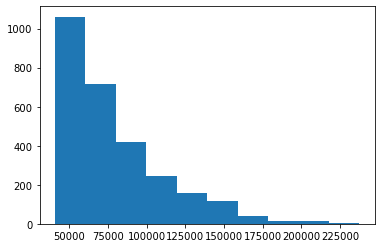

In [780]:
plt.hist(lead_ppp_gp["PPP_mean"])

In [781]:
lead_ppp_gp["PPP_mean"].median()

68408.82352941176

In [782]:
lead_ppp_gp["PPP_mean"].describe()

count      2790.000000
mean      77941.860826
std       33041.609635
min       40700.000000
25%       52495.212766
50%       68408.823529
75%       94033.333333
max      237400.000000
Name: PPP_mean, dtype: float64

In [783]:
#Five Entities: median=409788, meann=487477, 25%=355992, 75%=591014, max=465222
#Change the conditions back and forth to find these five entities
lead_ppp_find = lead_ppp_gp[(lead_ppp_gp["PPP_mean"]>150000)]
lead_ppp_find

Lead Id       PPP_mean  count
112    465222  159166.265060     83
1323   744277  152359.322034     59
649    674729  156149.056604     53
1373   748566  155210.204082     49
121    474131  160777.551020     49
...       ...            ...    ...
933    705837  169700.000000      1
939    706658  158900.000000      1
1933   825888  157100.000000      1
1948   829755  228100.000000      1
1947   829229  206900.000000      1

[122 rows x 3 columns]

# PPP Graphing

In [784]:
def Graphing_first(list):
    for i in list:
        lead =  lead_ppp.loc[lead_ppp["Lead Id"]==i]
        lead = lead.sort_values("week",ascending=True)
        lead["week"] = lead["week"].astype(str)
        x = lead["industry_sector"].unique()[0]
        y = lead["census_region"].unique()[0]
        z = lead["Business Type"].unique()[0]
        fig,ax= plt.subplots(figsize=(15,6))
        fig.suptitle("Class PPP")
        ax.plot(lead["week"], lead["Revenue"], label="Revenue")
        ax.plot(lead["week"],lead["Operating Costs"], color="r", label = "Cost", alpha=0.6)
        ax.legend(loc="upper right")
        ax.set_title(f"Lead Id: {i},{x},{y},{z}")
        ax.set_ylabel("USD")
        if lead["Lead Id"].count()>100:
            mylocator = mticker.MultipleLocator(11.5)
        else:
            mylocator = mticker.MultipleLocator(8)
        ax.xaxis.set_major_locator(mylocator)


In [785]:
#Five Entities: median=409788, meann=487477, 25%=355992, 75%=591014, max=465222
ppp_graph_list = [409788, 487477, 355992, 591014, 465222]

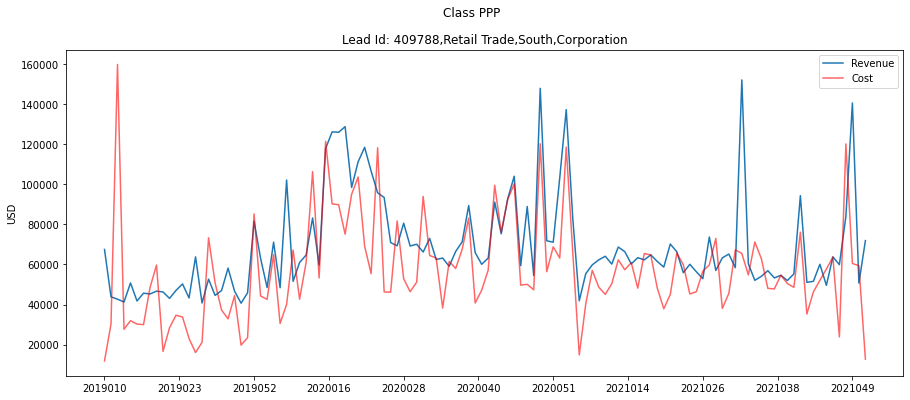

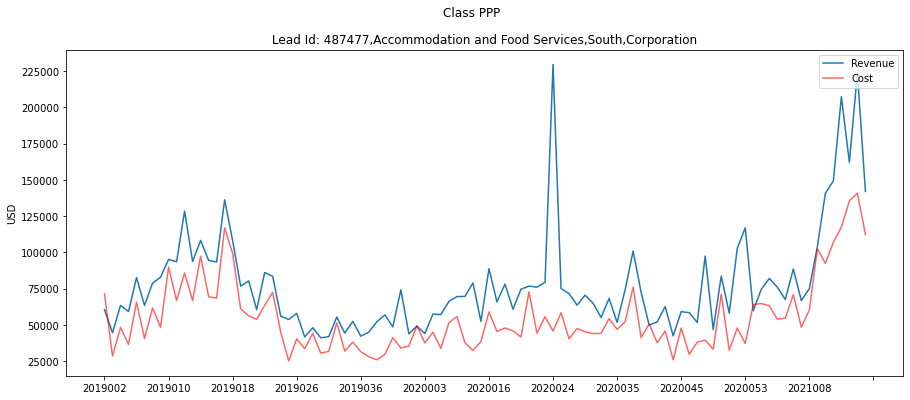

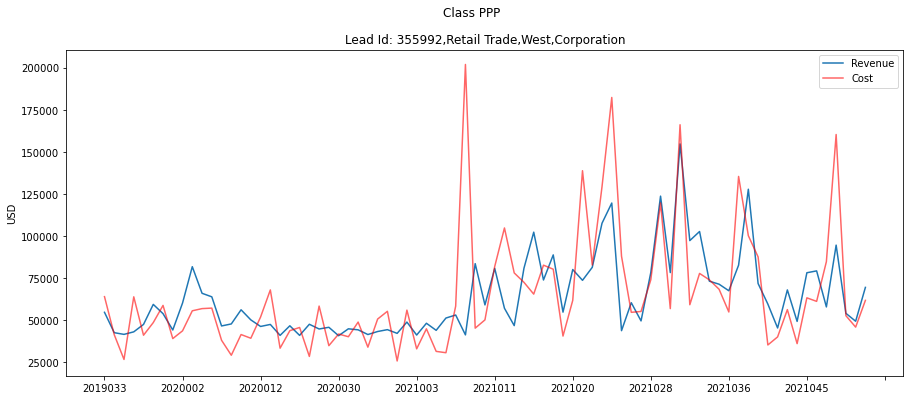

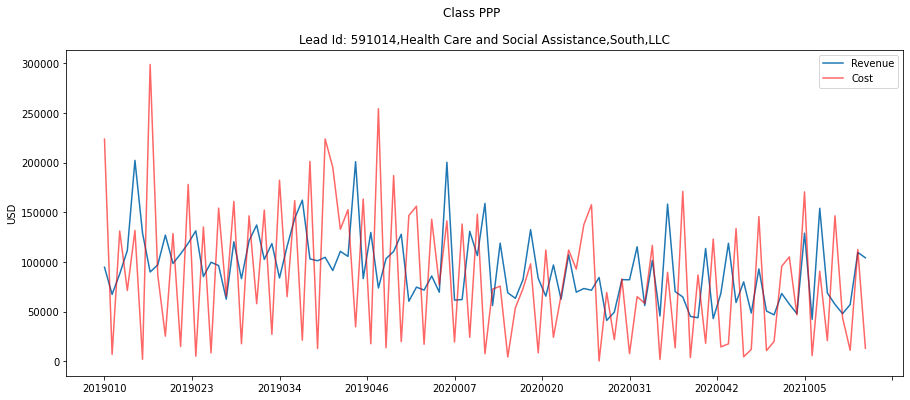

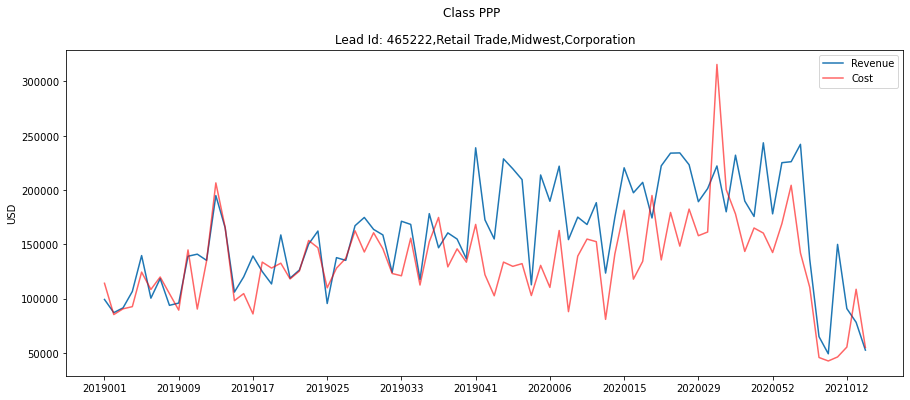

In [786]:
Graphing_first(ppp_graph_list)

# Non PPP

In [787]:
lead_np_gp = lead_np.groupby('Lead Id').agg({'Revenue':['mean'],"Lead Id":["count"]})
lead_np_gp.columns = lead_np_gp.columns.droplevel()
lead_np_gp = lead_np_gp.reset_index()
lead_np_gp.rename(columns={"mean":"NonPPP_mean"},inplace=True)
lead_np_gp.sort_values("count",ascending=False, inplace=True)

lead_np_gp.head(10)

Lead Id    NonPPP_mean  count
1026   568496   82746.762590    139
335    410093  109398.540146    137
11      84378  124042.307692    130
60     189489  106365.116279    129
231    360194   75003.125000    128
475    455001   92448.760331    121
333    410010   74596.521739    115
943    556279  103040.350877    114
129    272772  123725.000000    112
362    423041   75651.351351    111

(array([872., 719., 356., 183., 108.,  75.,  19.,   8.,   4.,   3.]),
 array([ 40700.,  61010.,  81320., 101630., 121940., 142250., 162560.,
        182870., 203180., 223490., 243800.]),
 <BarContainer object of 10 artists>)

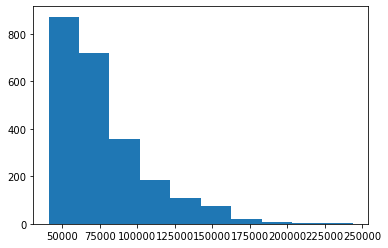

In [788]:
#The graph skewed right seriously
plt.hist(lead_np_gp["NonPPP_mean"])

In [789]:
lead_np_gp["NonPPP_mean"].median()

68100.0

In [790]:
lead_np_gp["NonPPP_mean"].describe()

count      2347.000000
mean      76482.338753
std       30167.817280
min       40700.000000
25%       54375.000000
50%       68100.000000
75%       89073.529412
max      243800.000000
Name: NonPPP_mean, dtype: float64

In [791]:
#Five Entities: median=405769, mean=360194 , 25%=464509, 75%=455001, max=567796
#Change the conditions back and forth to find these five entities
lead_np_find = lead_np_gp[(lead_np_gp["NonPPP_mean"]>150000)]
lead_np_find


Lead Id    NonPPP_mean  count
1023   567796  161793.137255    102
193    328454  160023.255814     86
795    529508  157502.777778     72
493    460101  165440.322581     62
803    531202  153362.500000     56
...       ...            ...    ...
785    528469  154600.000000      1
1565   675507  151500.000000      1
1568   675892  157300.000000      1
674    507888  150800.000000      1
1710  1147811  150800.000000      1

[82 rows x 3 columns]

# Non PPP graphing

In [792]:
def Graphing_second(list):
    for i in list:
        lead =  lead_np.loc[lead_np["Lead Id"]==i]
        lead = lead.sort_values("week",ascending=True)
        lead["week"] = lead["week"].astype(str)
        x = lead["industry_sector"].unique()[0]
        y = lead["census_region"].unique()[0]
        z = lead["Business Type"].unique()[0]
        fig,ax= plt.subplots(figsize=(15,6))
        fig.suptitle("Class NonPPP")
        ax.plot(lead["week"], lead["Revenue"], label="Revenue")
        ax.plot(lead["week"],lead["Operating Costs"], color="r", label = "Cost", alpha=0.6)
        ax.legend(loc="upper right")
        ax.set_title(f"Lead Id: {i},{x},{y},{z}")
        ax.set_ylabel("USD")
        if lead["Lead Id"].count()>100:
            mylocator = mticker.MultipleLocator(11.5)
        else:
            mylocator = mticker.MultipleLocator(8)
        ax.xaxis.set_major_locator(mylocator)


In [793]:
#Five Entities: median=405769, mean=360194 , 25%=464509, 75%=455001, max=567796
np_graph_list=[405769, 360194 , 464509, 455001, 567796]

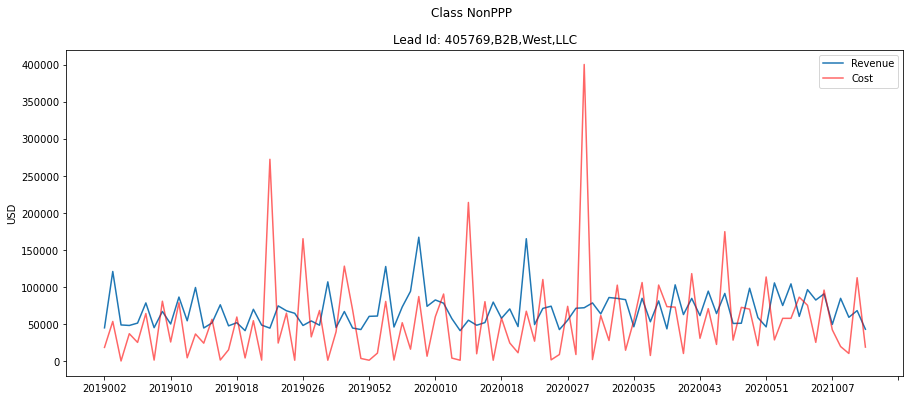

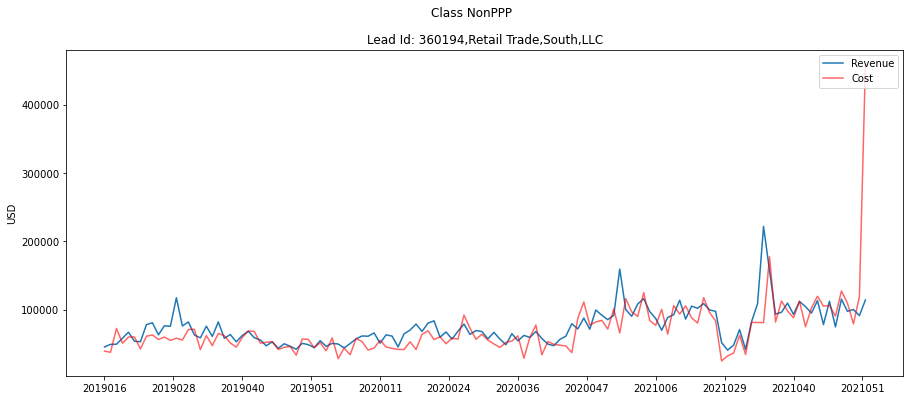

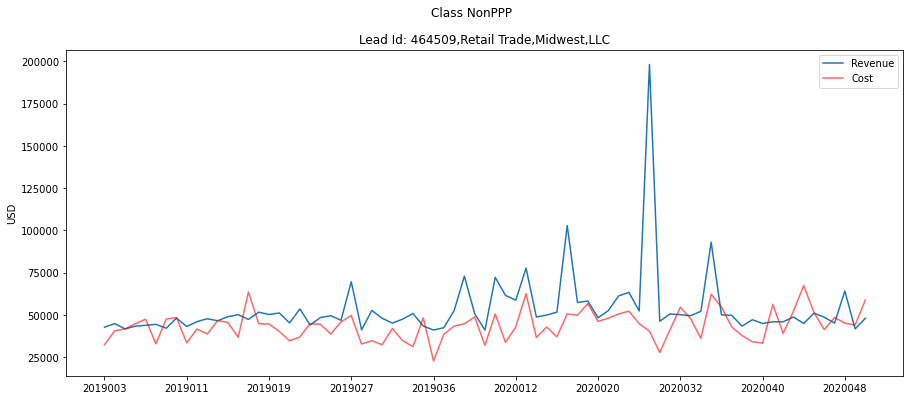

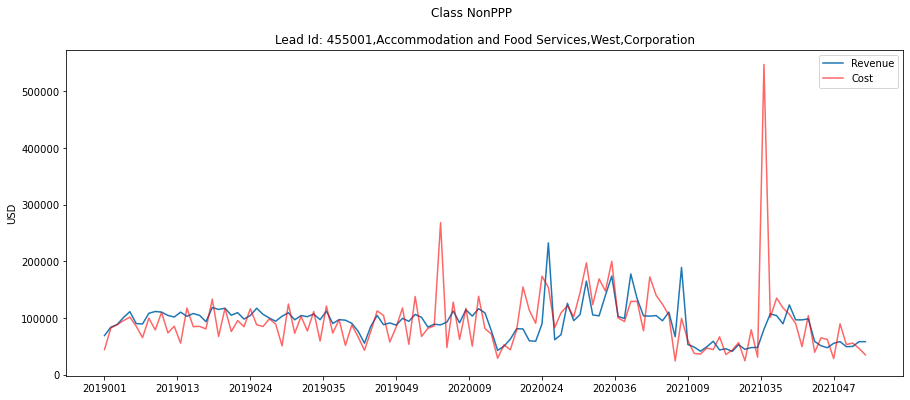

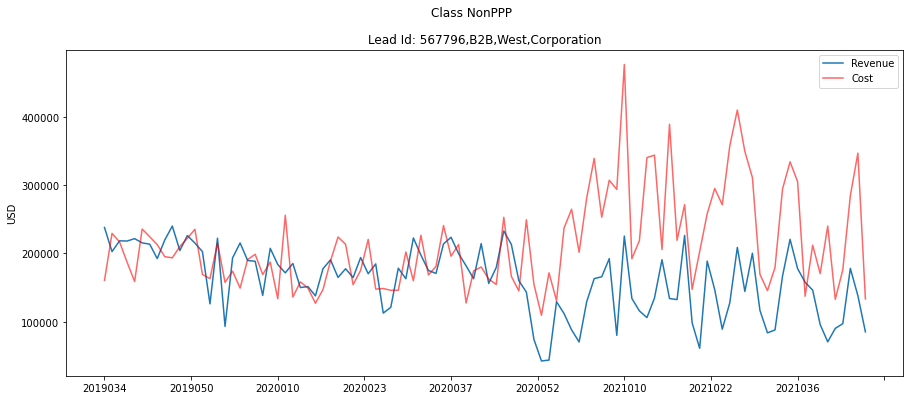

In [794]:
#Before dropping the outlier
Graphing_second(np_graph_list)

In [795]:
lead_np_md = lead_np.loc[lead_np["Lead Id"]==405769]
lead_np_mean = lead_np.loc[lead_np["Lead Id"]==360194]
lead_np_25 = lead_np.loc[lead_np["Lead Id"]==464509]
lead_np_75 = lead_np.loc[lead_np["Lead Id"]==455001]
lead_np_max = lead_np.loc[lead_np["Lead Id"]==567796]

In [796]:
#Drop Outlier
lead_np_md.drop(lead_np_md[lead_np_md["Operating Costs"]>300000].index.values, axis=0, inplace=True)
lead_np_mean.drop(lead_np_mean[lead_np_mean["Operating Costs"]>300000].index.values, axis=0, inplace=True)
lead_np_25.drop(lead_np_25[lead_np_25["Revenue"]>150000].index.values, axis=0, inplace=True)
lead_np_75.drop(lead_np_75[lead_np_75["Operating Costs"]>300000].index.values, axis=0, inplace=True)

C:\Users\nelson.wang\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [797]:
lead_np_md = lead_np_md.sort_values("week",ascending=True)
lead_np_md["week"] = lead_np_md["week"].astype(str)

lead_np_mean = lead_np_mean.sort_values("week",ascending=True)
lead_np_mean["week"]=lead_np_mean["week"].astype(str)

lead_np_25 = lead_np_25.sort_values("week",ascending=True)
lead_np_25["week"]=lead_np_25["week"].astype(str)

lead_np_75 = lead_np_75.sort_values("week",ascending=True)
lead_np_75["week"]=lead_np_75["week"].astype(str)

lead_np_max = lead_np_max.sort_values("week",ascending=True)
lead_np_max["week"]=lead_np_max["week"].astype(str)

In [798]:
#For title
lst2_md=[]
lst2_mean=[]
lst2_25=[]
lst2_75=[]
lst2_max=[]
test=["industry_sector","census_region","Business Type"]
for i in test:
    for j in lead_np_md[i].unique():
        lst2_md.append(j)
    for j in lead_np_mean[i].unique():
        lst2_mean.append(j)
    for j in lead_np_25[i].unique():
        lst2_25.append(j)
    for j in lead_np_75[i].unique():
        lst2_75.append(j)
    for j in lead_np_max[i].unique():
        lst2_max.append(j)    
print(lst2_md,
lst2_mean,
lst2_25,
lst2_75,
lst2_max)


['B2B', 'West', 'LLC'] ['Retail Trade', 'South', 'LLC'] ['Retail Trade', 'Midwest', 'LLC'] ['Accommodation and Food Services', 'West', 'Corporation'] ['B2B', 'West', 'Corporation']


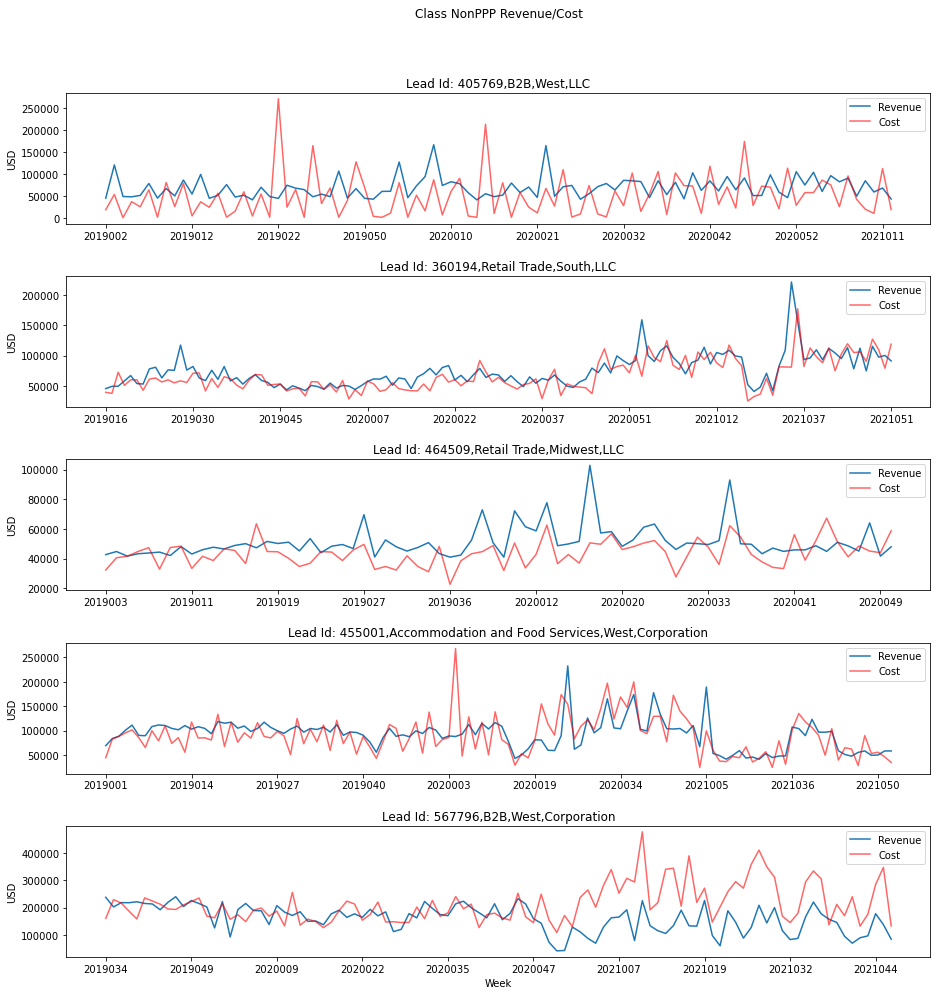

In [799]:
#NonPPP Five Entities: median=405769, mean=360194 , 25%=464509, 75%=455001, max=567796
fig,(ax1,ax2,ax3,ax4,ax5)= plt.subplots(5 ,figsize=(15,15))
fig.suptitle('Class NonPPP Revenue/Cost')
fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

ax1.plot(lead_np_md["week"], lead_np_md["Revenue"], label="Revenue")
ax1.plot(lead_np_md["week"],lead_np_md["Operating Costs"], color="r", label = "Cost", alpha=0.6)
ax1.legend(loc="upper right")
ax1.set_title(f"Lead Id: 405769,{lst2_md[0]},{lst2_md[1]},{lst2_md[2]}")
ax1.set_ylabel("USD")
mylocator = mticker.MultipleLocator(10)
ax1.xaxis.set_major_locator(mylocator)

ax2.plot(lead_np_mean["week"], lead_np_mean["Revenue"],label="Revenue")
ax2.plot(lead_np_mean["week"], lead_np_mean["Operating Costs"],color = "r",label="Cost", alpha=0.6)
ax2.legend(loc="upper right")
ax2.set_title(f"Lead Id: 360194,{lst2_mean[0]},{lst2_mean[1]},{lst2_mean[2]}")
ax2.set_ylabel("USD")
mylocator2 = mticker.MultipleLocator(14)
ax2.xaxis.set_major_locator(mylocator2)

ax3.plot(lead_np_25["week"], lead_np_25["Revenue"],label="Revenue")
ax3.plot(lead_np_25["week"], lead_np_25["Operating Costs"],color = "r",label="Cost", alpha=0.6)
ax3.legend(loc="upper right")
ax3.set_title(f"Lead Id: 464509,{lst2_25[0]},{lst2_25[1]},{lst2_25[2]}")
ax3.set_ylabel("USD")
mylocator3 = mticker.MultipleLocator(8)
ax3.xaxis.set_major_locator(mylocator3)

ax4.plot(lead_np_75["week"], lead_np_75["Revenue"],label="Revenue")
ax4.plot(lead_np_75["week"], lead_np_75["Operating Costs"],color = "r",label="Cost", alpha=0.6)
ax4.legend(loc="upper right")
ax4.set_title(f"Lead Id: 455001,{lst2_75[0]},{lst2_75[1]},{lst2_75[2]}")
ax4.set_ylabel("USD")
mylocator4 = mticker.MultipleLocator(13)
ax4.xaxis.set_major_locator(mylocator4)

ax5.plot(lead_np_max["week"], lead_np_max["Revenue"],label="Revenue")
ax5.plot(lead_np_max["week"], lead_np_max["Operating Costs"],color = "r",label="Cost", alpha=0.6)
ax5.legend(loc="upper right")
ax5.set_title(f"Lead Id: 567796,{lst2_max[0]},{lst2_max[1]},{lst2_max[2]}")
ax5.set_ylabel("USD")
ax5.set_xlabel("Week")
mylocator5 = mticker.MultipleLocator(11)
ax5.xaxis.set_major_locator(mylocator5)


In [800]:
# PPP 487477

In [801]:
#lead_ppp.to_csv("lead_ppp_201901_202112.csv")
#lead_np.to_csv("lead_Nonppp_201901_202112.csv")

# Example 3, declining after COVID (both rev & cost)

In [802]:
#Pcikup those lead that has more counts of transaction
def Group_Count(name):
    x =  lead_ppp.loc[lead_ppp["industry_sector"]==name]
    x_gp = x.groupby("Lead Id").agg({"Lead Id": ["count"]})
    x_gp.columns = x_gp.columns.droplevel()
    x_gp.reset_index(inplace=True)
    x_gp = x_gp.sort_values("count", ascending=False)
    return(x_gp)

In [803]:
for i in lead_ppp["industry_sector"].unique():
    name = Group_Count(i)
    print(i)
    print(name.head(3))
    print("\n")

B2B
    Lead Id  count
20   433173    115
15   419816    104
1     73932     80


Retail Services
     Lead Id  count
6     301373     79
7     346966     75
532   861452     72


Retail Trade
    Lead Id  count
18   409788    118
4    241679    101
67   624720     98


Accommodation and Food Services
    Lead Id  count
34   551391    113
24   487477     96
10   368214     91


Health Care and Social Assistance
    Lead Id  count
5    380846    138
24   591014    101
8    404485     76


Professional, Scientific, and Technical Services
     Lead Id  count
79    680434    116
14    567159     91
334   969806     79




In [804]:
def Graphing(list):
    for i in list:
        lead =  lead_ppp.loc[lead_ppp["Lead Id"]==i]
        lead = lead.sort_values("week",ascending=True)
        lead["week"] = lead["week"].astype(str)
        x = lead["industry_sector"].unique()[0]
        y = lead["census_region"].unique()[0]
        z = lead["Business Type"].unique()[0]
        fig,ax= plt.subplots(figsize=(15,6))
        fig.suptitle("Class PPP")
        ax.plot(lead["week"], lead["Revenue"], label="Revenue")
        ax.plot(lead["week"],lead["Operating Costs"], color="r", label = "Cost", alpha=0.6)
        ax.legend(loc="upper right")
        ax.set_title(f"Lead Id: {i},{x},{y},{z}")
        ax.set_ylabel("USD")
        if lead["Lead Id"].count()>100:
            mylocator = mticker.MultipleLocator(11.5)
        else:
            mylocator = mticker.MultipleLocator(8)
        ax.xaxis.set_major_locator(mylocator)


In [805]:
b2b = [433173,419816,73932]
rs = [301373, 346966, 861452]
rt = [409788, 241679, 624720]
acc = [551391, 487477, 368214]
health=[380846, 591014, 404485]
pro=[680434, 567159, 969806]

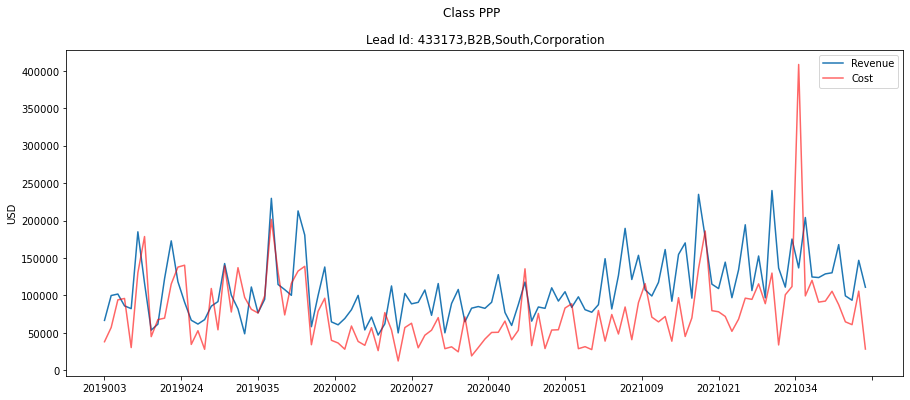

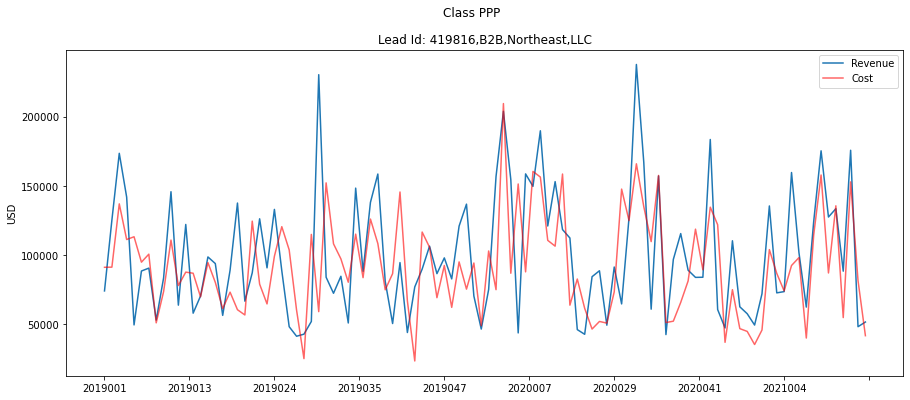

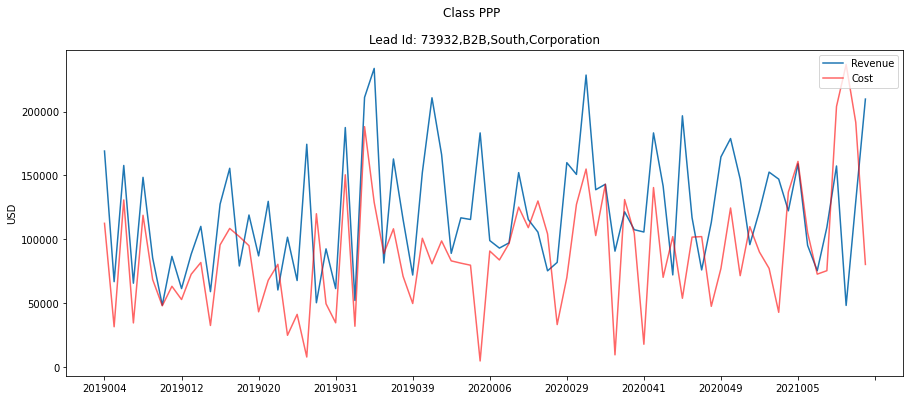

In [806]:
Graphing(b2b)

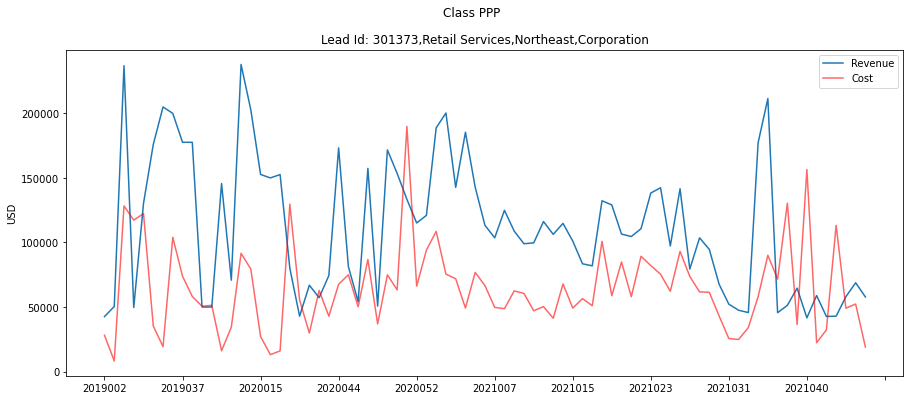

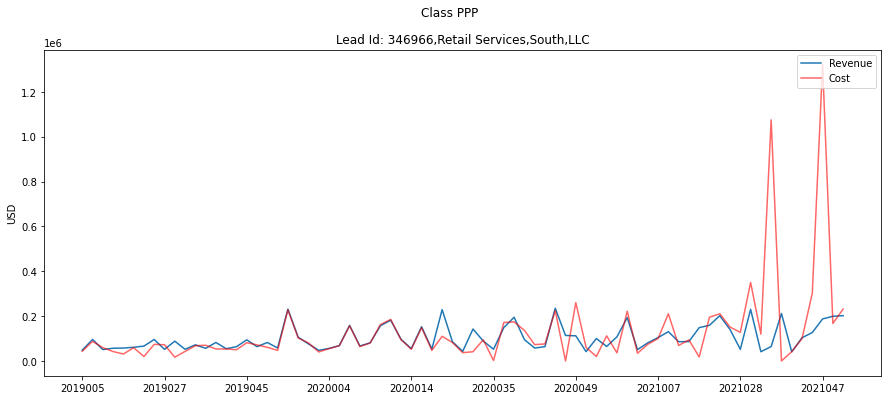

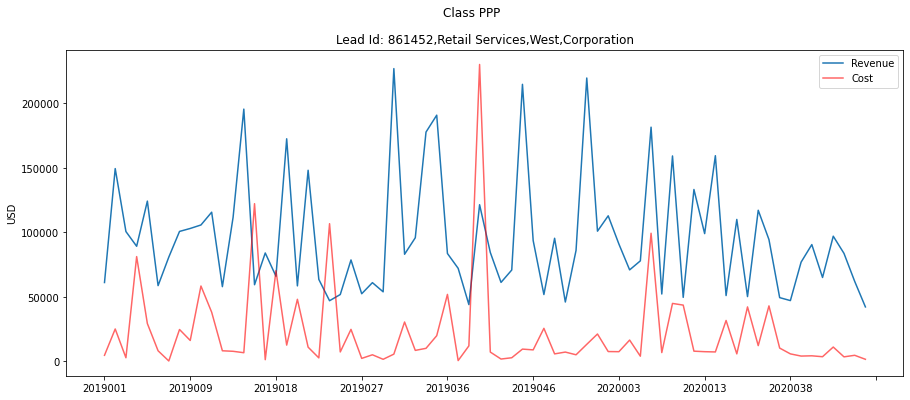

In [807]:
Graphing(rs)

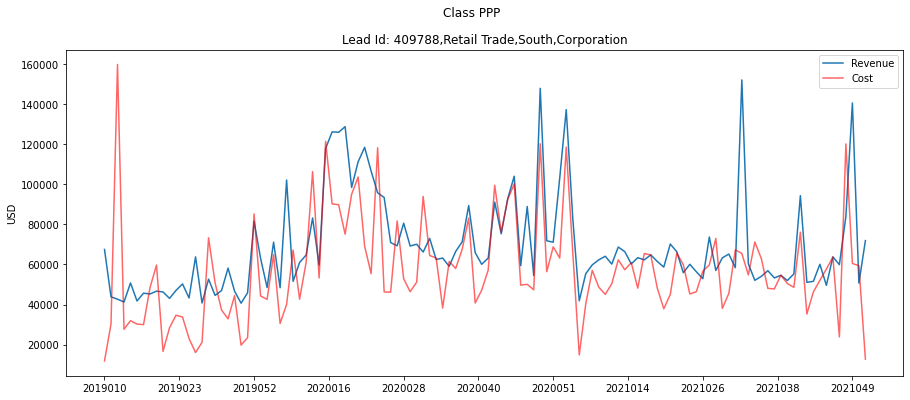

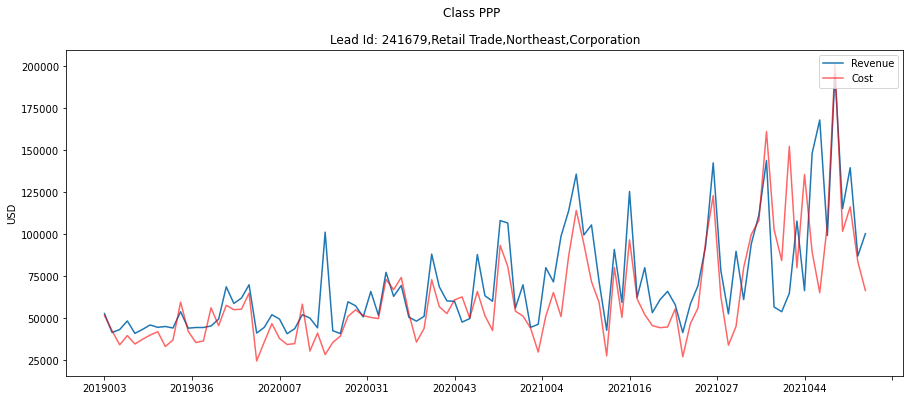

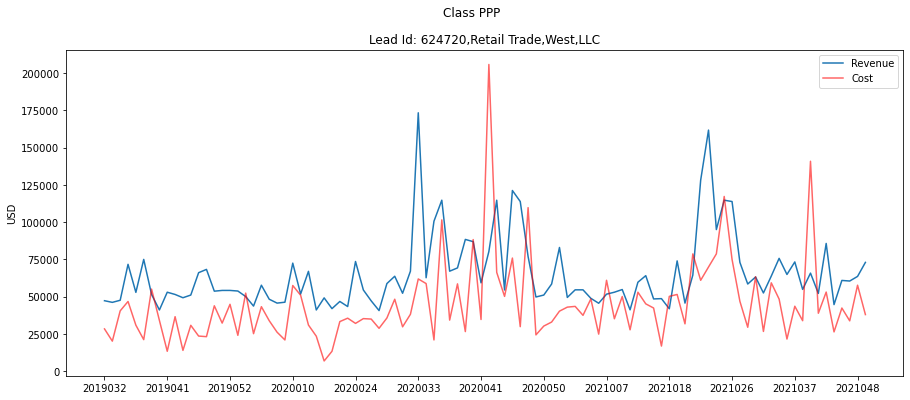

In [808]:
Graphing(rt)

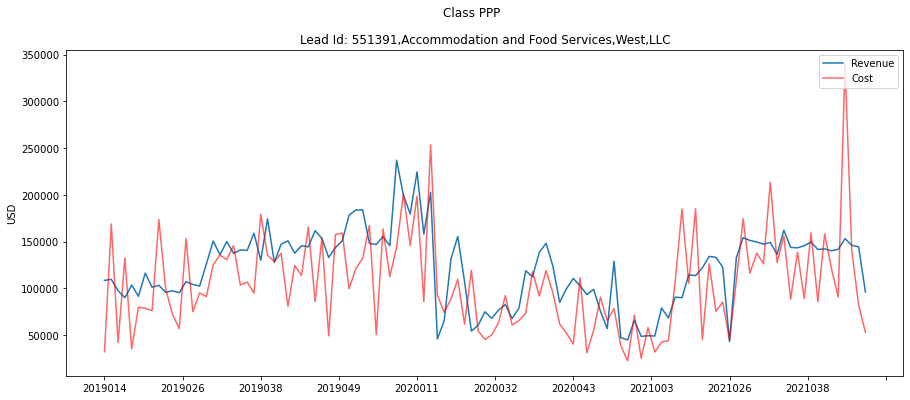

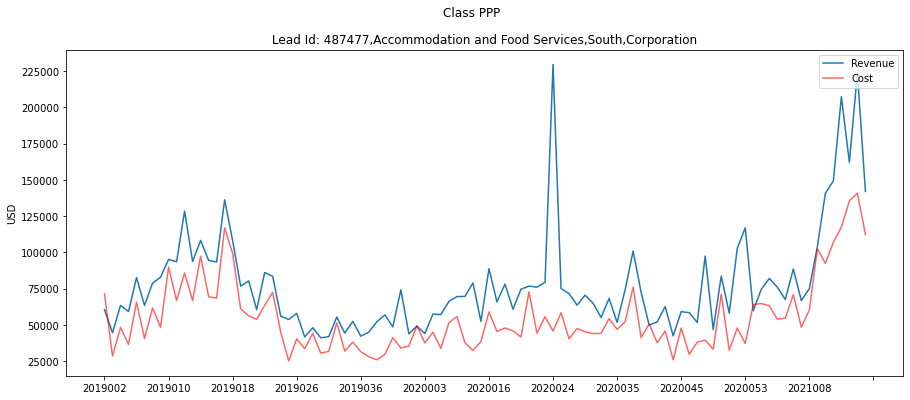

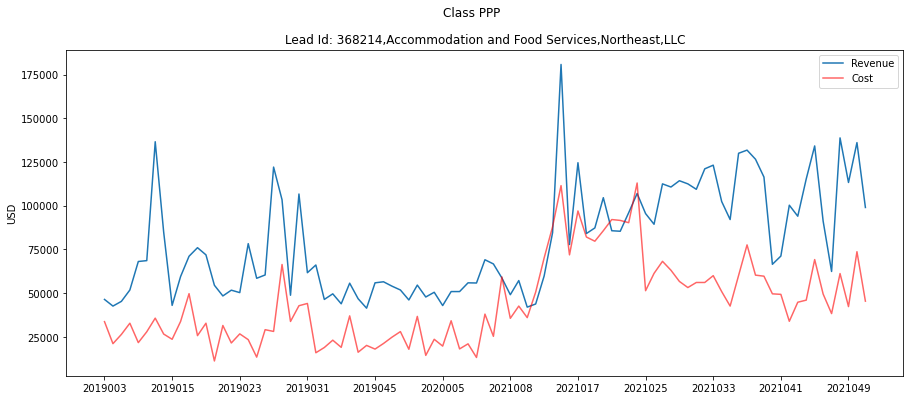

In [809]:
Graphing(acc)

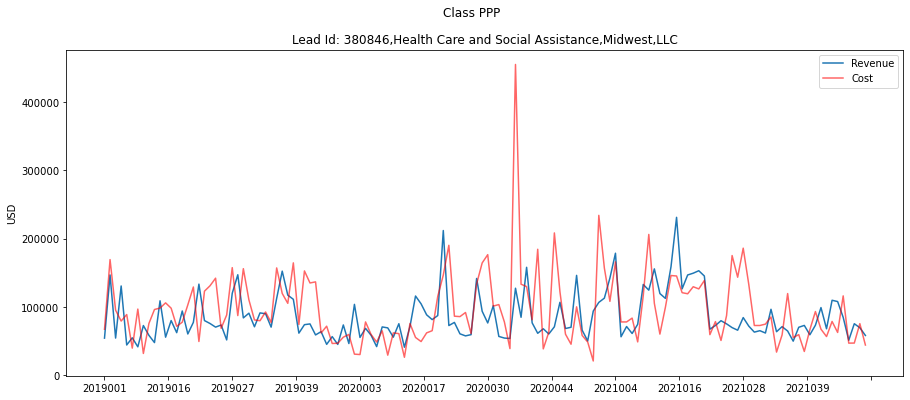

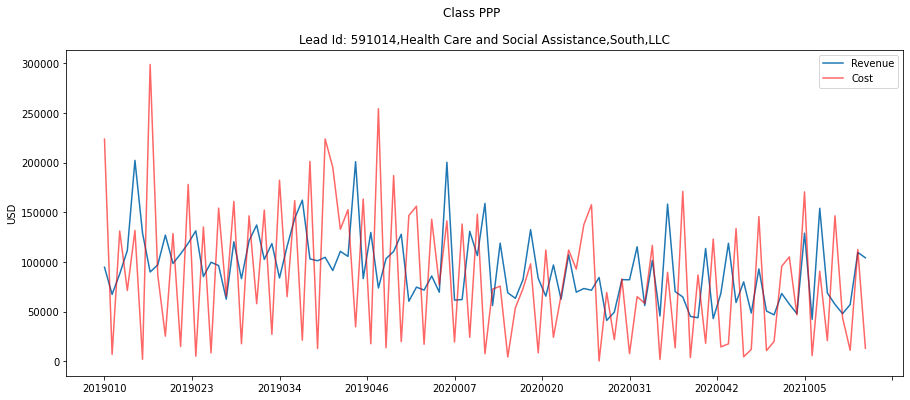

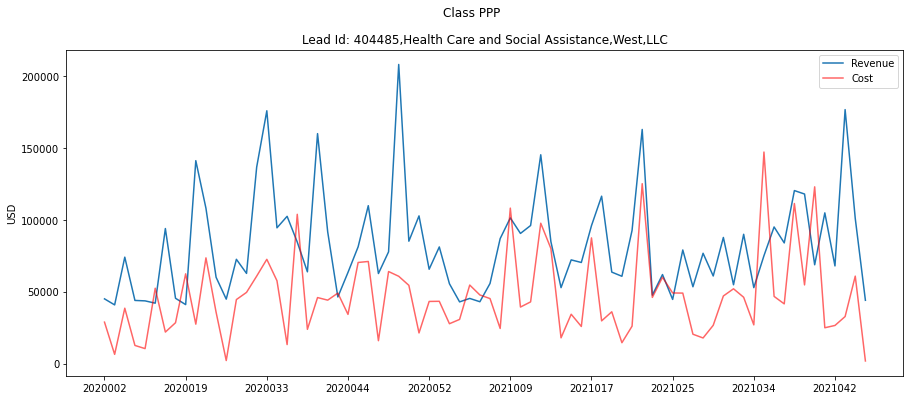

In [810]:
Graphing(health)

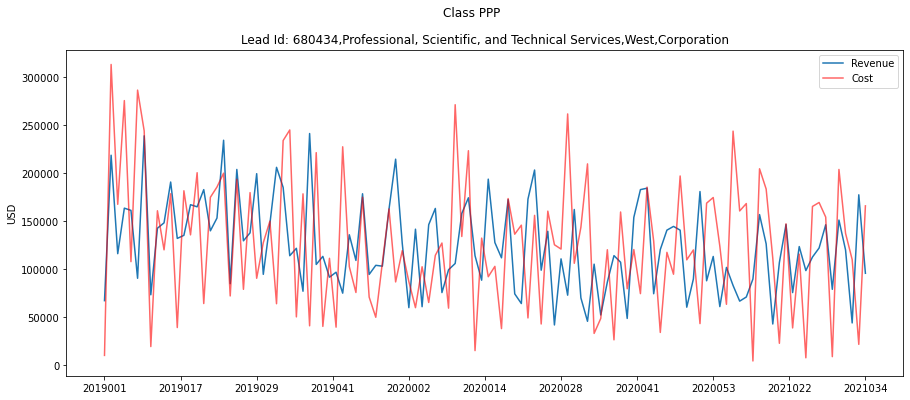

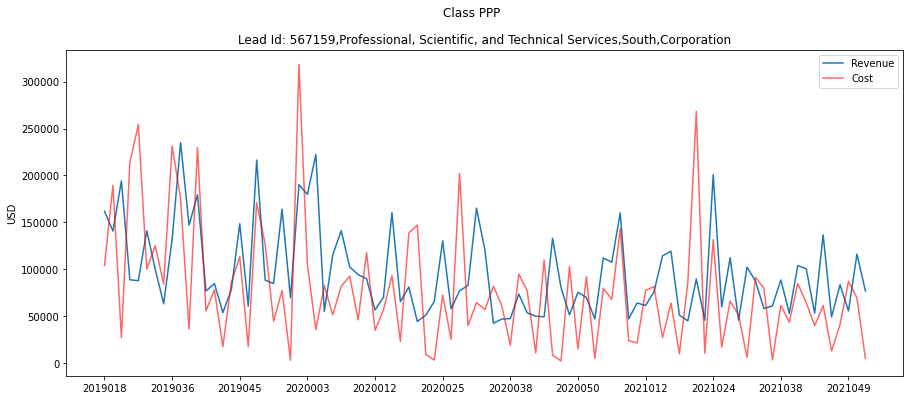

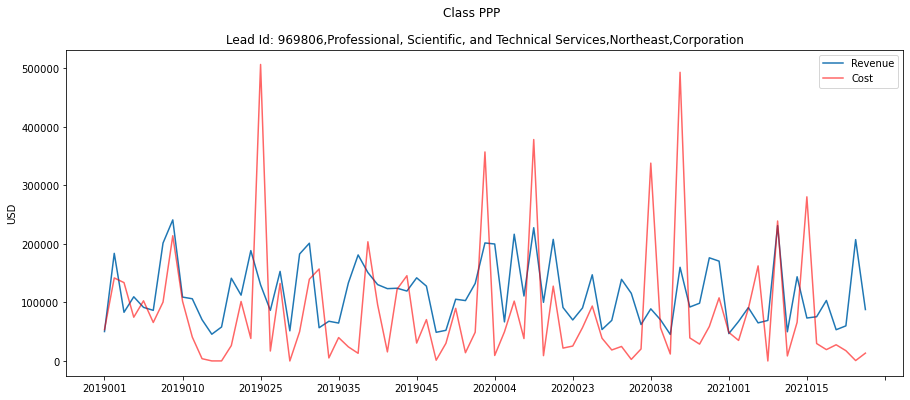

In [811]:
Graphing(pro)

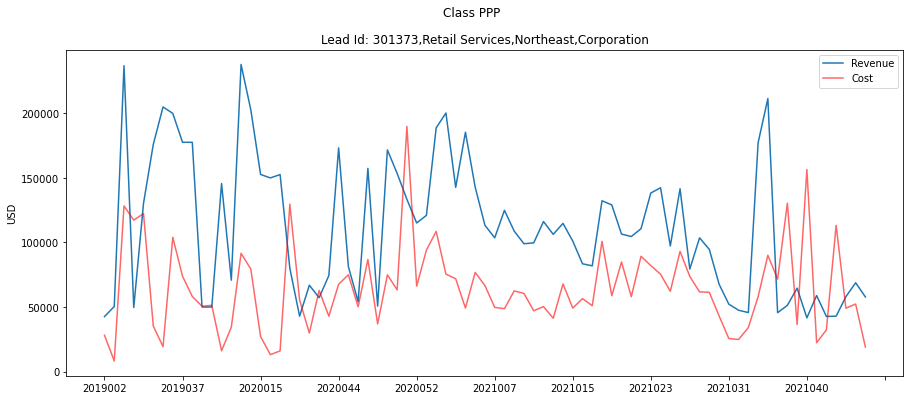

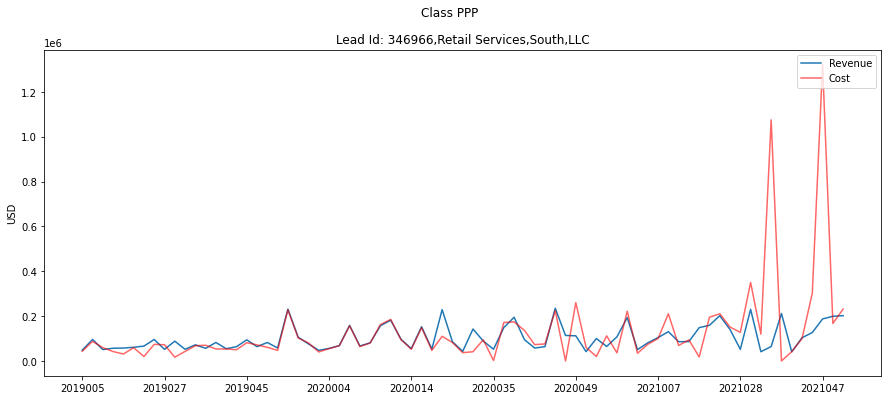

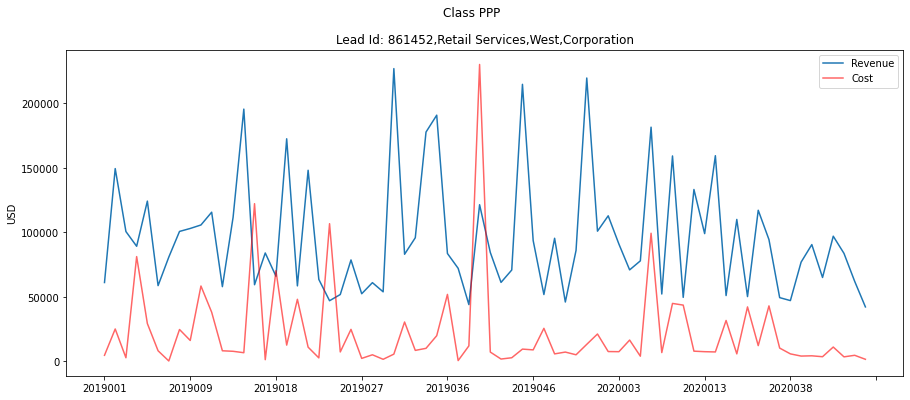

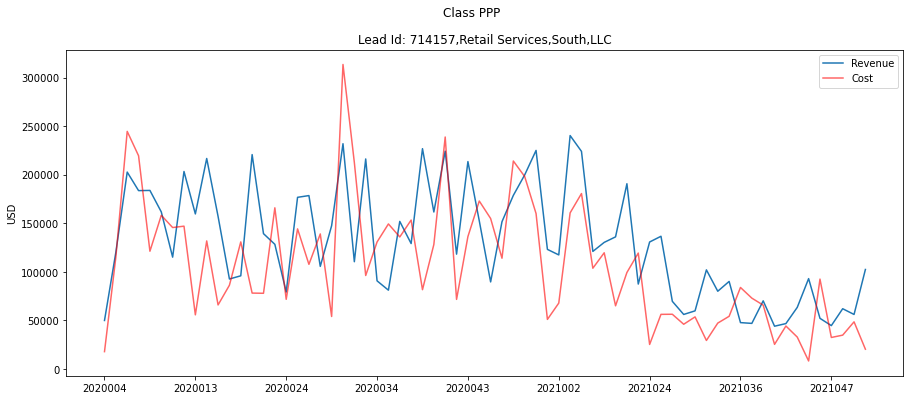

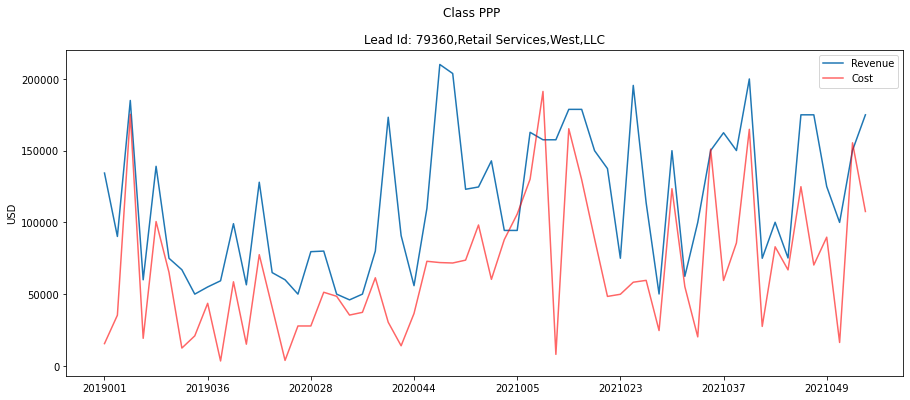

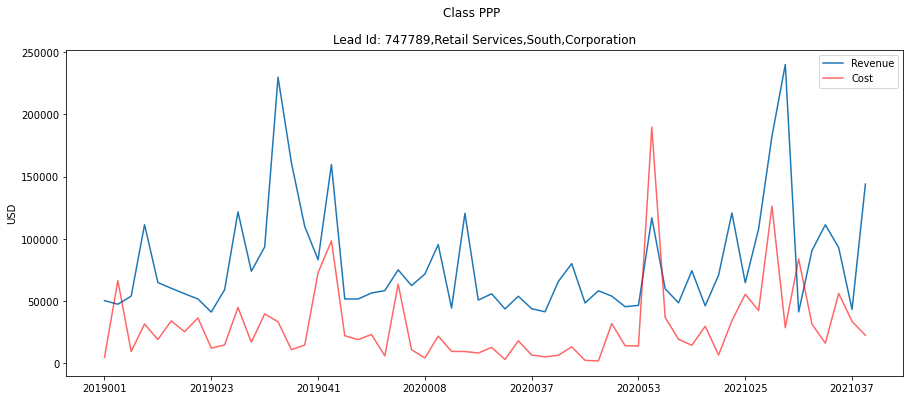

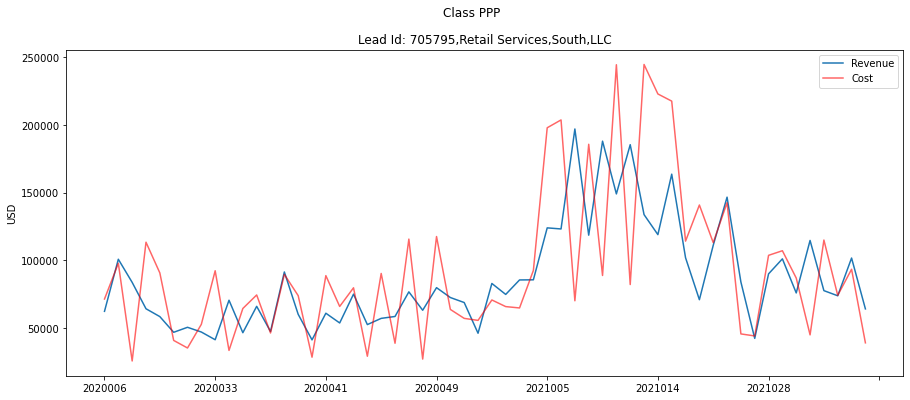

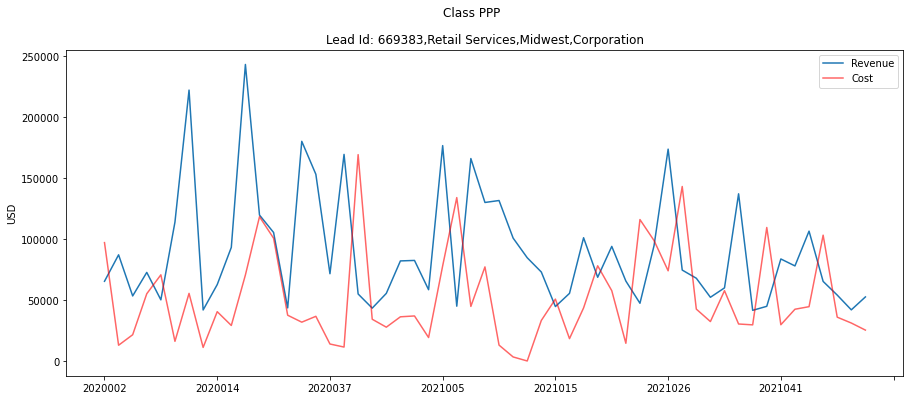

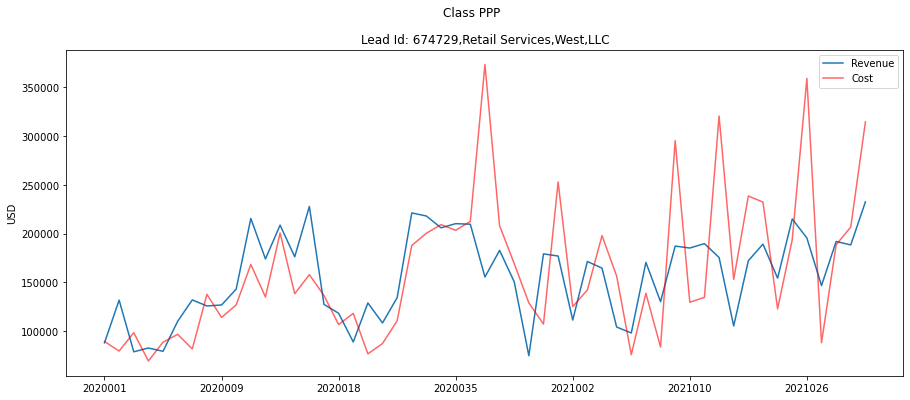

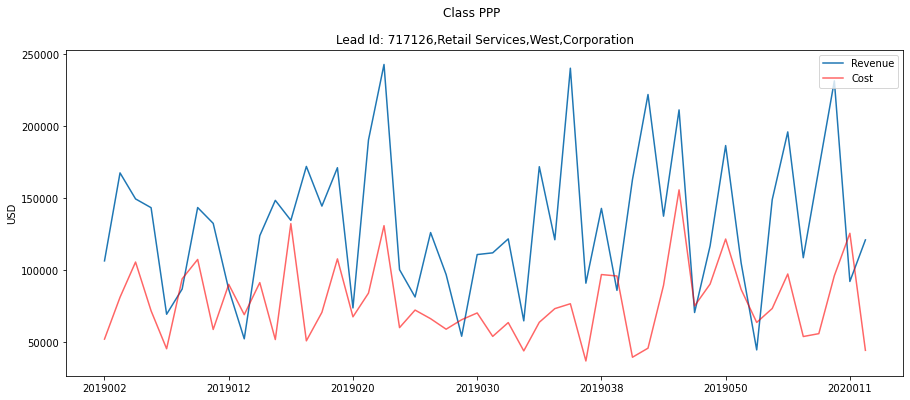

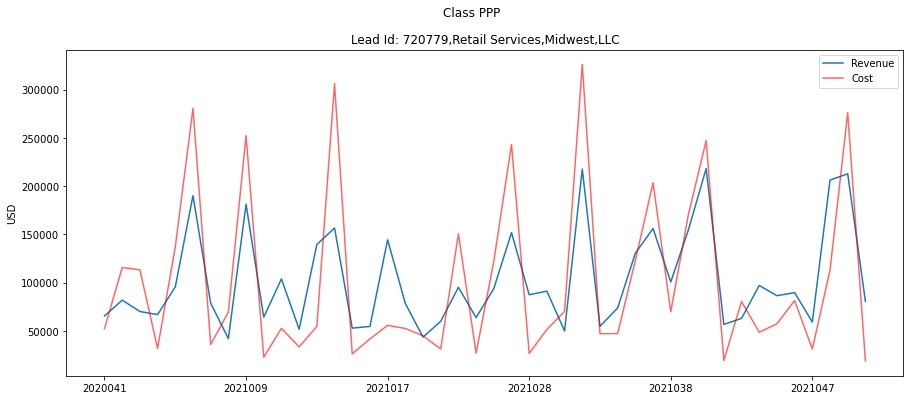

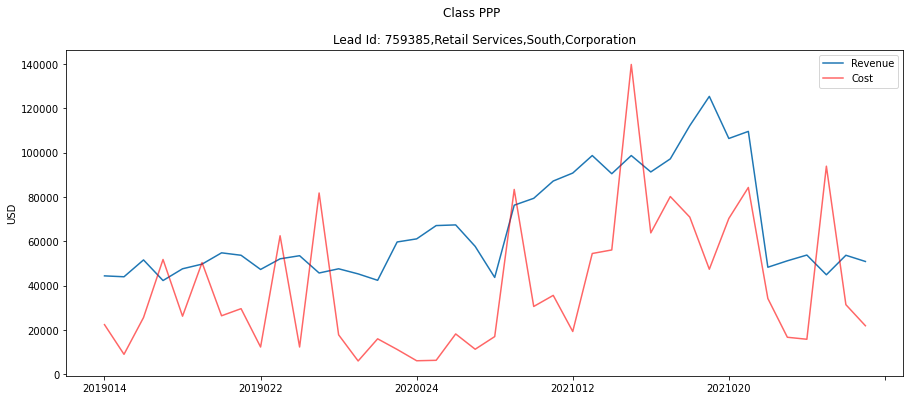

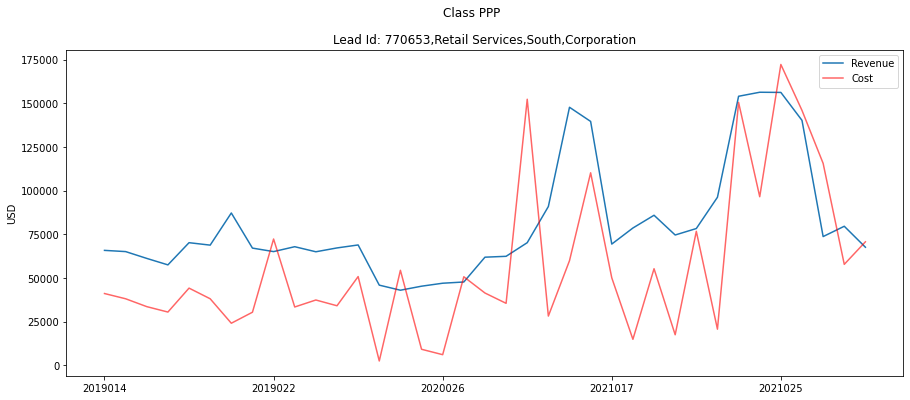

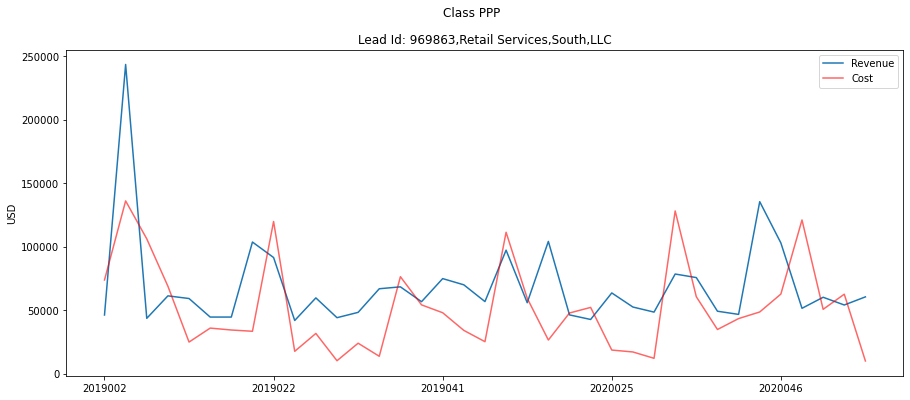

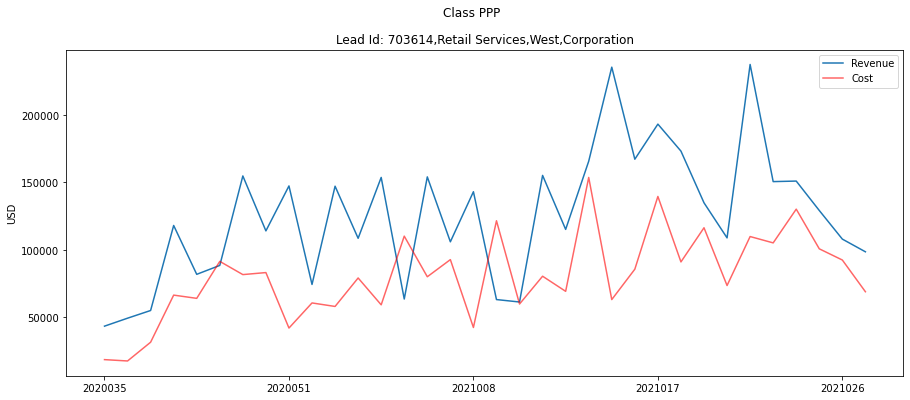

In [812]:
#Focus on Retail Service
name = Group_Count("Retail Services")
x = name.head(15)
list=[]
for i in x["Lead Id"]:
    list.append(i)
Graphing(list)

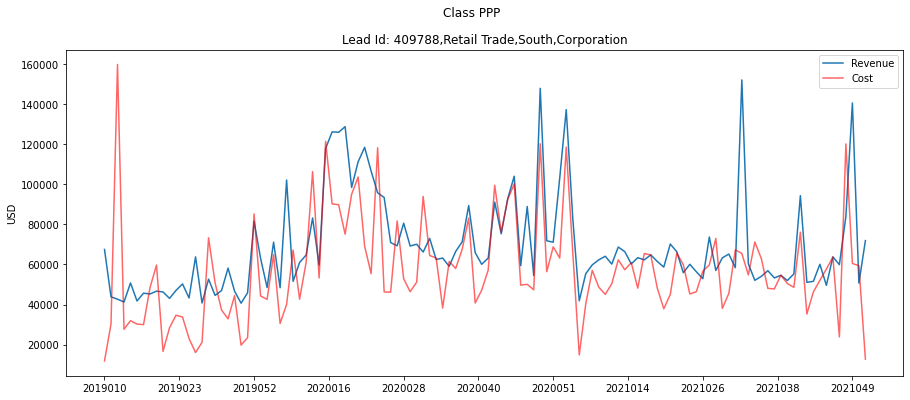

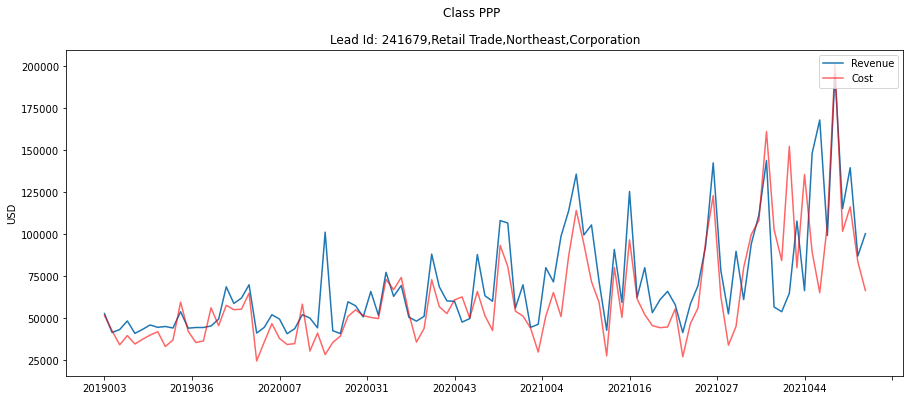

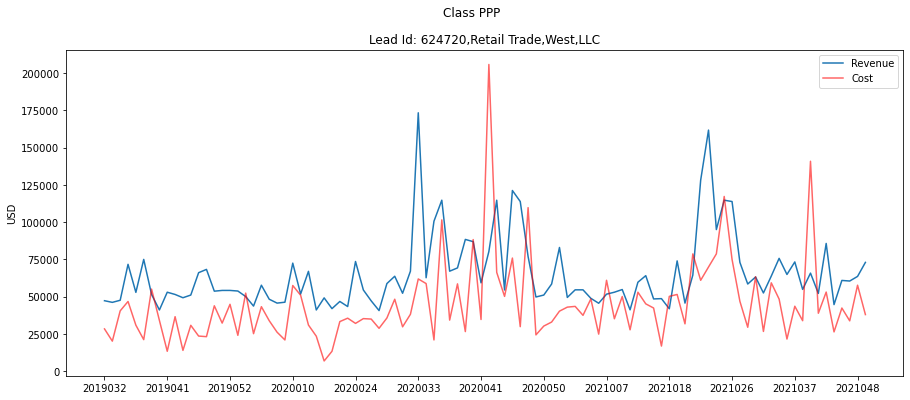

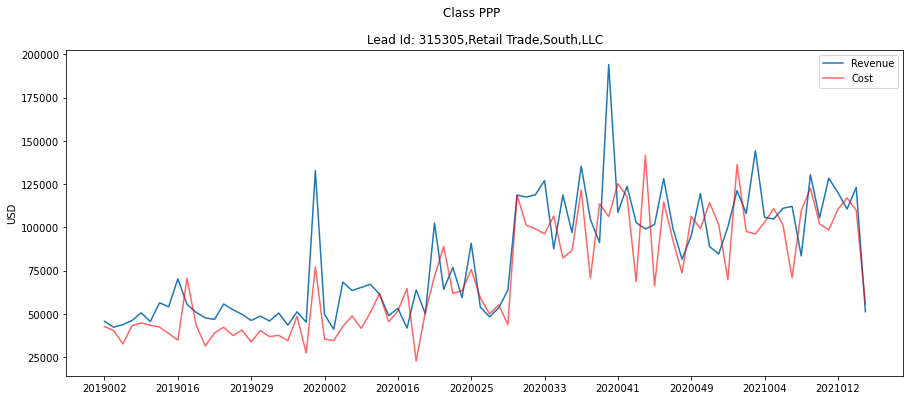

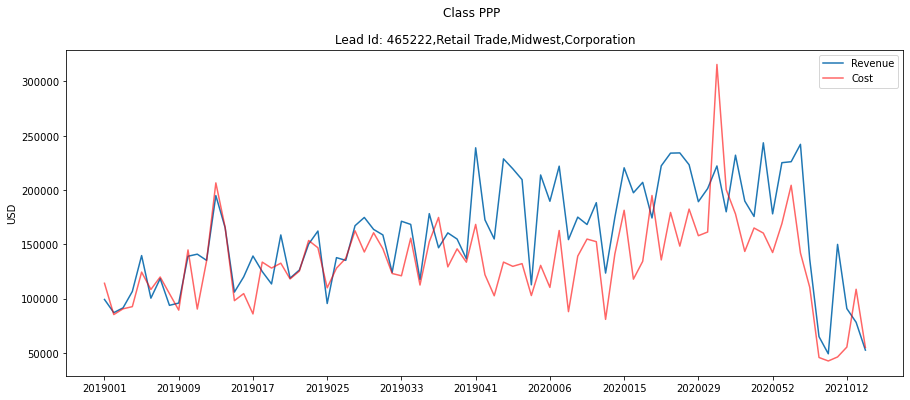

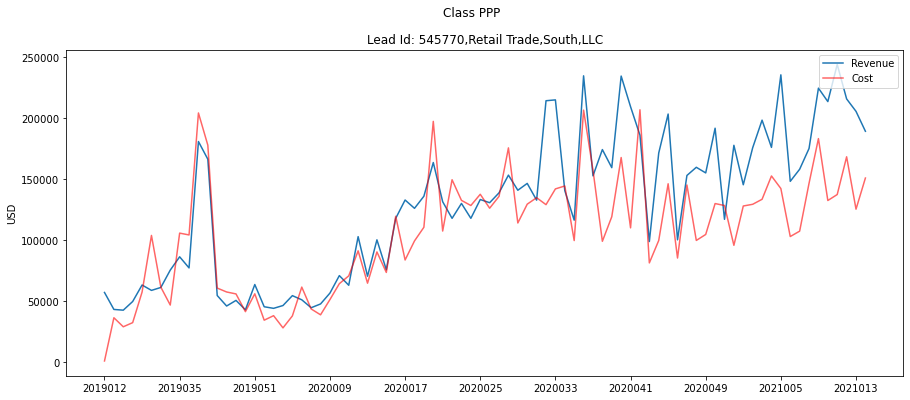

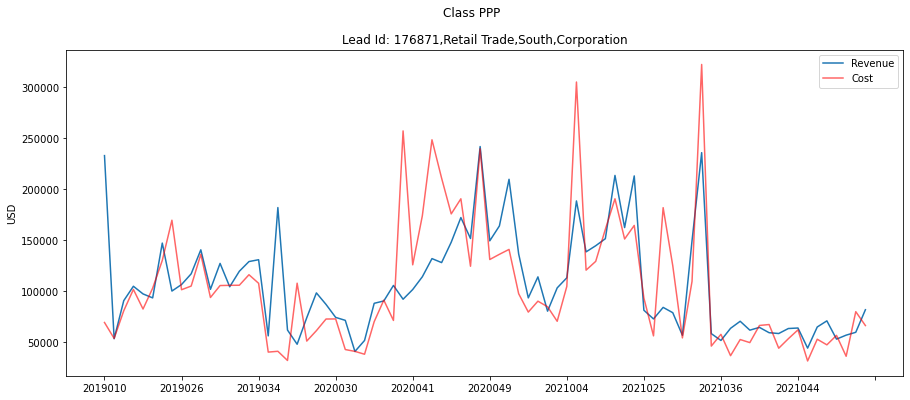

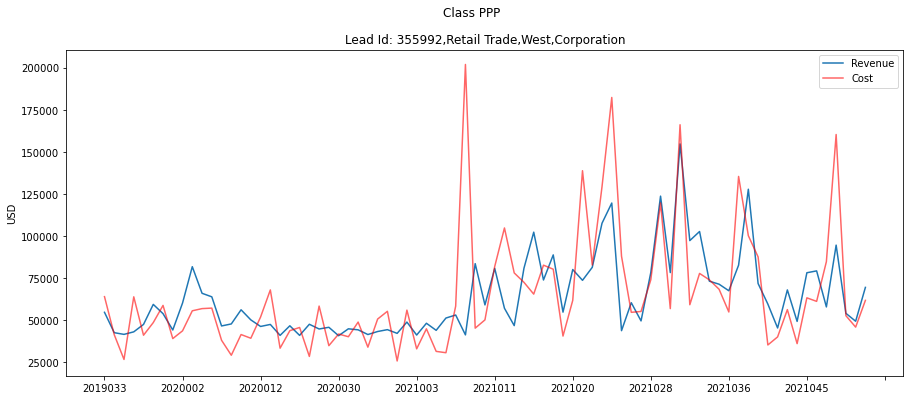

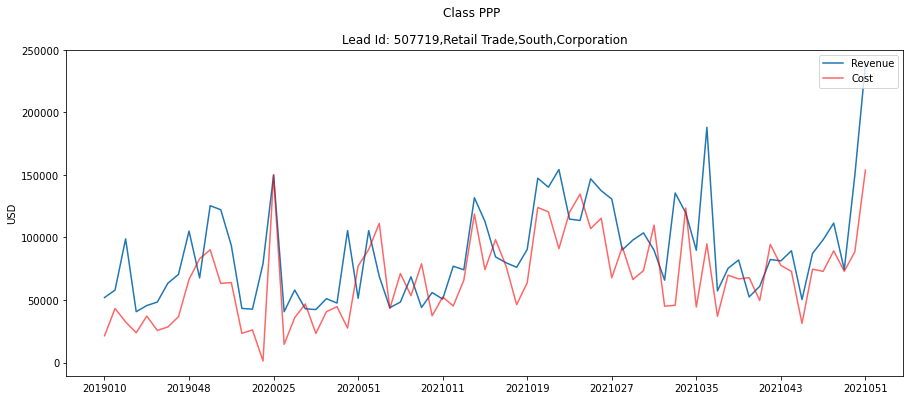

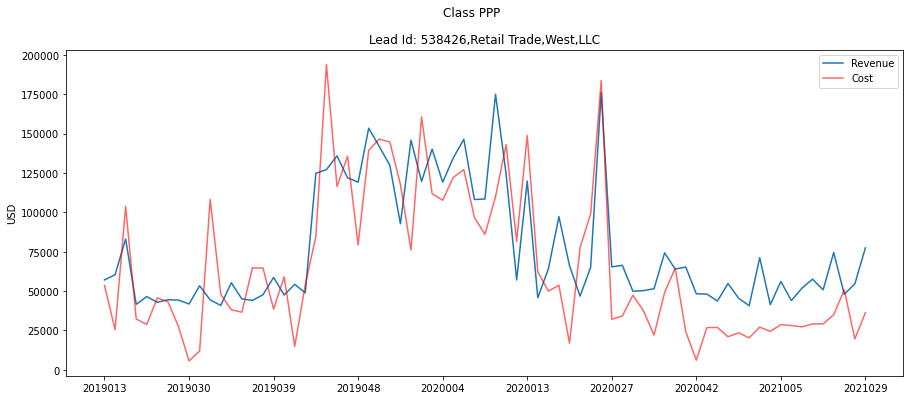

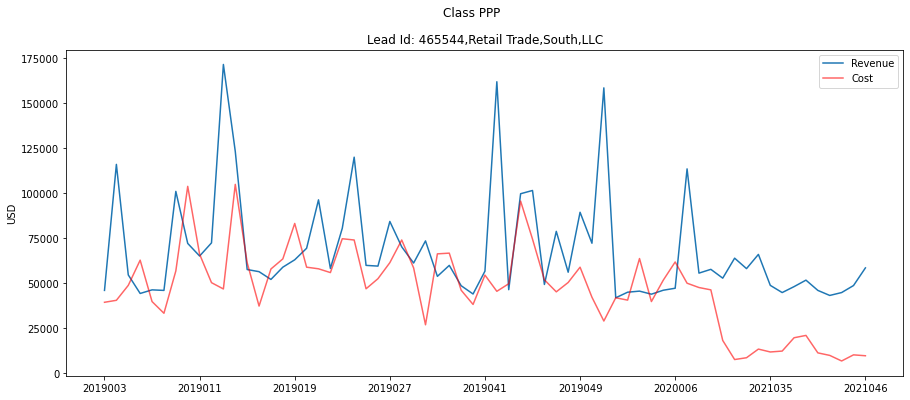

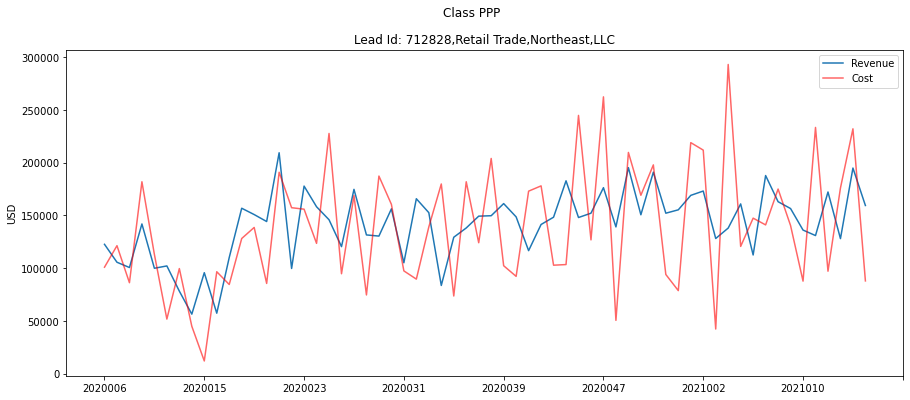

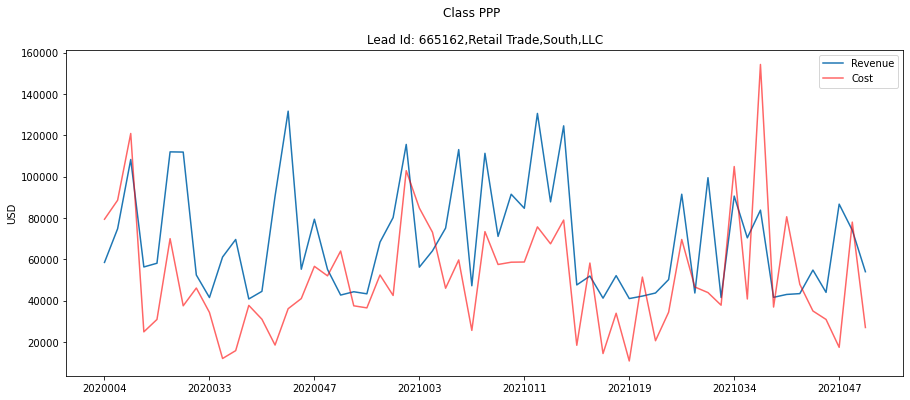

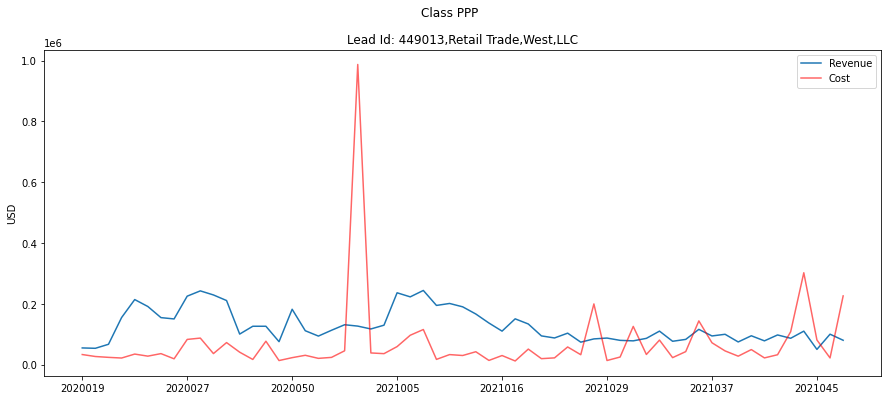

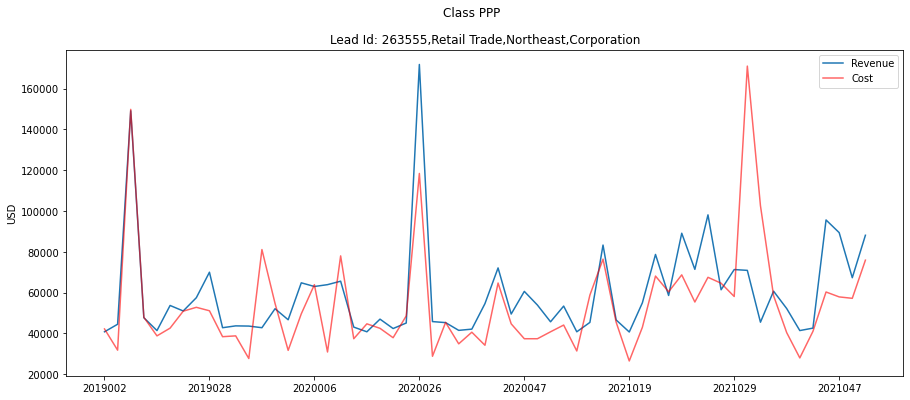

In [813]:
#Focus on Retail Trade
name = Group_Count("Retail Trade")
x = name.head(15)
list=[]
for i in x["Lead Id"]:
    list.append(i)
Graphing(list)

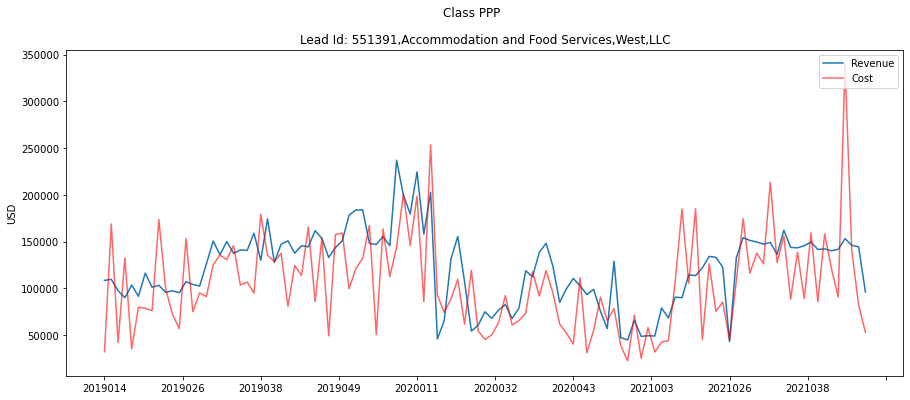

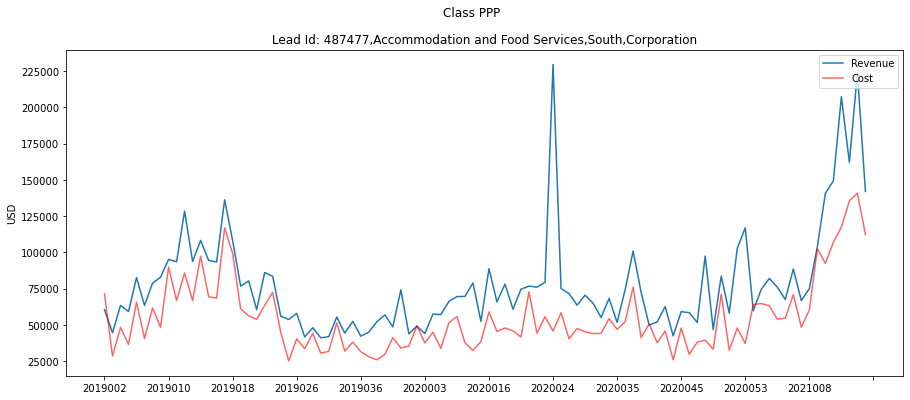

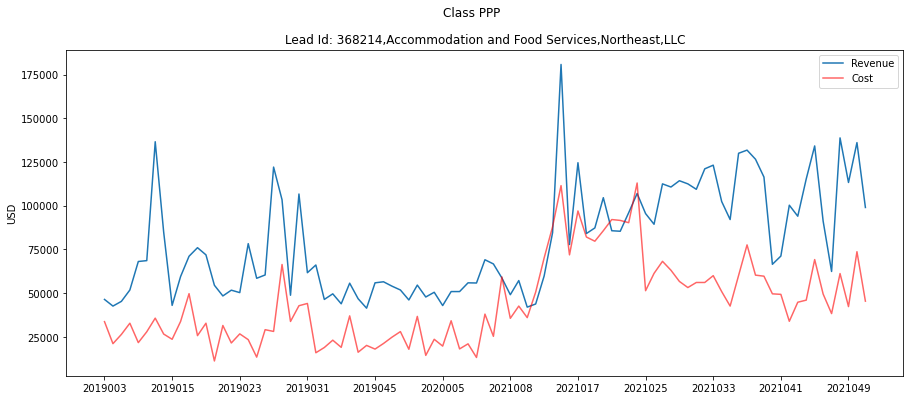

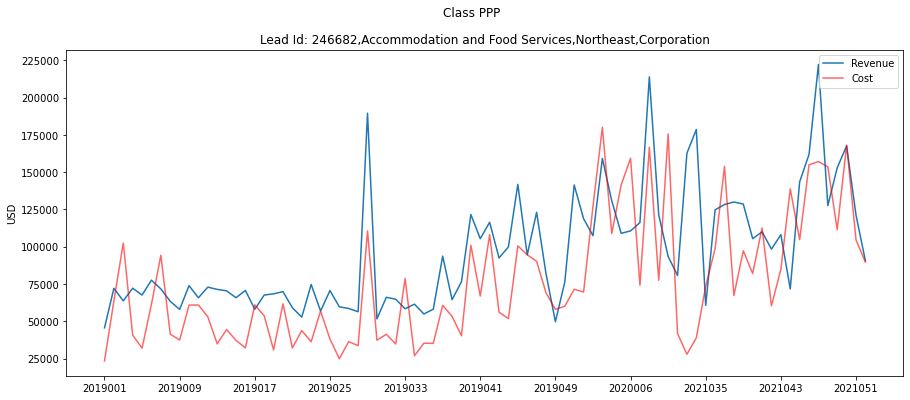

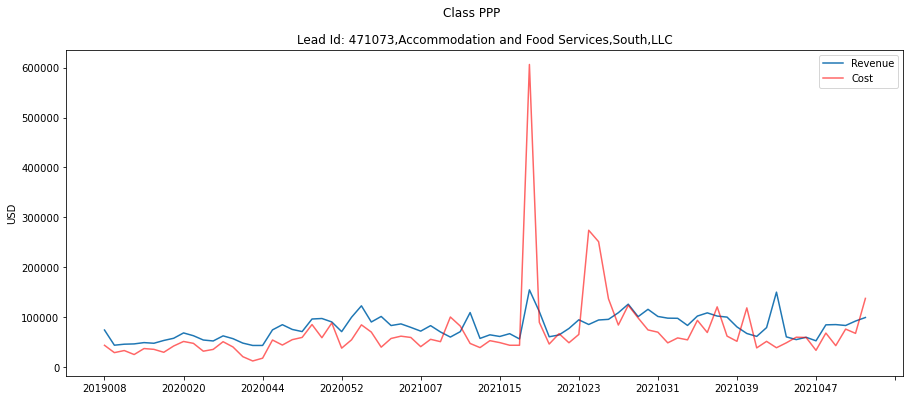

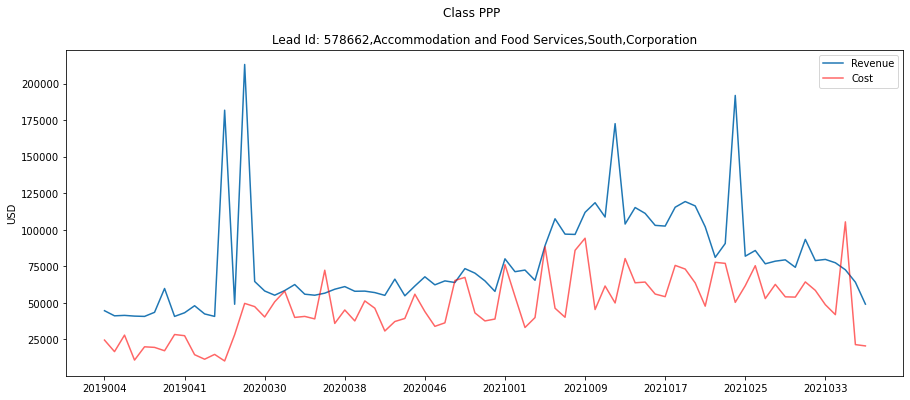

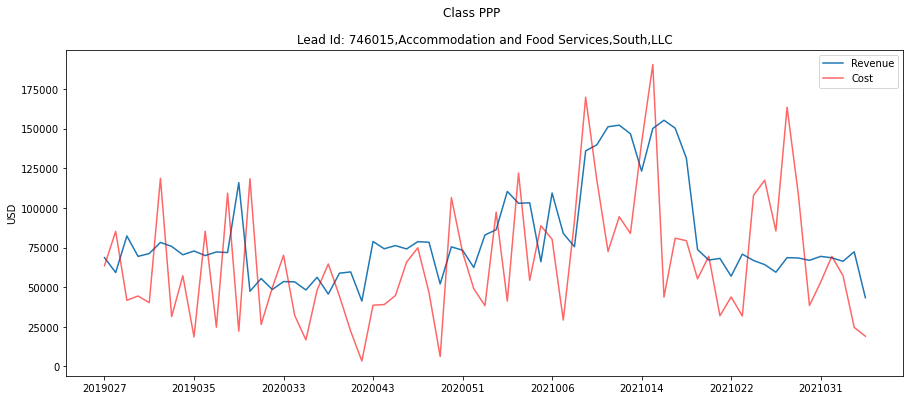

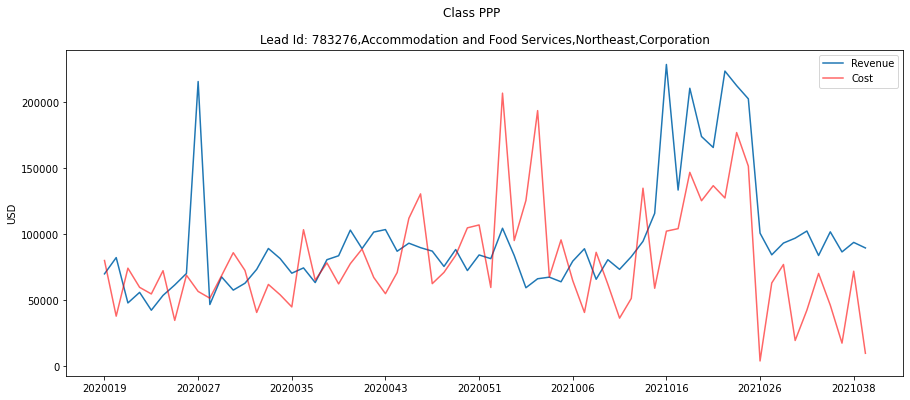

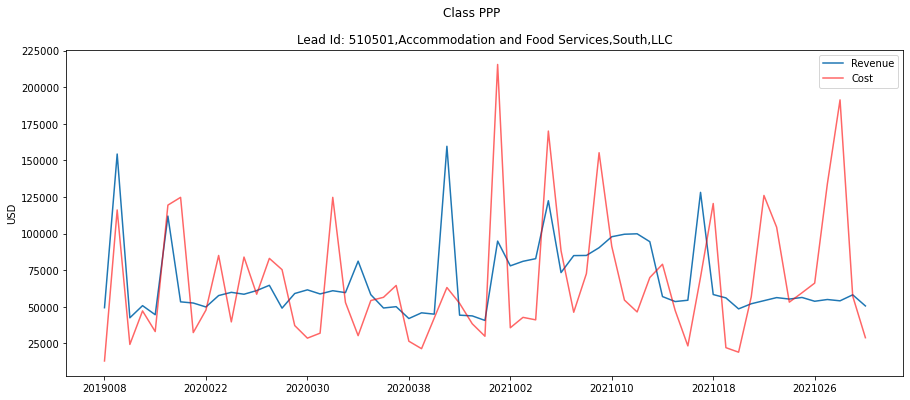

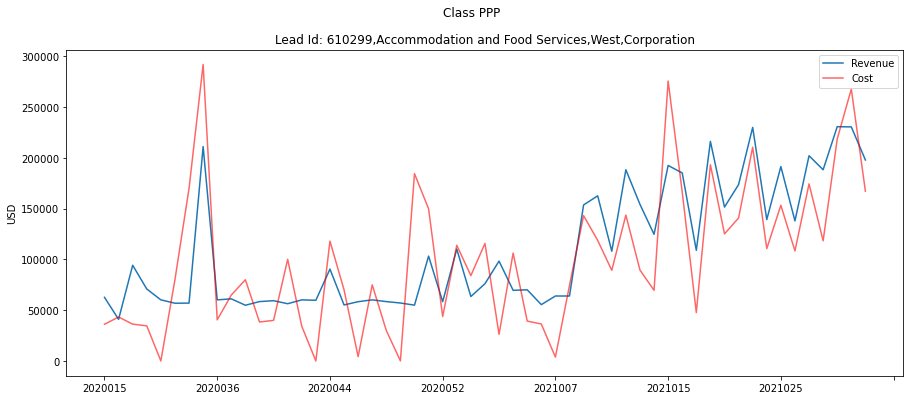

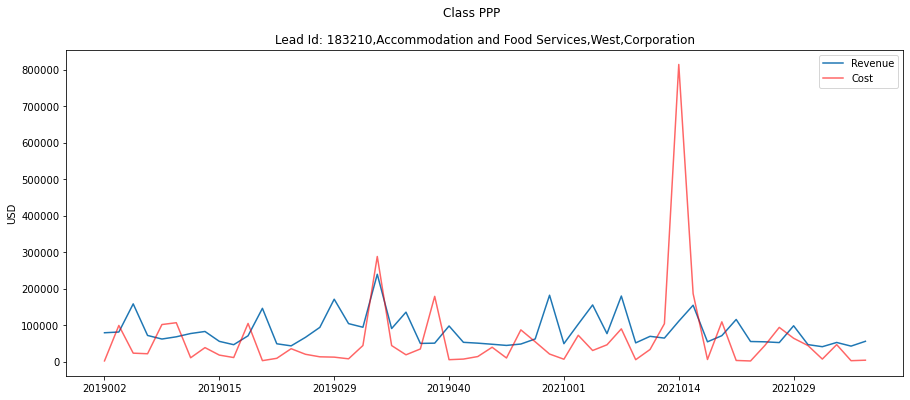

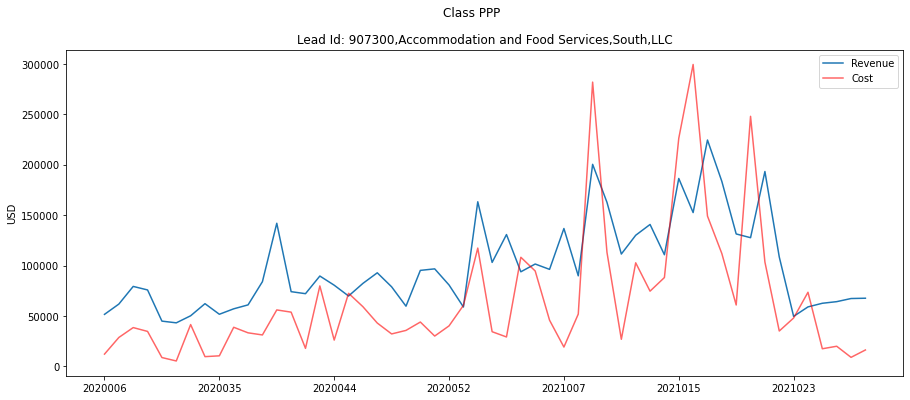

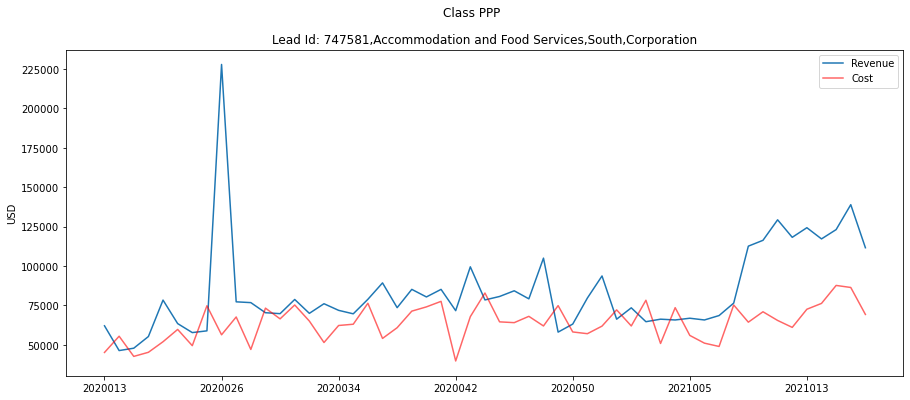

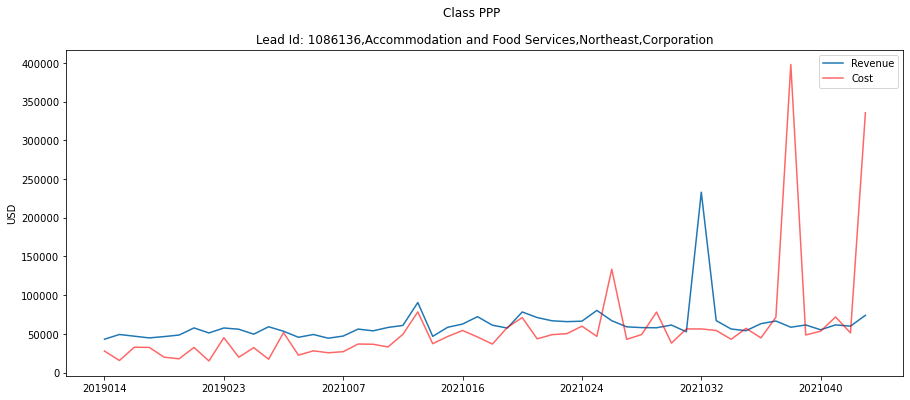

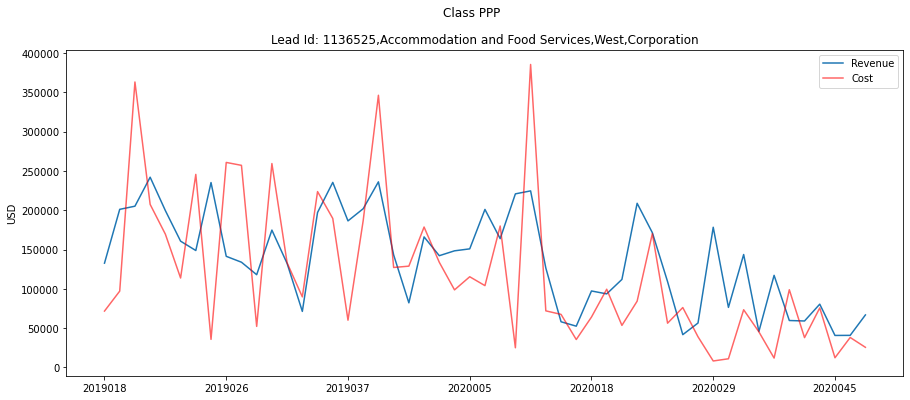

In [814]:
#Focus on Accommodation and Food Services 
name = Group_Count("Accommodation and Food Services")
x = name.head(15)
list=[]
for i in x["Lead Id"]:
    list.append(i)
Graphing(list)

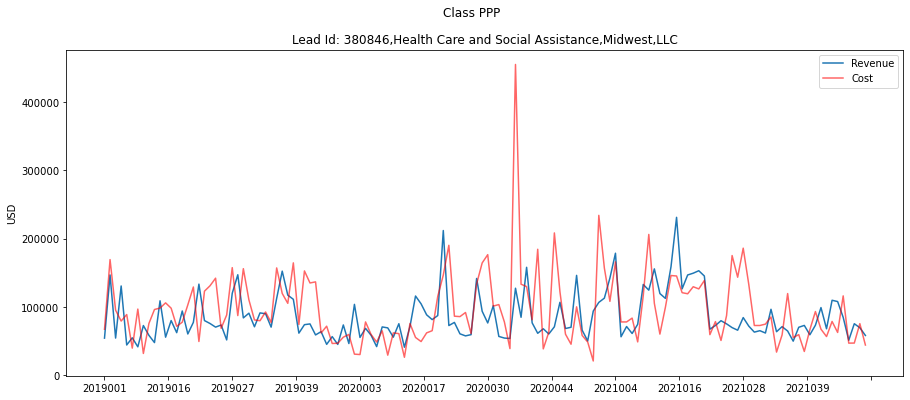

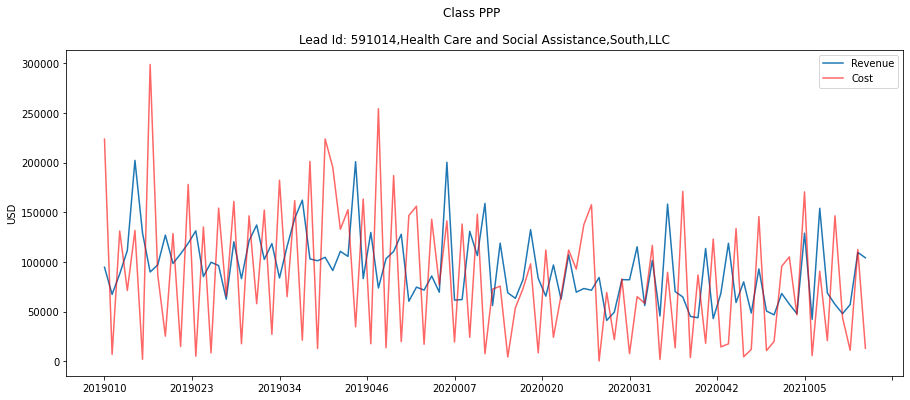

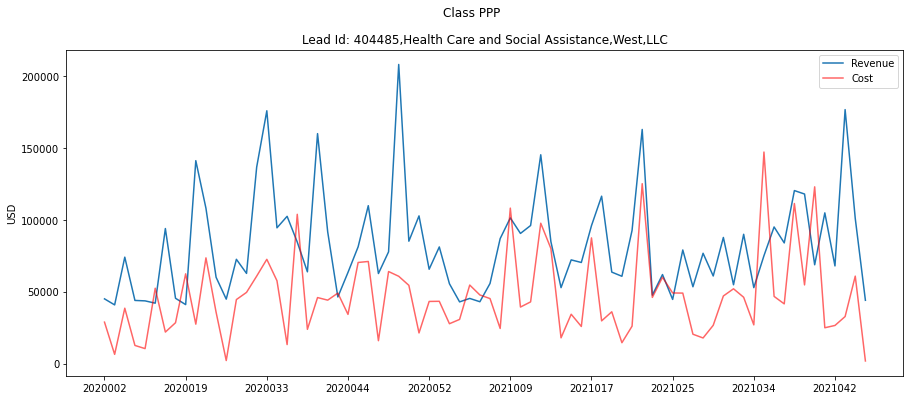

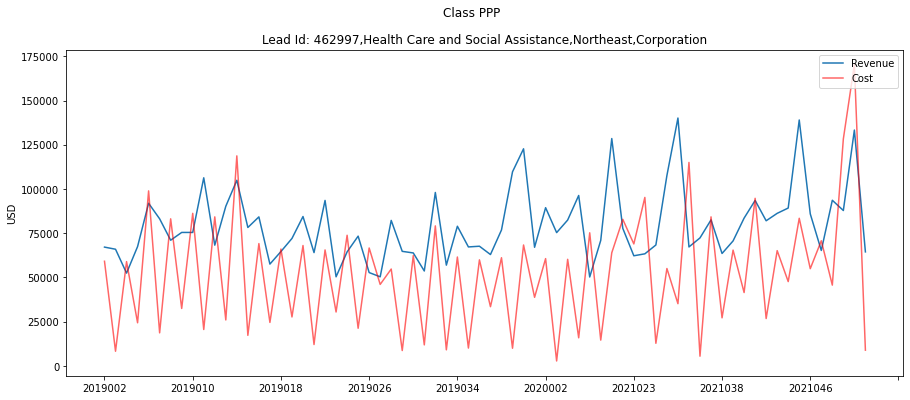

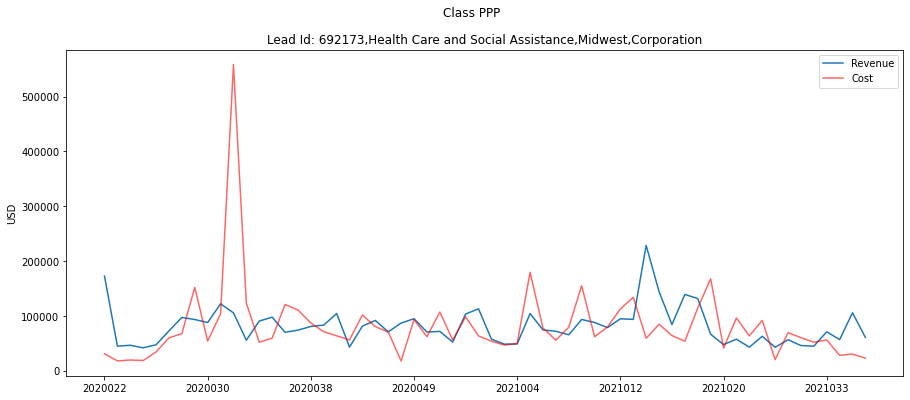

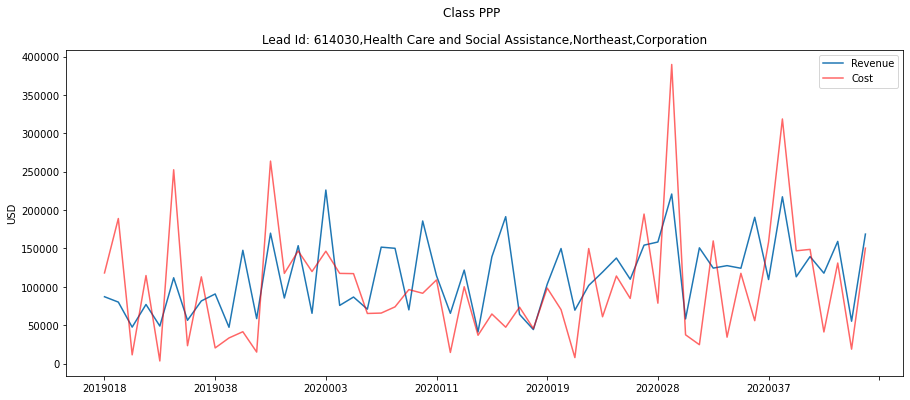

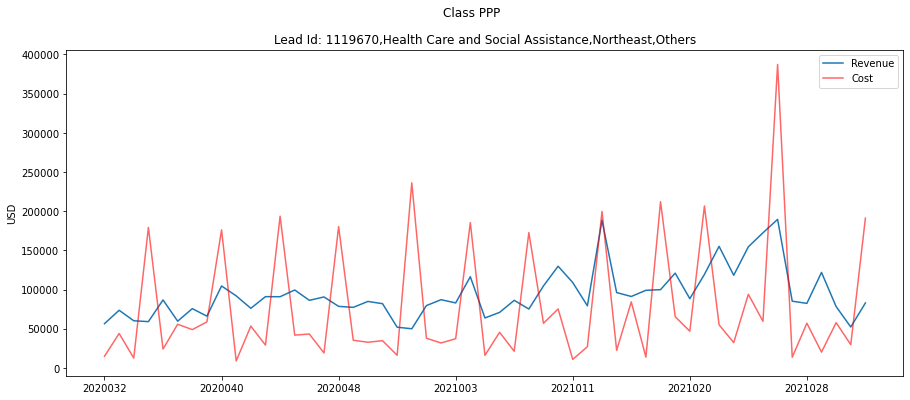

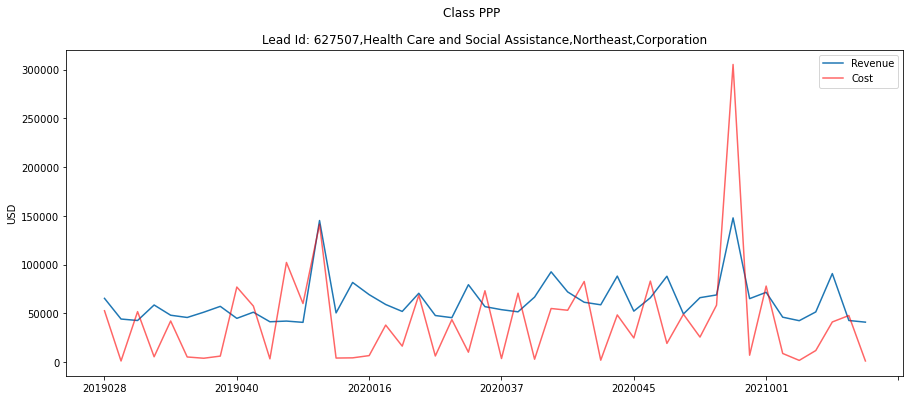

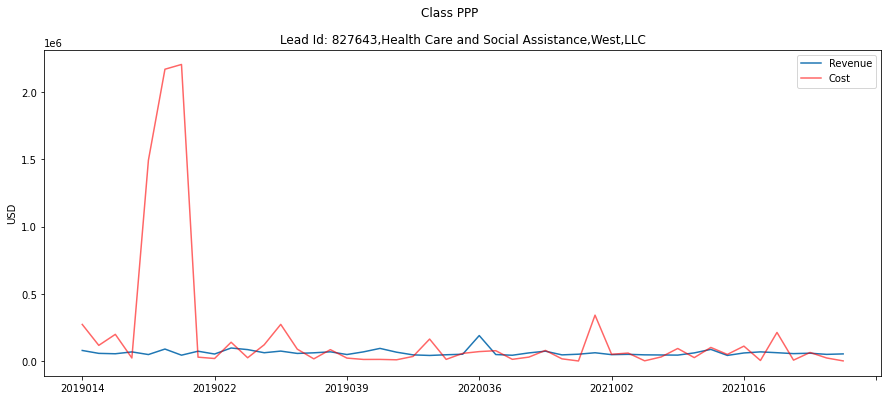

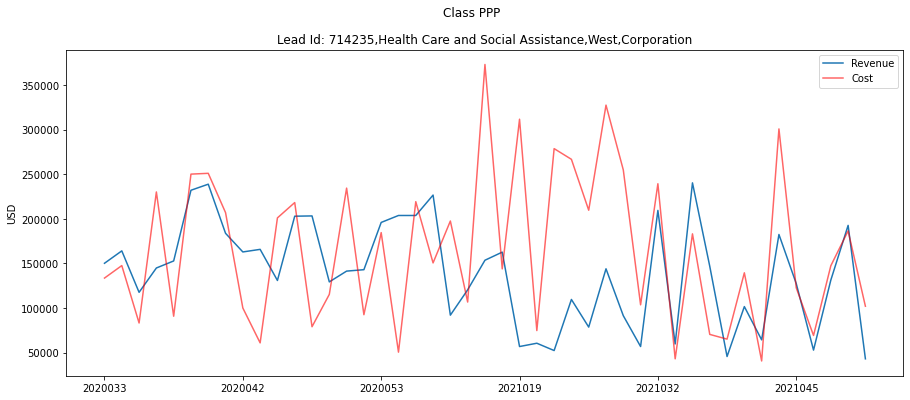

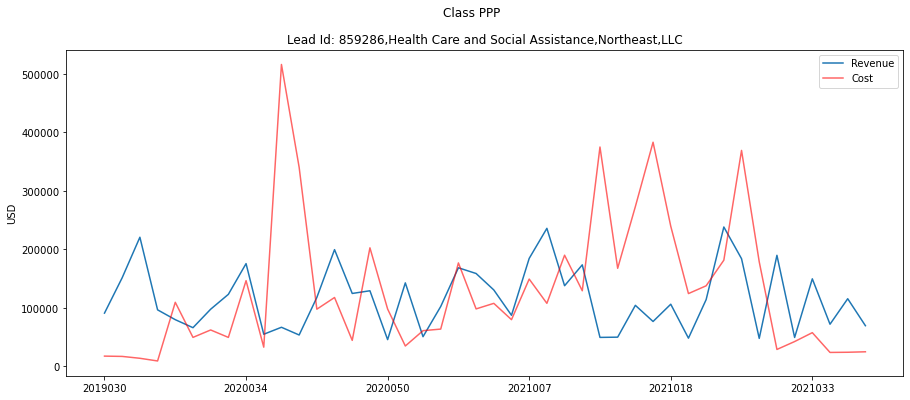

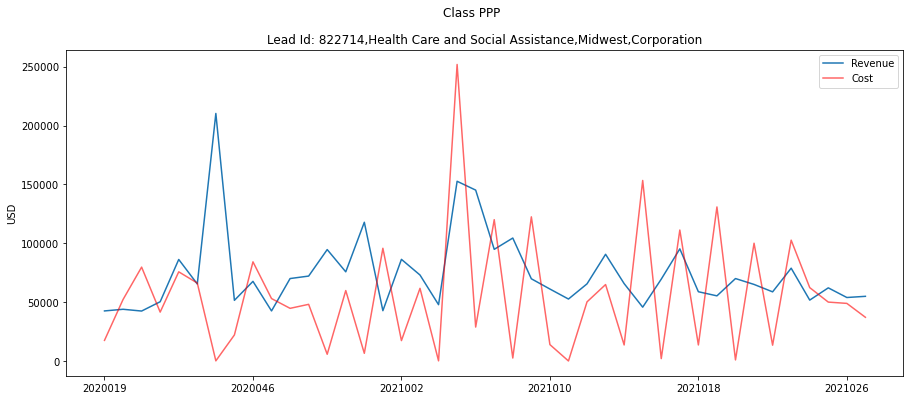

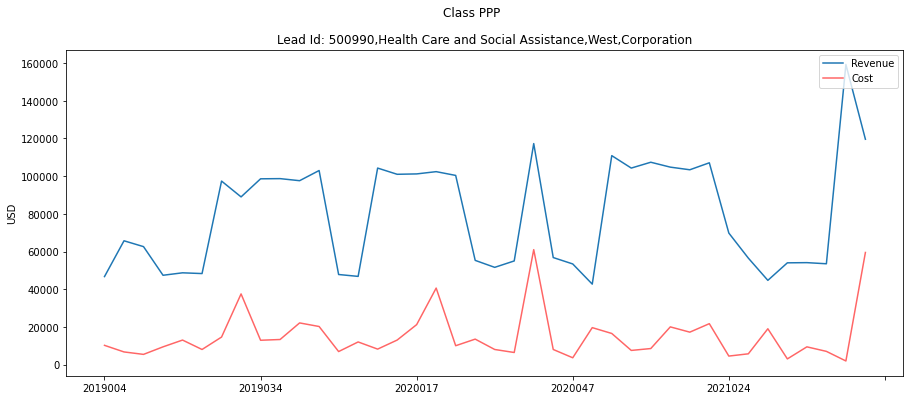

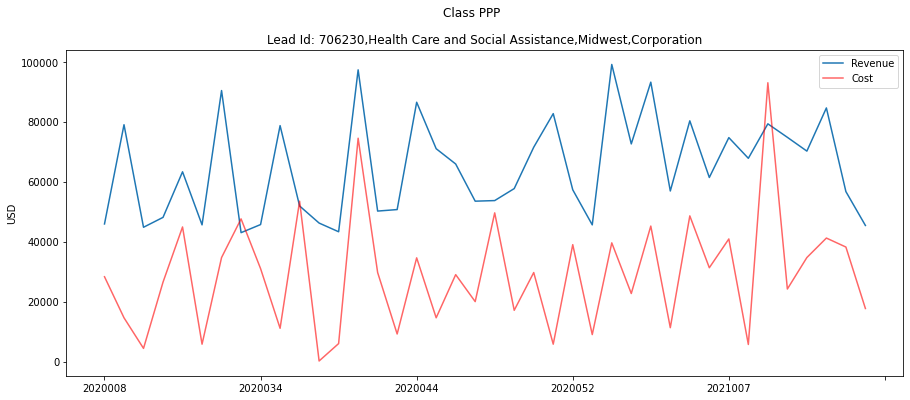

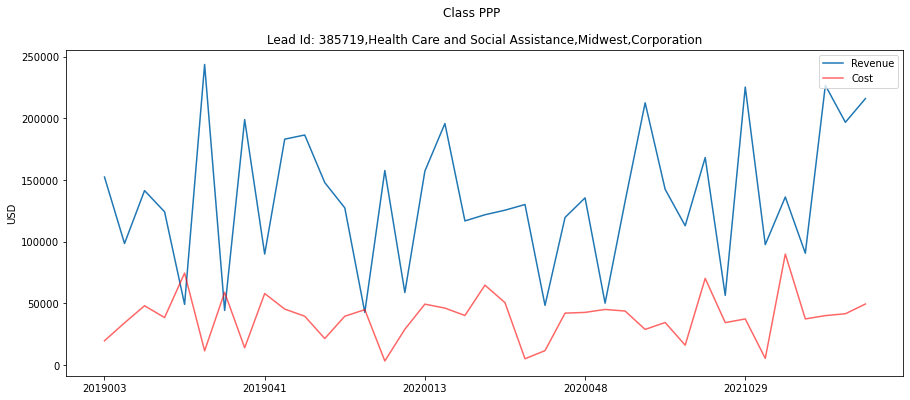

In [815]:
#Focus on Health Care and Social Assistance
name = Group_Count("Health Care and Social Assistance")
x = name.head(15)
list=[]
for i in x["Lead Id"]:
    list.append(i)
Graphing(list)

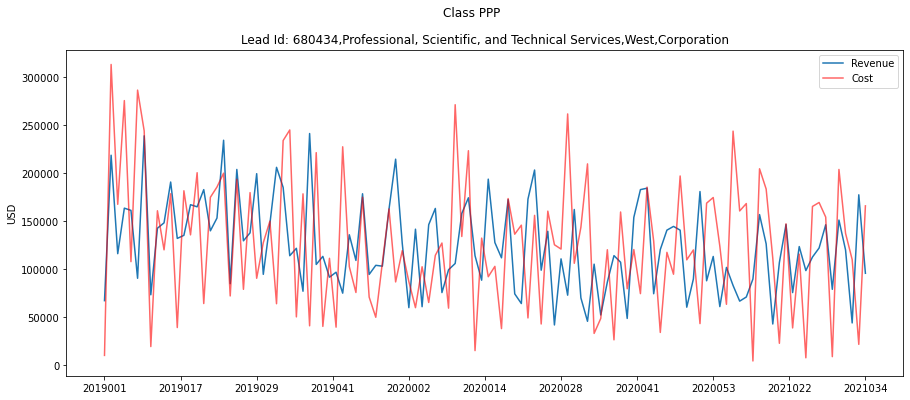

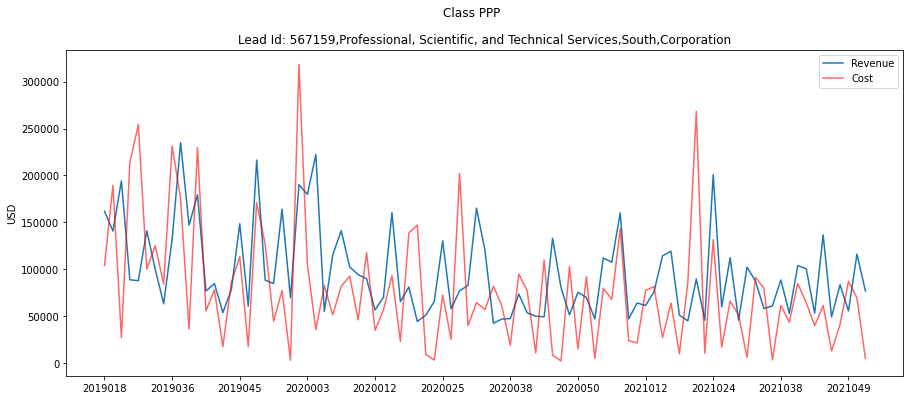

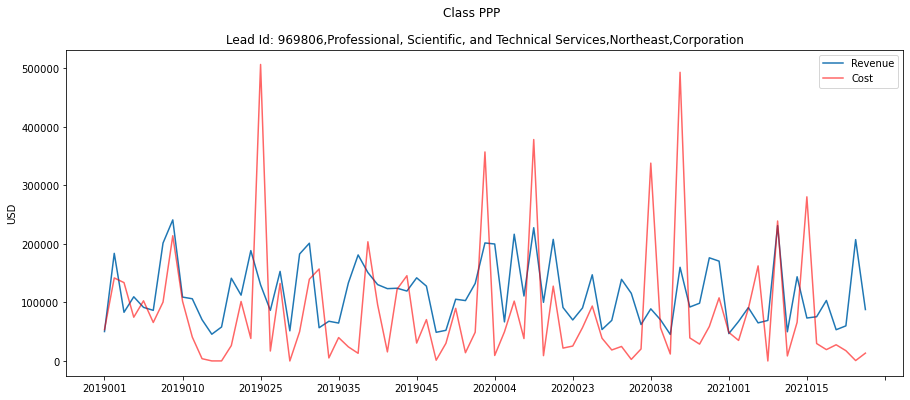

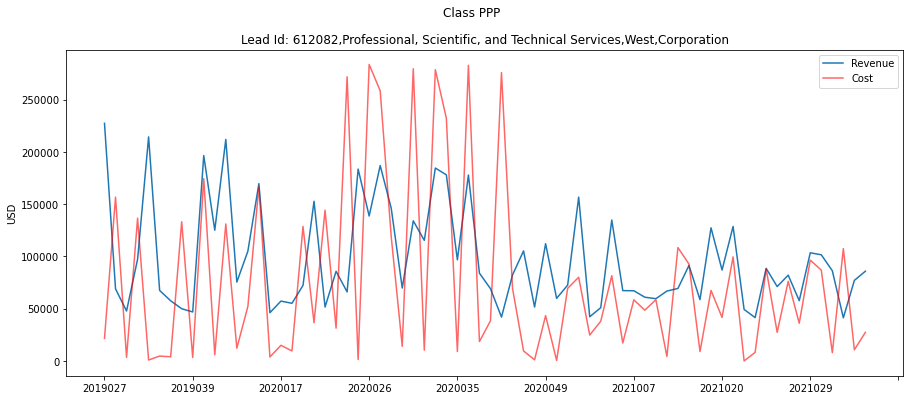

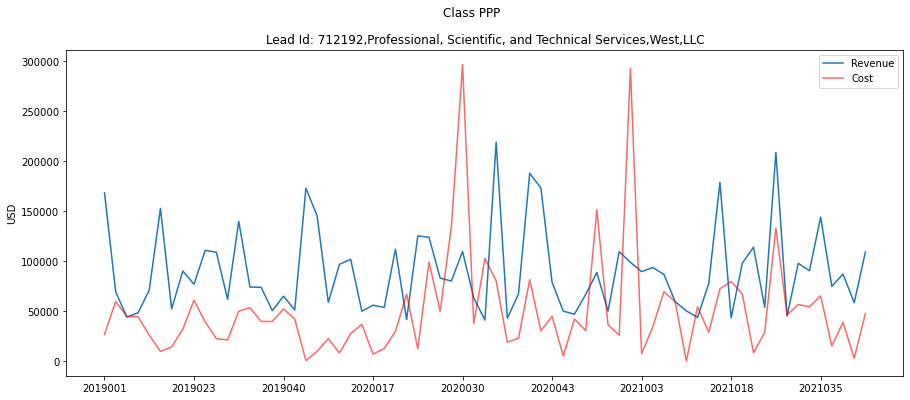

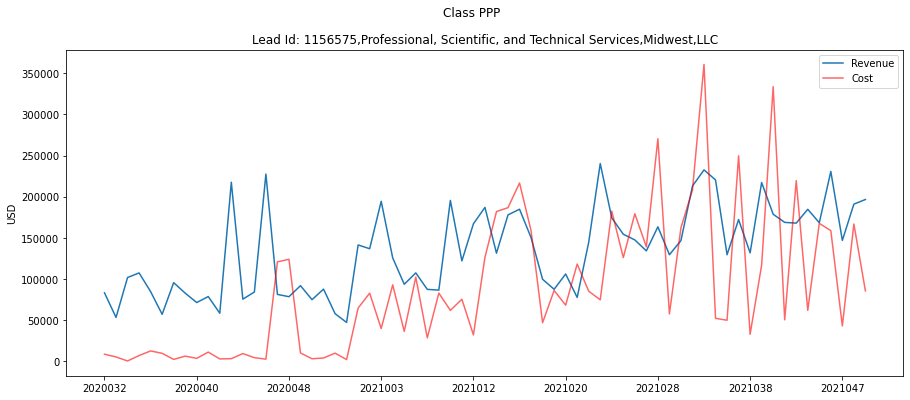

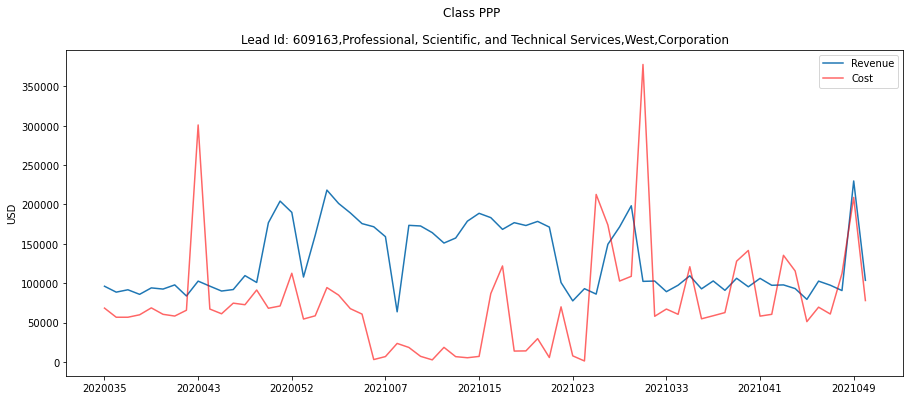

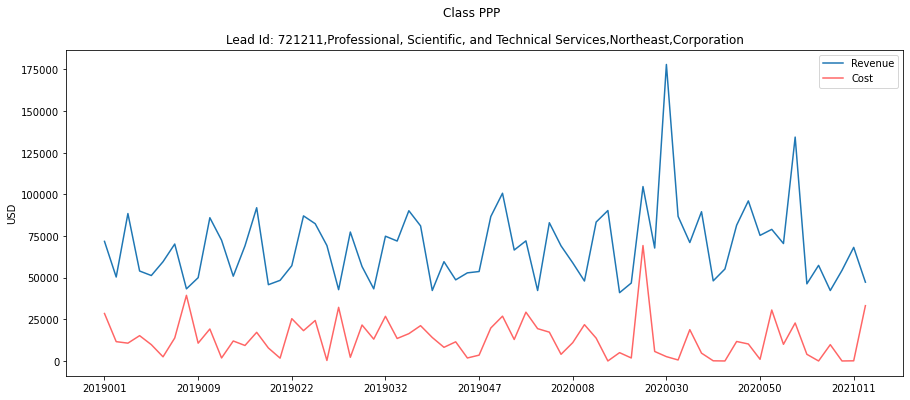

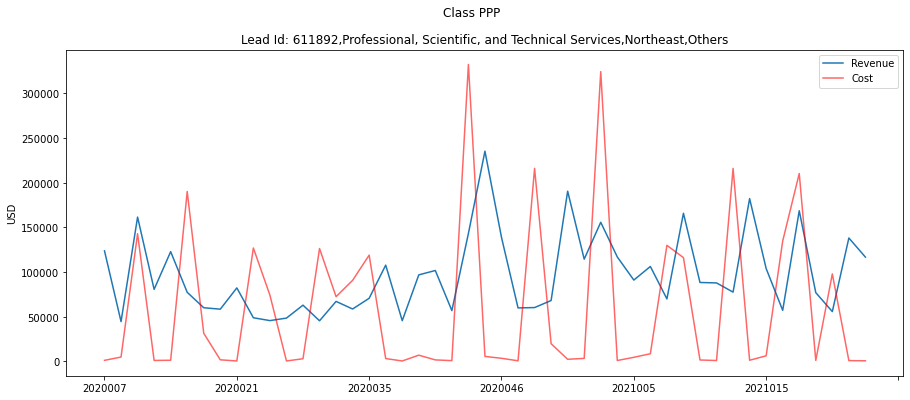

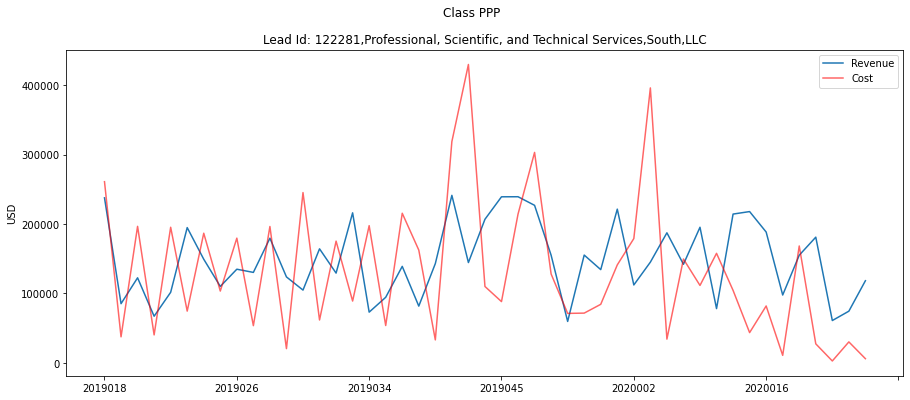

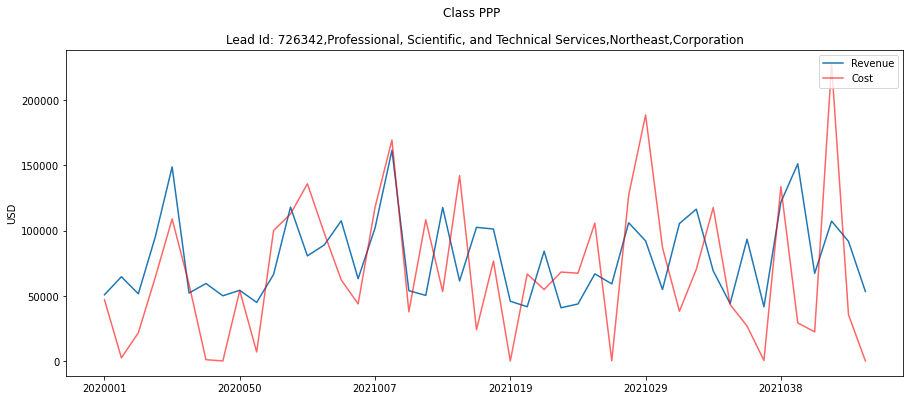

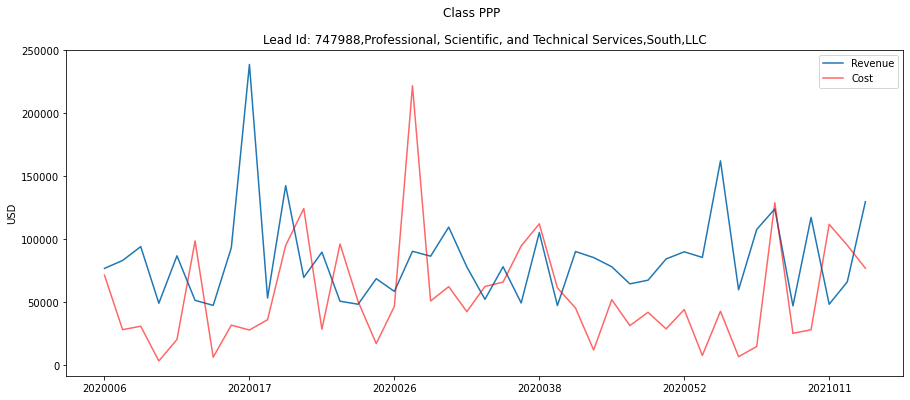

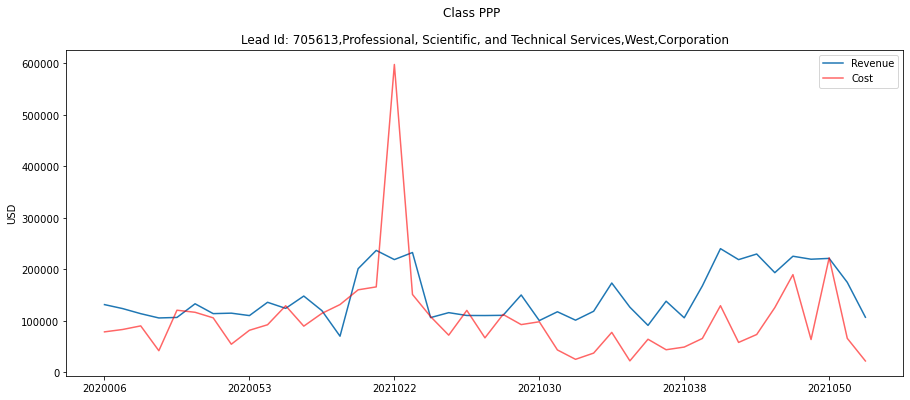

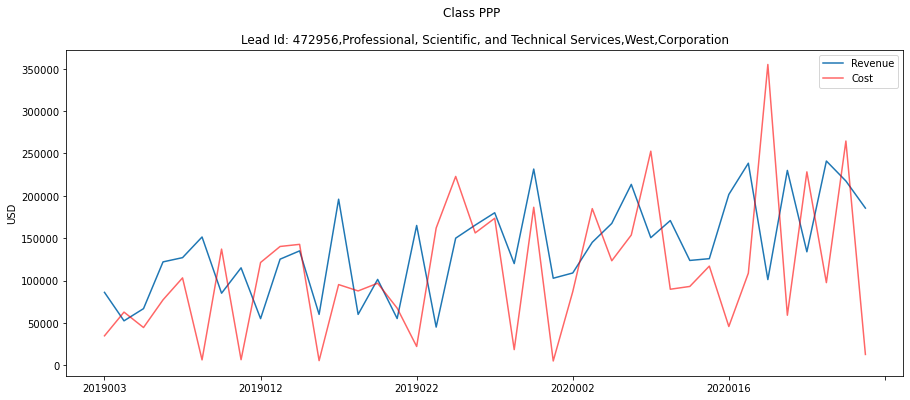

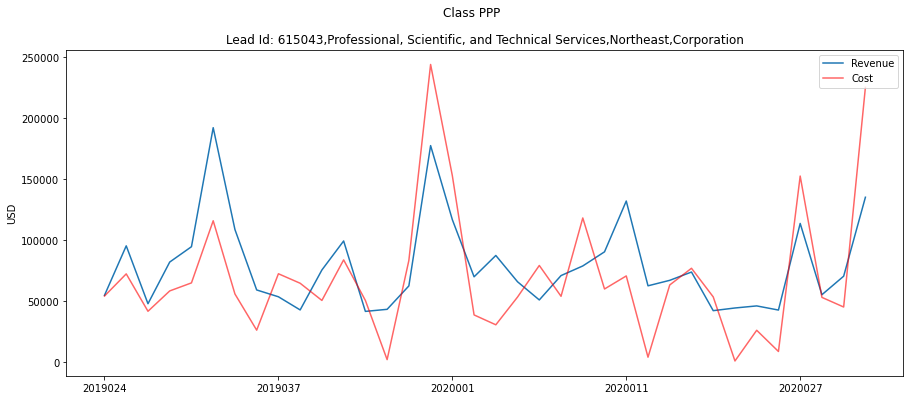

In [816]:
#Focus on Professional, Scientific, and Technical Services
name = Group_Count("Professional, Scientific, and Technical Services")
x = name.head(15)
list=[]
for i in x["Lead Id"]:
    list.append(i)
Graphing(list)

In [817]:
'''
1. Revenue decline since PPP 1 and cost cutting during Covid:
Acc         551391
RetailTrade 409788

2. Cost increasing recently - cost inflation, revenue also increase
RetailService 79360
Acc           487477


3. non ppp cases, revenue - cost > 0
RetailTrade   464509



'''


'\n1. Revenue decline since PPP 1 and cost cutting during Covid:\nAcc         551391\nRetailTrade 409788\n\n2. Cost increasing recently - cost inflation, revenue also increase\nRetailService 79360\nAcc           487477\n\n\n3. non ppp cases, revenue - cost > 0\nRetailTrade   464509\n\n\n\n'

## PPP: Profit Margin = Rev-Cost/ Rev. Historgram (after COVID)
## Dec 2022

In [818]:
lead_ppp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21679 entries, 1341 to 1214477
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Lead Id          21679 non-null  int64 
 1   Id               21679 non-null  int64 
 2   week             21679 non-null  int64 
 3   Revenue          21679 non-null  int64 
 4   Operating Costs  21679 non-null  int64 
 5   PPP_class        21679 non-null  object
 6   industry_sector  21679 non-null  object
 7   census_region    21679 non-null  object
 8   Business Type    21679 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.7+ MB


In [819]:
lead_ppp_sechalf = lead_ppp.loc[(lead_ppp["week"]>2020020)& (lead_ppp["week"]<2020054)]

In [820]:
lead_ppp_sechalf = lead_ppp_sechalf.sort_values(["Lead Id", "week"], ascending=True)
lead_ppp_sechalf

Lead Id     Id     week  Revenue  Operating Costs PPP_class  \
1396       64766   6671  2020026    70000              100       PPP   
1605       73932   4839  2020022    81900            33200       PPP   
1612       73932   4839  2020029   160000            70000       PPP   
1613       73932   4839  2020030   150800           127300       PPP   
1615       73932   4839  2020032   228600           155000       PPP   
...          ...    ...      ...      ...              ...       ...   
1157502  1239412  12339  2020046    50600            63600       PPP   
1157484  1239412  12339  2020049    42700            51300       PPP   
1157486  1239412  12339  2020051    53700            51200       PPP   
1157487  1239412  12339  2020052    40900           107000       PPP   
1157488  1239412  12339  2020053    93400            80200       PPP   

        industry_sector census_region Business Type  
1396                B2B     Northeast   Corporation  
1605                B2B         South   Corporation  
1612                B2B         South   Corporation  
1613                B2B         South   Corporation  
1615                B2B         South   Corporation  
...                 ...           ...           ...  
1157502    Retail Trade         South           LLC  
1157484    Retail Trade         South           LLC  
1157486    Retail Trade         South           LLC  
1157487    Retail Trade         South           LLC  
1157488    Retail Trade         South           LLC  

[6833 rows x 9 columns]

In [821]:
lead_ppp_dec2022 = lead_ppp_sechalf
lead_ppp_dec2022["week"] = lead_ppp_dec2022["week"].astype(str)
lead_ppp_dec2022 = lead_ppp_dec2022.loc[(lead_ppp_dec2022["week"].str.contains("202002"))| (lead_ppp_dec2022["week"].str.contains("202005"))]
lead_ppp_dec2022

Lead Id     Id     week  Revenue  Operating Costs PPP_class  \
1396       64766   6671  2020026    70000              100       PPP   
1605       73932   4839  2020022    81900            33200       PPP   
1612       73932   4839  2020029   160000            70000       PPP   
1624       73932   4839  2020050   178900           124500       PPP   
1625       73932   4839  2020051   147100            71500       PPP   
...          ...    ...      ...      ...              ...       ...   
1155004  1236244  45472  2020028   115100            82500       PPP   
1155005  1236244  45472  2020029   115400           130100       PPP   
1157486  1239412  12339  2020051    53700            51200       PPP   
1157487  1239412  12339  2020052    40900           107000       PPP   
1157488  1239412  12339  2020053    93400            80200       PPP   

         industry_sector census_region Business Type  
1396                 B2B     Northeast   Corporation  
1605                 B2B         South   Corporation  
1612                 B2B         South   Corporation  
1624                 B2B         South   Corporation  
1625                 B2B         South   Corporation  
...                  ...           ...           ...  
1155004  Retail Services         South           LLC  
1155005  Retail Services         South           LLC  
1157486     Retail Trade         South           LLC  
1157487     Retail Trade         South           LLC  
1157488     Retail Trade         South           LLC  

[2783 rows x 9 columns]

In [822]:
lead_ppp_dec2022["Result"]=0
lead_ppp_dec2022["Result2"]=0
lead_ppp_dec2022

C:\Users\NELSON~1.WAN\AppData\Local\Temp/ipykernel_17052/1881590092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lead_ppp_dec2022["Result"]=0
C:\Users\NELSON~1.WAN\AppData\Local\Temp/ipykernel_17052/1881590092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lead_ppp_dec2022["Result2"]=0


Lead Id     Id     week  Revenue  Operating Costs PPP_class  \
1396       64766   6671  2020026    70000              100       PPP   
1605       73932   4839  2020022    81900            33200       PPP   
1612       73932   4839  2020029   160000            70000       PPP   
1624       73932   4839  2020050   178900           124500       PPP   
1625       73932   4839  2020051   147100            71500       PPP   
...          ...    ...      ...      ...              ...       ...   
1155004  1236244  45472  2020028   115100            82500       PPP   
1155005  1236244  45472  2020029   115400           130100       PPP   
1157486  1239412  12339  2020051    53700            51200       PPP   
1157487  1239412  12339  2020052    40900           107000       PPP   
1157488  1239412  12339  2020053    93400            80200       PPP   

         industry_sector census_region Business Type  Result  Result2  
1396                 B2B     Northeast   Corporation       0        0  
1605                 B2B         South   Corporation       0        0  
1612                 B2B         South   Corporation       0        0  
1624                 B2B         South   Corporation       0        0  
1625                 B2B         South   Corporation       0        0  
...                  ...           ...           ...     ...      ...  
1155004  Retail Services         South           LLC       0        0  
1155005  Retail Services         South           LLC       0        0  
1157486     Retail Trade         South           LLC       0        0  
1157487     Retail Trade         South           LLC       0        0  
1157488     Retail Trade         South           LLC       0        0  

[2783 rows x 11 columns]

In [823]:
test = pd.get_dummies(lead_ppp_dec2022, columns = ["week"],prefix='', prefix_sep='')

test

Lead Id     Id  Revenue  Operating Costs PPP_class  industry_sector  \
1396       64766   6671    70000              100       PPP              B2B   
1605       73932   4839    81900            33200       PPP              B2B   
1612       73932   4839   160000            70000       PPP              B2B   
1624       73932   4839   178900           124500       PPP              B2B   
1625       73932   4839   147100            71500       PPP              B2B   
...          ...    ...      ...              ...       ...              ...   
1155004  1236244  45472   115100            82500       PPP  Retail Services   
1155005  1236244  45472   115400           130100       PPP  Retail Services   
1157486  1239412  12339    53700            51200       PPP     Retail Trade   
1157487  1239412  12339    40900           107000       PPP     Retail Trade   
1157488  1239412  12339    93400            80200       PPP     Retail Trade   

        census_region Business Type  Result  Result2  ...  2020024  2020025  \
1396        Northeast   Corporation       0        0  ...        0        0   
1605            South   Corporation       0        0  ...        0        0   
1612            South   Corporation       0        0  ...        0        0   
1624            South   Corporation       0        0  ...        0        0   
1625            South   Corporation       0        0  ...        0        0   
...               ...           ...     ...      ...  ...      ...      ...   
1155004         South           LLC       0        0  ...        0        0   
1155005         South           LLC       0        0  ...        0        0   
1157486         South           LLC       0        0  ...        0        0   
1157487         South           LLC       0        0  ...        0        0   
1157488         South           LLC       0        0  ...        0        0   

         2020026  2020027  2020028  2020029  2020050  2020051  2020052  \
1396           1        0        0        0        0        0        0   
1605           0        0        0        0        0        0        0   
1612           0        0        0        1        0        0        0   
1624           0        0        0        0        1        0        0   
1625           0        0        0        0        0        1        0   
...          ...      ...      ...      ...      ...      ...      ...   
1155004        0        0        1        0        0        0        0   
1155005        0        0        0        1        0        0        0   
1157486        0        0        0        0        0        1        0   
1157487        0        0        0        0        0        0        1   
1157488        0        0        0        0        0        0        0   

         2020053  
1396           0  
1605           0  
1612           0  
1624           0  
1625           0  
...          ...  
1155004        0  
1155005        0  
1157486        0  
1157487        0  
1157488        1  

[2783 rows x 23 columns]

In [824]:
test.iloc[:,9:19]
test.iloc[:,19:23]

2020050  2020051  2020052  2020053
1396           0        0        0        0
1605           0        0        0        0
1612           0        0        0        0
1624           1        0        0        0
1625           0        1        0        0
...          ...      ...      ...      ...
1155004        0        0        0        0
1155005        0        0        0        0
1157486        0        1        0        0
1157487        0        0        1        0
1157488        0        0        0        1

[2783 rows x 4 columns]

In [825]:
count=0
for i in test:
    if count >9 and count<19:
        test["Result"] += test[i]
    elif count >18:
        test["Result2"]+= test[i]
    count+=1
test

Lead Id     Id  Revenue  Operating Costs PPP_class  industry_sector  \
1396       64766   6671    70000              100       PPP              B2B   
1605       73932   4839    81900            33200       PPP              B2B   
1612       73932   4839   160000            70000       PPP              B2B   
1624       73932   4839   178900           124500       PPP              B2B   
1625       73932   4839   147100            71500       PPP              B2B   
...          ...    ...      ...              ...       ...              ...   
1155004  1236244  45472   115100            82500       PPP  Retail Services   
1155005  1236244  45472   115400           130100       PPP  Retail Services   
1157486  1239412  12339    53700            51200       PPP     Retail Trade   
1157487  1239412  12339    40900           107000       PPP     Retail Trade   
1157488  1239412  12339    93400            80200       PPP     Retail Trade   

        census_region Business Type  Result  Result2  ...  2020024  2020025  \
1396        Northeast   Corporation       1        0  ...        0        0   
1605            South   Corporation       1        0  ...        0        0   
1612            South   Corporation       1        0  ...        0        0   
1624            South   Corporation       0        1  ...        0        0   
1625            South   Corporation       0        1  ...        0        0   
...               ...           ...     ...      ...  ...      ...      ...   
1155004         South           LLC       1        0  ...        0        0   
1155005         South           LLC       1        0  ...        0        0   
1157486         South           LLC       0        1  ...        0        0   
1157487         South           LLC       0        1  ...        0        0   
1157488         South           LLC       0        1  ...        0        0   

         2020026  2020027  2020028  2020029  2020050  2020051  2020052  \
1396           1        0        0        0        0        0        0   
1605           0        0        0        0        0        0        0   
1612           0        0        0        1        0        0        0   
1624           0        0        0        0        1        0        0   
1625           0        0        0        0        0        1        0   
...          ...      ...      ...      ...      ...      ...      ...   
1155004        0        0        1        0        0        0        0   
1155005        0        0        0        1        0        0        0   
1157486        0        0        0        0        0        1        0   
1157487        0        0        0        0        0        0        1   
1157488        0        0        0        0        0        0        0   

         2020053  
1396           0  
1605           0  
1612           0  
1624           0  
1625           0  
...          ...  
1155004        0  
1155005        0  
1157486        0  
1157487        0  
1157488        1  

[2783 rows x 23 columns]

In [826]:
test_gp = test.groupby("Lead Id").agg(Result = ("Result","sum"), Result2 = ("Result2","sum"))
test_gp.reset_index(inplace=True)
goal_list=[]
for index, i in test_gp.iterrows():
    if (i["Result"]>1) and (i["Result2"]>1):
        goal_list.append(i["Lead Id"])
goal_list

[73932,
 79360,
 176871,
 241679,
 315305,
 346966,
 380846,
 404485,
 409788,
 419816,
 433173,
 445371,
 449013,
 457760,
 465222,
 471073,
 487477,
 501837,
 507719,
 508750,
 545770,
 547136,
 551391,
 567159,
 578662,
 591014,
 604733,
 611892,
 612082,
 616518,
 617229,
 620451,
 620721,
 624720,
 626919,
 627326,
 629777,
 630967,
 633634,
 636146,
 651860,
 665162,
 674729,
 680434,
 684590,
 685985,
 689843,
 692173,
 699980,
 701313,
 703131,
 703150,
 703196,
 703724,
 705795,
 706230,
 708193,
 710360,
 712192,
 712828,
 714157,
 721211,
 721975,
 722253,
 722522,
 723045,
 732841,
 735953,
 744277,
 746015,
 747581,
 747988,
 748170,
 748984,
 749920,
 751799,
 755823,
 760080,
 761413,
 763240,
 774588,
 783276,
 791374,
 791757,
 793852,
 805183,
 806703,
 809358,
 811784,
 820659,
 822714,
 827643,
 835048,
 836990,
 857771,
 859286,
 867561,
 868730,
 870299,
 873106,
 907300,
 919624,
 969806,
 969863,
 985847,
 1018783,
 1112335,
 1116411,
 1120473]

In [827]:
goal_list = pd.DataFrame(goal_list)
lead_goal = goal_list.merge(lead_ppp_dec2022, left_on = 0, right_on="Lead Id", how="left")
lead_goal

0  Lead Id     Id     week  Revenue  Operating Costs PPP_class  \
0      73932    73932   4839  2020022    81900            33200       PPP   
1      73932    73932   4839  2020029   160000            70000       PPP   
2      73932    73932   4839  2020050   178900           124500       PPP   
3      73932    73932   4839  2020051   147100            71500       PPP   
4      73932    73932   4839  2020052    95800           109900       PPP   
..       ...      ...    ...      ...      ...              ...       ...   
838  1120473  1120473  24737  2020024    47700           133700       PPP   
839  1120473  1120473  24737  2020027   102000             3000       PPP   
840  1120473  1120473  24737  2020028    46600            36600       PPP   
841  1120473  1120473  24737  2020050    42300           174600       PPP   
842  1120473  1120473  24737  2020053    41000             1400       PPP   

     industry_sector census_region Business Type  Result  Result2  
0                B2B         South   Corporation       0        0  
1                B2B         South   Corporation       0        0  
2                B2B         South   Corporation       0        0  
3                B2B         South   Corporation       0        0  
4                B2B         South   Corporation       0        0  
..               ...           ...           ...     ...      ...  
838  Retail Services         South   Corporation       0        0  
839  Retail Services         South   Corporation       0        0  
840  Retail Services         South   Corporation       0        0  
841  Retail Services         South   Corporation       0        0  
842  Retail Services         South   Corporation       0        0  

[843 rows x 12 columns]

In [828]:
lead_goal["week"].astype(str)
lead_goal_dec = lead_goal.loc[lead_goal["week"].str.contains("202005")]
lead_goal_dec

0  Lead Id     Id     week  Revenue  Operating Costs PPP_class  \
2      73932    73932   4839  2020050   178900           124500       PPP   
3      73932    73932   4839  2020051   147100            71500       PPP   
4      73932    73932   4839  2020052    95800           109900       PPP   
5      73932    73932   4839  2020053   122200            90000       PPP   
8      79360    79360     89  2020050   203800            71700       PPP   
..       ...      ...    ...      ...      ...              ...       ...   
834  1116411  1116411  18712  2020050    41600            46600       PPP   
835  1116411  1116411  18712  2020051    41600            43200       PPP   
836  1116411  1116411  18712  2020053    54200            54500       PPP   
841  1120473  1120473  24737  2020050    42300           174600       PPP   
842  1120473  1120473  24737  2020053    41000             1400       PPP   

     industry_sector census_region        Business Type  Result  Result2  
2                B2B         South          Corporation       0        0  
3                B2B         South          Corporation       0        0  
4                B2B         South          Corporation       0        0  
5                B2B         South          Corporation       0        0  
8    Retail Services          West                  LLC       0        0  
..               ...           ...                  ...     ...      ...  
834     Retail Trade          West  Sole Proprietorship       0        0  
835     Retail Trade          West  Sole Proprietorship       0        0  
836     Retail Trade          West  Sole Proprietorship       0        0  
841  Retail Services         South          Corporation       0        0  
842  Retail Services         South          Corporation       0        0  

[323 rows x 12 columns]

In [829]:
#lead_ppp_dec2022.to_csv("lead_fromJunetoDec.csv")

In [830]:
lead_ppp_dec_gp = lead_goal_dec.groupby("Lead Id").agg(Rev_sum=("Revenue","sum"), Cost_sum=("Operating Costs","sum"))
lead_ppp_dec_gp = lead_ppp_dec_gp.reset_index()
lead_ppp_dec_gp["Profit_Margin"] = (lead_ppp_dec_gp["Rev_sum"]-lead_ppp_dec_gp["Cost_sum"]) / lead_ppp_dec_gp["Rev_sum"]
lead_ppp_dec_gp

Lead Id  Rev_sum  Cost_sum  Profit_Margin
0      73932   544000    395900       0.272243
1      79360   326900    145400       0.555216
2     176871   602600    453200       0.247926
3     241679   232300    186000       0.199311
4     315305   393300    384900       0.021358
..       ...      ...       ...            ...
104   985847   113500     10200       0.910132
105  1018783   403100    279700       0.306128
106  1112335   126000    223500      -0.773810
107  1116411   137400    144300      -0.050218
108  1120473    83300    176000      -1.112845

[109 rows x 4 columns]

In [831]:
lead_ppp_dec_gp.loc[lead_ppp_dec_gp["Profit_Margin"]>0.9]

Lead Id  Rev_sum  Cost_sum  Profit_Margin
82    791374   188700       400       0.997880
104   985847   113500     10200       0.910132

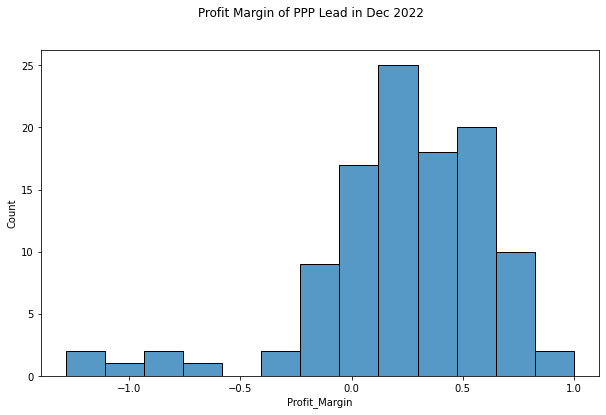

In [832]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(lead_ppp_dec_gp["Profit_Margin"])
plt.suptitle("Profit Margin of PPP Lead in Dec 2022")
plt.show()

# Final

In [833]:
'''
1. Revenue decline since PPP 1 and cost cutting during Covid:
Accomadation         551391
RetailTrade          409788

2. Cost increasing recently - cost inflation, revenue also increase
RetailService      79360
Accomadation       487477

3. non ppp cases, revenue - cost > 0
RetailTrade   464509

'''

'\n1. Revenue decline since PPP 1 and cost cutting during Covid:\nAccomadation         551391\nRetailTrade          409788\n\n2. Cost increasing recently - cost inflation, revenue also increase\nRetailService      79360\nAccomadation       487477\n\n3. non ppp cases, revenue - cost > 0\nRetailTrade   464509\n\n'

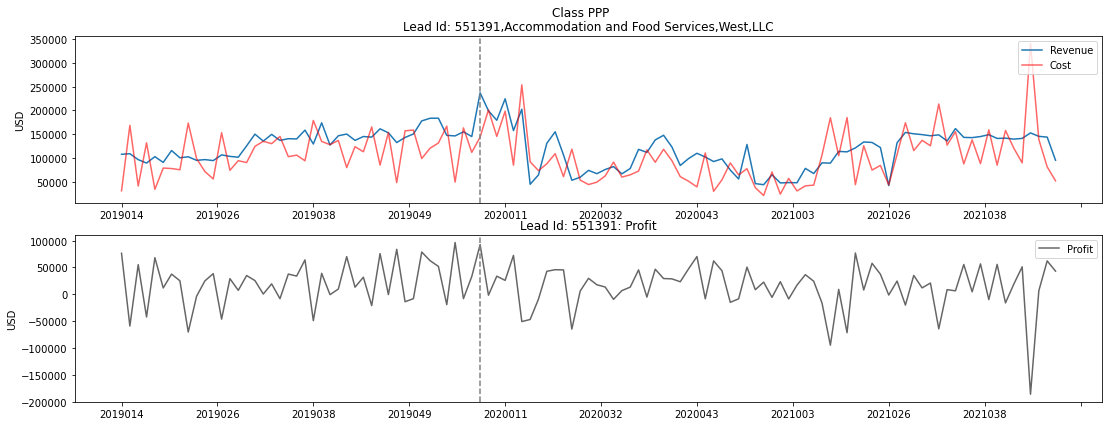

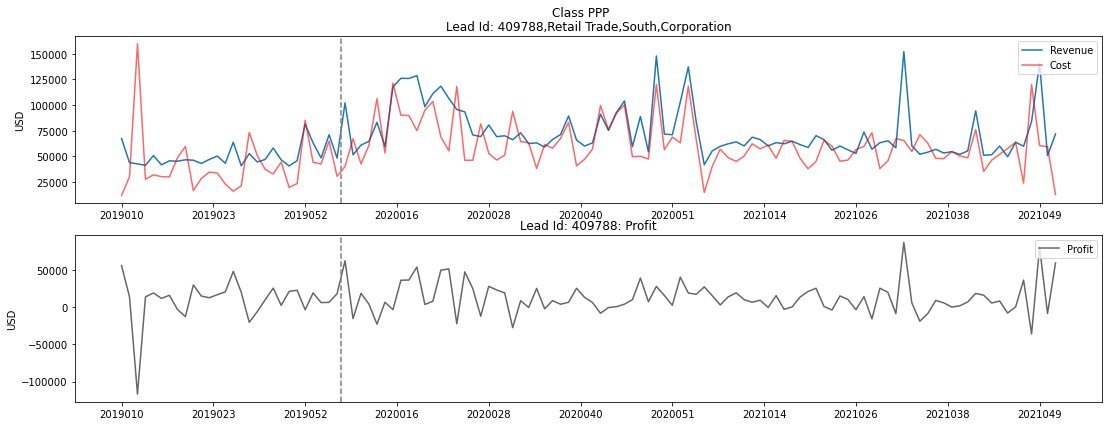

In [834]:
#To add a vertical line
example1=[551391, 409788]
def Graphing_special0(list):
    count=0
    for i in list:
        lead =  lead_ppp.loc[lead_ppp["Lead Id"]==i]
        lead = lead.sort_values("week",ascending=True)
        lead["week"] = lead["week"].astype(str)
        x = lead["industry_sector"].unique()[0]
        y = lead["census_region"].unique()[0]
        z = lead["Business Type"].unique()[0]
        lead["Profit"] = lead["Revenue"]-lead["Operating Costs"]
        
        fig,(ax,ax2)= plt.subplots(2,figsize=(15,6))
        fig.suptitle("Class PPP")
        fig.tight_layout()
        ax.plot(lead["week"], lead["Revenue"], label="Revenue")
        ax.plot(lead["week"],lead["Operating Costs"], color="r", label = "Cost", alpha=0.6)
        ax.legend(loc="upper right")
        ax.set_title(f"Lead Id: {i},{x},{y},{z}")
        ax.set_ylabel("USD")
        
        ax2.plot(lead["week"],lead["Profit"], color="black", label = "Profit", alpha=0.6)
        ax2.set_title(f"Lead Id: {i}: Profit")
        ax2.legend(loc="upper right")
        ax2.set_ylabel("USD")
        
        if count == 0:
            ax.axvline(x=43,color="grey", ls="--")
            ax2.axvline(x=43,color="grey", ls="--")
        else:
            ax.axvline(x=27.5,color="grey", ls="--")
            ax2.axvline(x=27.5,color="grey", ls="--")
        count+=1
        if lead["Lead Id"].count()>100:
            mylocator = mticker.MultipleLocator(11.5)
        else:
            mylocator = mticker.MultipleLocator(8)
        ax.xaxis.set_major_locator(mylocator)
        ax2.xaxis.set_major_locator(mylocator)
Graphing_special0(example1)

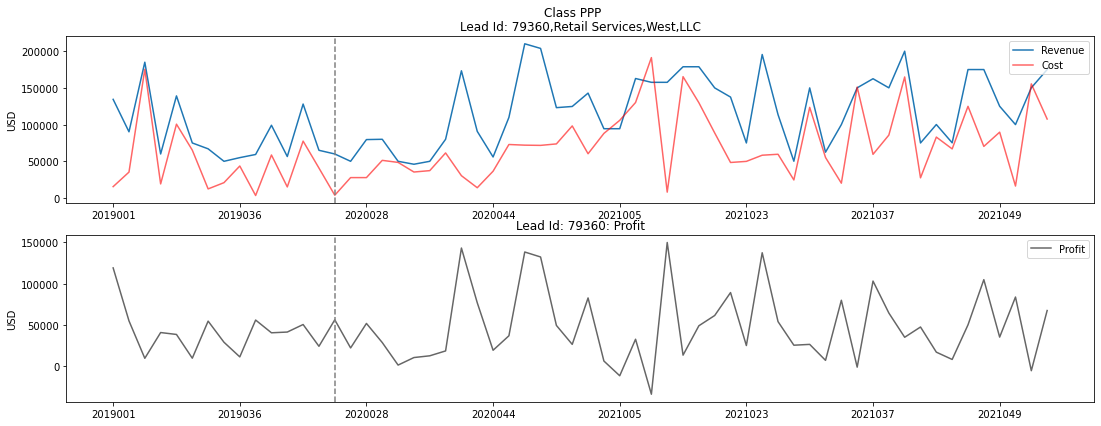

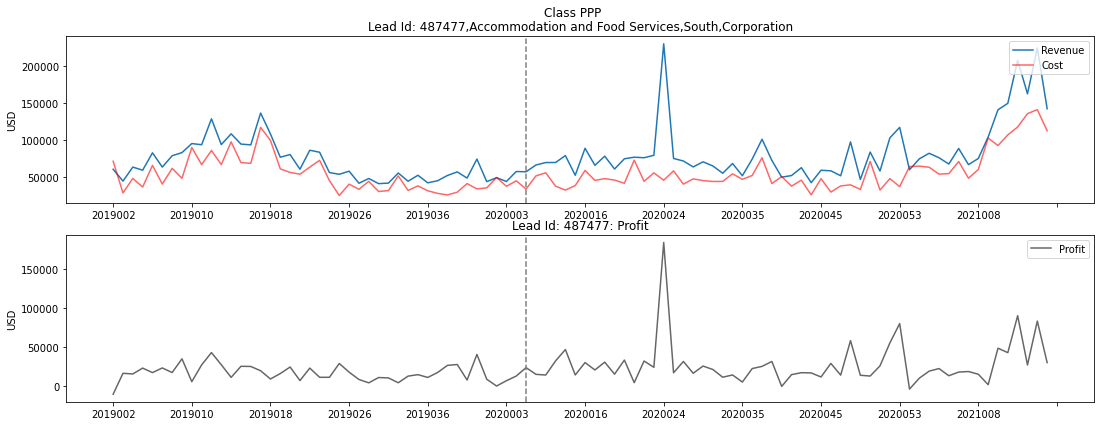

In [835]:
example2=[79360,487477]
def Graphing_special1(list):
    count=0
    for i in list:
        lead =  lead_ppp.loc[lead_ppp["Lead Id"]==i]
        lead = lead.sort_values("week",ascending=True)
        lead["week"] = lead["week"].astype(str)
        x = lead["industry_sector"].unique()[0]
        y = lead["census_region"].unique()[0]
        z = lead["Business Type"].unique()[0]
        lead["Profit"] = lead["Revenue"]-lead["Operating Costs"]
        
        fig,(ax,ax2)= plt.subplots(2,figsize=(15,6))
        fig.suptitle("Class PPP")
        fig.tight_layout()
        
        ax.plot(lead["week"], lead["Revenue"], label="Revenue")
        ax.plot(lead["week"],lead["Operating Costs"], color="r", label = "Cost", alpha=0.6)
        ax.legend(loc="upper right")
        ax.set_title(f"Lead Id: {i},{x},{y},{z}")
        ax.set_ylabel("USD")
        
        ax2.plot(lead["week"],lead["Profit"], color="black", label = "Profit", alpha=0.6)
        ax2.set_title(f"Lead Id: {i}: Profit")
        ax2.legend(loc="upper right")
        ax2.set_ylabel("USD")
        
        if count == 0:
            ax.axvline(x=14,color="grey", ls="--")
            ax2.axvline(x=14,color="grey", ls="--")
        else:
            ax.axvline(x=42,color="grey", ls="--")
            ax2.axvline(x=42,color="grey", ls="--")
        count+=1
        if lead["Lead Id"].count()>100:
            mylocator = mticker.MultipleLocator(11.5)
        else:
            mylocator = mticker.MultipleLocator(8)
        ax.xaxis.set_major_locator(mylocator)
        ax2.xaxis.set_major_locator(mylocator)
Graphing_special1(example2)

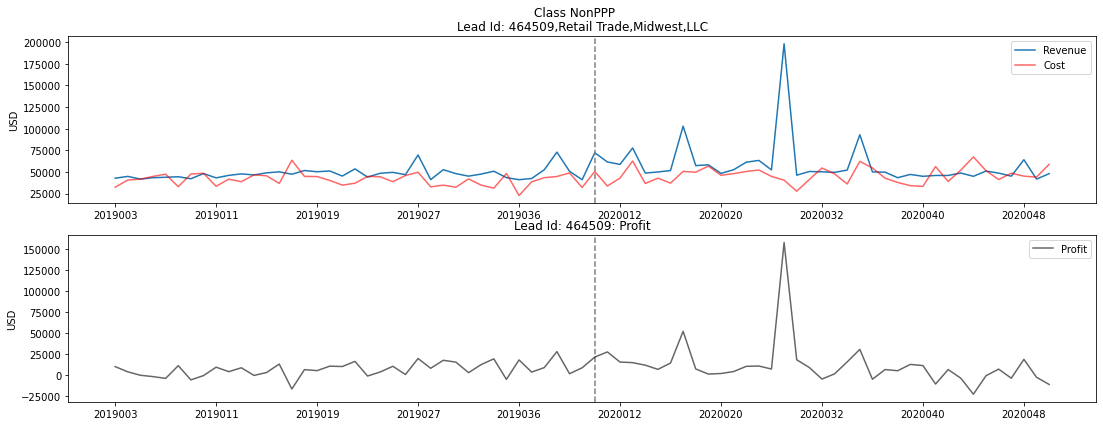

In [836]:
example3=[464509]
def Graphing_special2(list):
    for i in list:
        lead =  lead_np.loc[lead_np["Lead Id"]==i]
        lead = lead.sort_values("week",ascending=True)
        lead["week"] = lead["week"].astype(str)
        x = lead["industry_sector"].unique()[0]
        y = lead["census_region"].unique()[0]
        z = lead["Business Type"].unique()[0]
        lead["Profit"] = lead["Revenue"]-lead["Operating Costs"]
        
        fig,(ax,ax2)= plt.subplots(2,figsize=(15,6))
        fig.suptitle("Class NonPPP")
        fig.tight_layout()
        
        ax.plot(lead["week"], lead["Revenue"], label="Revenue")
        ax.plot(lead["week"],lead["Operating Costs"], color="r", label = "Cost", alpha=0.6)
        ax.legend(loc="upper right")
        ax.set_title(f"Lead Id: {i},{x},{y},{z}")
        ax.set_ylabel("USD")
        ax.axvline(x=38,color="grey", ls="--")
        ax2.axvline(x=38,color="grey", ls="--")
        
        ax2.plot(lead["week"],lead["Profit"], color="black", label = "Profit", alpha=0.6)
        ax2.set_title(f"Lead Id: {i}: Profit")
        ax2.legend(loc="upper right")
        ax2.set_ylabel("USD")
        
        if lead["Lead Id"].count()>100:
            mylocator = mticker.MultipleLocator(11.5)
        else:
            mylocator = mticker.MultipleLocator(8)
            
        ax.xaxis.set_major_locator(mylocator)
        ax2.xaxis.set_major_locator(mylocator)
Graphing_special2(example3)

# Cumulative Data Analysis

In [853]:
def Create_Cumulative(lead_id):
    x = input("PPP type 1; NonPPP type 2")
    if int(x) == 1:
        lead = lead_ppp.loc[lead_ppp["Lead Id"]==lead_id]
    elif int(x) == 2:
        lead = lead_np.loc[lead_np["Lead Id"]==lead_id]
    lead = lead.sort_values("week",ascending=True)
    lead["Profit"]=lead["Revenue"]-lead["Operating Costs"]
    lead["cum_rev"]= lead["Revenue"].cumsum()
    lead["cum_cost"]= lead["Operating Costs"].cumsum()
    lead["cum_profit"]= lead["Profit"].cumsum()
    lead["profit_margin"]= (lead["cum_profit"]/lead["cum_rev"])
    
    return lead

In [854]:
def Graphing_Cumulative_2019(list):
    for i in list:
        lead =  globals()[f"lead_{i}"]
        lead = lead.sort_values("week",ascending=True)
        lead["week"] = lead["week"].astype(str)
        x = lead["industry_sector"].unique()[0]
        y = lead["census_region"].unique()[0]
        z = lead["Business Type"].unique()[0]
        
        fig,(ax,ax2,ax3)= plt.subplots(3,figsize=(15,8))
        fig.suptitle("Class NonPPP")
        fig.tight_layout()
        
        ax.plot(lead["week"], lead["cum_rev"], label="Revenue")
        ax.plot(lead["week"],lead["cum_cost"], color="r", label = "Cost", alpha=0.6)
        ax.legend(title="Cumulative",loc="upper right")
        ax.set_title(f"Lead Id: {i},{x},{y},{z}")
        ax.set_ylabel("USD")
        
        
        ax2.plot(lead["week"],lead["cum_profit"], color="black", label = "Profit", alpha=0.6)
        ax2.set_title(f"Lead Id: {i}: Profit")
        ax2.legend(title="Cumulative",loc="upper right")
        ax2.set_ylabel("USD")
        
        ax3.plot(lead["week"], lead["profit_margin"], color="g" ,label="Profit margin")
        ax3.legend(loc="upper right")
        ax3.set_title("Cumulative Profit/ Cumulative Revenue")
        
        ax.axvline(x=38,color="grey", ls="--")
        ax2.axvline(x=38,color="grey", ls="--")
        ax3.axvline(x=38,color="grey", ls="--")
        
        
        if lead["Lead Id"].count()>100:
            mylocator = mticker.MultipleLocator(11.5)
        else:
            mylocator = mticker.MultipleLocator(8)
            
        ax.xaxis.set_major_locator(mylocator)
        ax2.xaxis.set_major_locator(mylocator)
        ax3.xaxis.set_major_locator(mylocator)

In [855]:
lead_464509 =  Create_Cumulative(464509)
lead_464509

PPP type 1; NonPPP type 22


Lead Id    Id     week  Revenue  Operating Costs PPP_class  \
85169   464509  3153  2019003    42700            32300   Non PPP   
85170   464509  3153  2019004    44800            40600   Non PPP   
85171   464509  3153  2019005    41700            41600   Non PPP   
85172   464509  3153  2019006    43300            44800   Non PPP   
85173   464509  3153  2019007    43800            47400   Non PPP   
...        ...   ...      ...      ...              ...       ...   
85240   464509  3153  2020046    48600            41200   Non PPP   
85241   464509  3153  2020047    45100            48500   Non PPP   
85242   464509  3153  2020048    64100            45100   Non PPP   
85232   464509  3153  2020049    41700            44000   Non PPP   
85233   464509  3153  2020050    48000            58800   Non PPP   

      industry_sector census_region Business Type  Profit  cum_rev  cum_cost  \
85169    Retail Trade       Midwest           LLC   10400    42700     32300   
85170    Retail Trade       Midwest           LLC    4200    87500     72900   
85171    Retail Trade       Midwest           LLC     100   129200    114500   
85172    Retail Trade       Midwest           LLC   -1500   172500    159300   
85173    Retail Trade       Midwest           LLC   -3600   216300    206700   
...               ...           ...           ...     ...      ...       ...   
85240    Retail Trade       Midwest           LLC    7400  3795300   3076000   
85241    Retail Trade       Midwest           LLC   -3400  3840400   3124500   
85242    Retail Trade       Midwest           LLC   19000  3904500   3169600   
85232    Retail Trade       Midwest           LLC   -2300  3946200   3213600   
85233    Retail Trade       Midwest           LLC  -10800  3994200   3272400   

       cum_profit  profit_margin  
85169       10400       0.243560  
85170       14600       0.166857  
85171       14700       0.113777  
85172       13200       0.076522  
85173        9600       0.044383  
...           ...            ...  
85240      719300       0.189524  
85241      715900       0.186413  
85242      734900       0.188219  
85232      732600       0.185647  
85233      721800       0.180712  

[75 rows x 14 columns]

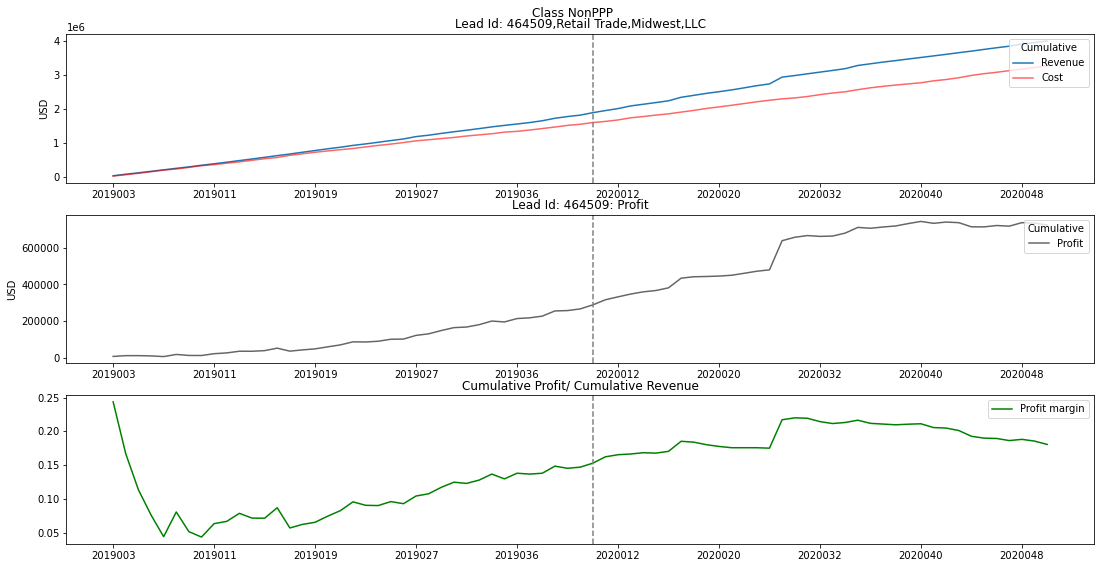

In [856]:
nonppp_example = [464509]
Graphing_Cumulative_2019(nonppp_example)

In [857]:
#lead_464509.to_csv("NonPPP_464509.csv")

In [858]:
PPP_example1=[551391, 409788]
PPP_example2=[79360,487477]

In [859]:
lead_551391 = Create_Cumulative(551391)
lead_409788 = Create_Cumulative(409788)
lead_79360 = Create_Cumulative(79360)
lead_487477 = Create_Cumulative(487477)

PPP type 1; NonPPP type 21
PPP type 1; NonPPP type 21
PPP type 1; NonPPP type 21
PPP type 1; NonPPP type 21


In [887]:
def Graphing_Cumulative_2020(list):
    for i in list:
        lead =  globals()[f"lead_{i}"]
        lead = lead.loc[lead["week"]>2020000]
        lead = lead.sort_values("week",ascending=True)
        lead["week"] = lead["week"].astype(str)
        x = lead["industry_sector"].unique()[0]
        y = lead["census_region"].unique()[0]
        z = lead["Business Type"].unique()[0]
        a = lead["PPP_class"].unique()[0]
        
        fig,(ax,ax2,ax3)= plt.subplots(3,figsize=(15,8))
        fig.suptitle(f"Class {a}")
        fig.tight_layout()
        
        ax.plot(lead["week"], lead["cum_rev"], label="Revenue")
        ax.plot(lead["week"],lead["cum_cost"], color="r", label = "Cost", alpha=0.6)
        ax.legend(title="Cumulative",loc="upper right")
        ax.set_title(f"Lead Id: {i},{x},{y},{z}")
        ax.set_ylabel("USD")
        
        
        ax2.plot(lead["week"],lead["cum_profit"], color="black", label = "Profit", alpha=0.6)
        ax2.set_title(f"Lead Id: {i}: Profit")
        ax2.legend(title="Cumulative",loc="upper right")
        ax2.set_ylabel("USD")
        
        ax3.plot(lead["week"], lead["profit_margin"], color="g" ,label="Profit margin")
        ax3.legend(loc="upper right")
        ax3.set_title("Cumulative Profit/ Cumulative Revenue")
        '''
        ax.axvline(x=5,color="grey", ls="--")
        ax2.axvline(x=5,color="grey", ls="--")
        ax3.axvline(x=5,color="grey", ls="--")
        '''
        
        if lead["Lead Id"].count()>50:
            mylocator = mticker.MultipleLocator(9)
        else:
            mylocator = mticker.MultipleLocator(4)
            
        ax.xaxis.set_major_locator(mylocator)
        ax2.xaxis.set_major_locator(mylocator)
        ax3.xaxis.set_major_locator(mylocator)


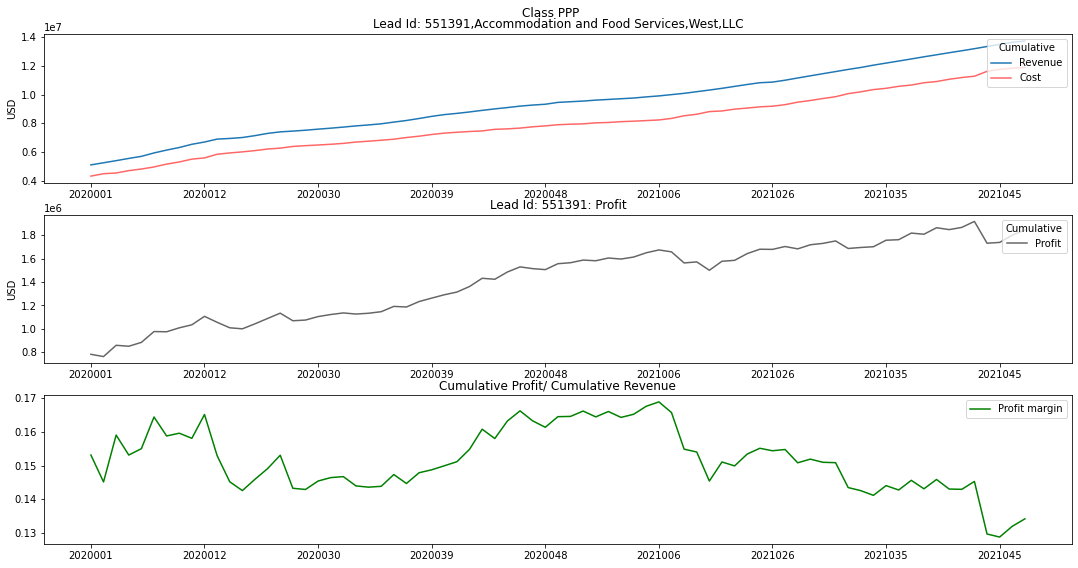

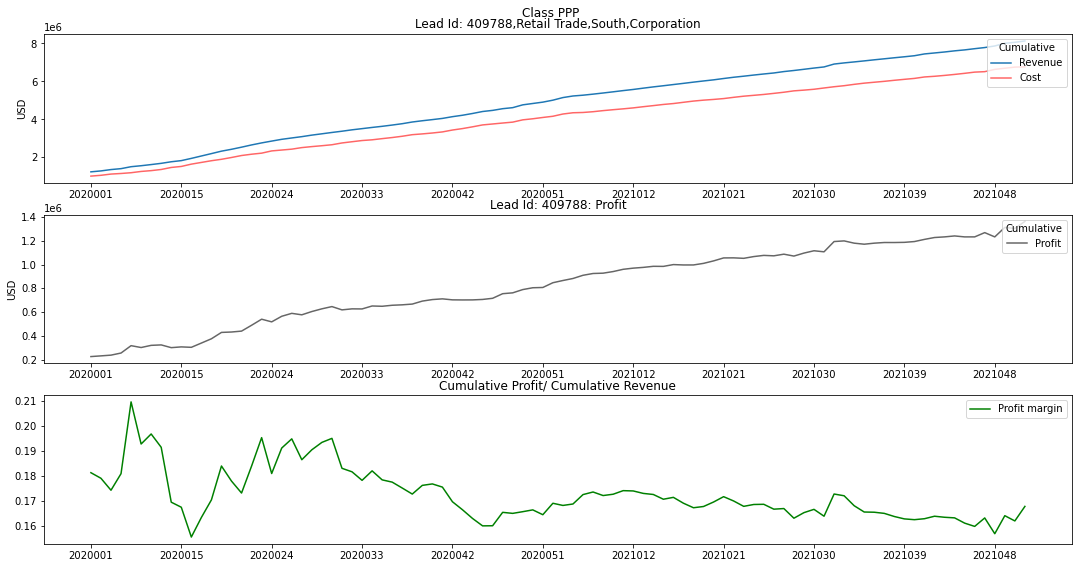

In [890]:
Graphing_Cumulative_2020(PPP_example1)

In [897]:
lead_409788.loc[lead_409788["week"]>2020000].head(15)

Lead Id    Id     week  Revenue  Operating Costs PPP_class  \
55079   409788  1569  2020001    63100            44300       PPP   
55082   409788  1569  2020004    48500            42600       PPP   
55084   409788  1569  2020006    71100            64900       PPP   
55087   409788  1569  2020009    48400            30600       PPP   
55088   409788  1569  2020010   102100            40100       PPP   
55089   409788  1569  2020011    51600            67200       PPP   
55090   409788  1569  2020012    61000            42700       PPP   
55091   409788  1569  2020013    64700            61000       PPP   
55092   409788  1569  2020014    83200           106300       PPP   
55093   409788  1569  2020015    59700            53300       PPP   
55094   409788  1569  2020016   117800           121400       PPP   
55095   409788  1569  2020017   126100            90200       PPP   
55096   409788  1569  2020018   125900            89800       PPP   
55097   409788  1569  2020019   128700            75100       PPP   
55098   409788  1569  2020020    98400            95000       PPP   

      industry_sector census_region Business Type  Profit  cum_rev  cum_cost  \
55079    Retail Trade         South   Corporation   18800  1240800   1015900   
55082    Retail Trade         South   Corporation    5900  1289300   1058500   
55084    Retail Trade         South   Corporation    6200  1360400   1123400   
55087    Retail Trade         South   Corporation   17800  1408800   1154000   
55088    Retail Trade         South   Corporation   62000  1510900   1194100   
55089    Retail Trade         South   Corporation  -15600  1562500   1261300   
55090    Retail Trade         South   Corporation   18300  1623500   1304000   
55091    Retail Trade         South   Corporation    3700  1688200   1365000   
55092    Retail Trade         South   Corporation  -23100  1771400   1471300   
55093    Retail Trade         South   Corporation    6400  1831100   1524600   
55094    Retail Trade         South   Corporation   -3600  1948900   1646000   
55095    Retail Trade         South   Corporation   35900  2075000   1736200   
55096    Retail Trade         South   Corporation   36100  2200900   1826000   
55097    Retail Trade         South   Corporation   53600  2329600   1901100   
55098    Retail Trade         South   Corporation    3400  2428000   1996100   

       cum_profit  profit_margin  
55079      224900       0.181254  
55082      230800       0.179012  
55084      237000       0.174213  
55087      254800       0.180863  
55088      316800       0.209676  
55089      301200       0.192768  
55090      319500       0.196797  
55091      323200       0.191447  
55092      300100       0.169414  
55093      306500       0.167386  
55094      302900       0.155421  
55095      338800       0.163277  
55096      374900       0.170339  
55097      428500       0.183937  
55098      431900       0.177883

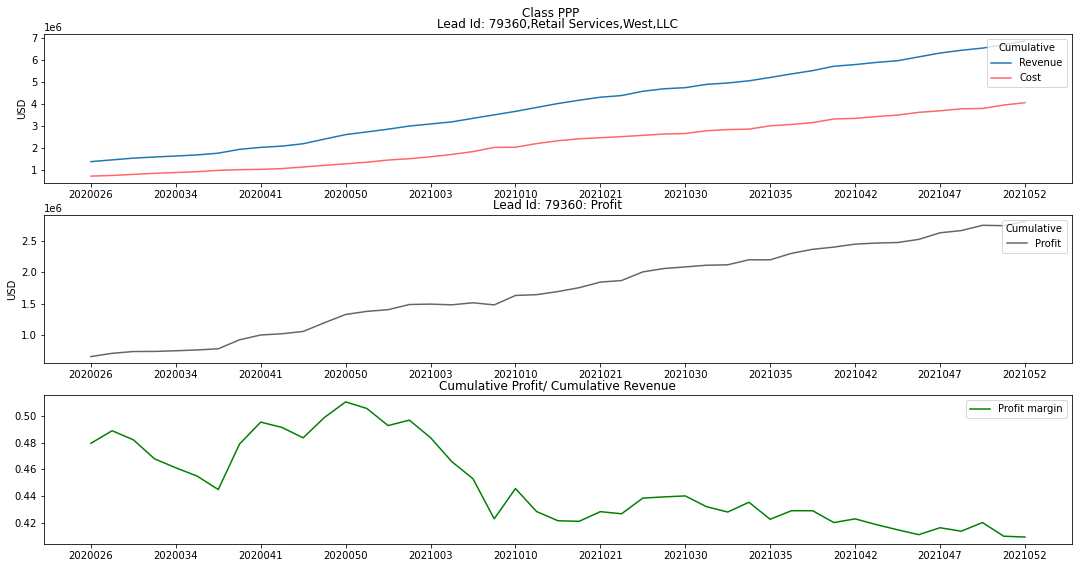

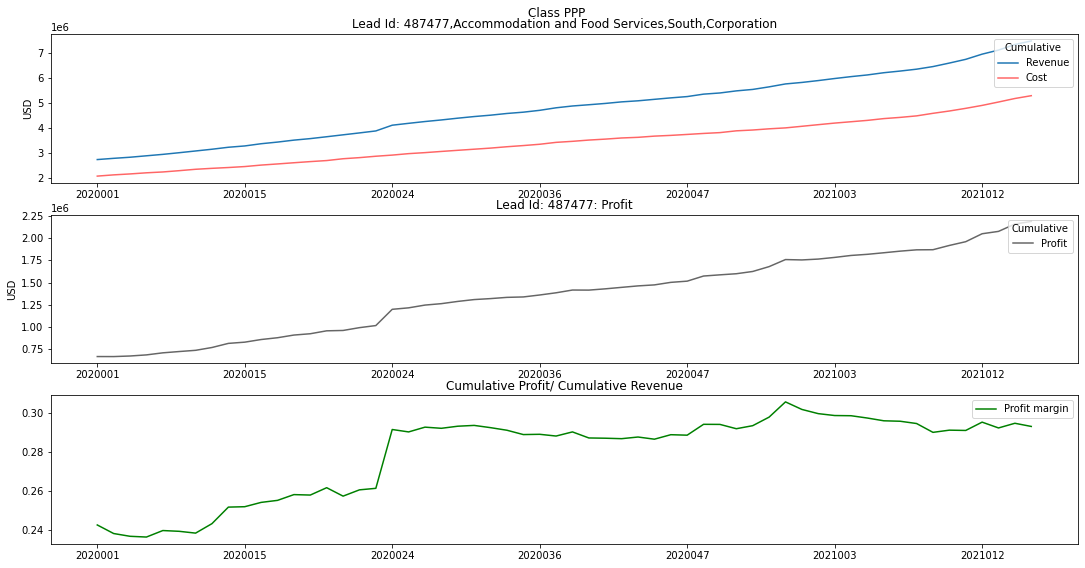

In [891]:
Graphing_Cumulative_2020(PPP_example2)

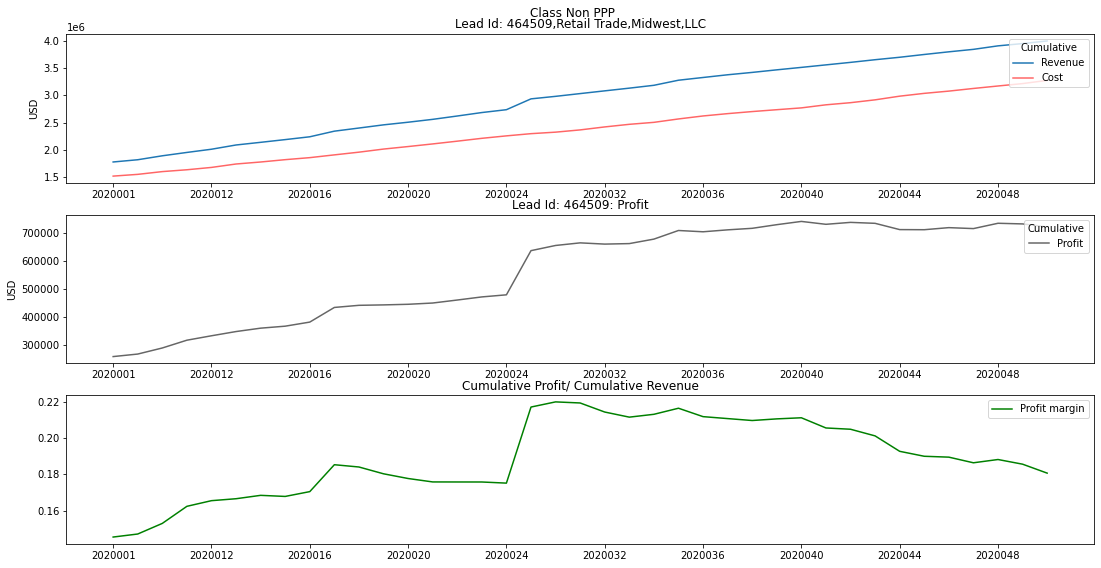

In [893]:
Graphing_Cumulative_2020(nonppp_example)